In [1]:
import sys
sys.path.insert(0, '../..')
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout, AddPolicyInfectedRate, confidence_interval, multiple_runs
from model.utils import SocialPolicy

In [2]:
listeners =[] 
strings = """ [
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL,0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,11],
["AddPolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE, 0.00025 ,11],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_HIGH_SCHOOL,0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_RETAIL, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_FACTORY, 0.00025 ,21],
["RemovePolicyInfectedRateWindow", SocialPolicy.LOCKDOWN_OFFICE,0.00025 ,21]
]"""

In [3]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.9, # 0.0,
    mask_efficacy = 0.6, #0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability = 0.1,
#    asymptomatic_contagion_probability = 0.05,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
#    herding_behavior_mean = 0.1,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 0.25, #1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20)
#    spreading_rate = normal_ci(0.5, 1.5, 20)
)

sc = 10

population_size = 1000
simulation_cycles = 360 # days
seed = 31415
np.random.seed(seed)

params = copy.deepcopy(common_parameters)


By changing the coverage of school and work districts over the home districts we can make the disease spread faster or slower as desired .  
def setup_grid_layout(model, population_size,
        home_grid_height, home_grid_width,work_height,work_width, school_height, school_width):
    

Makes a grid of homogeneous home districts, overlaid by school and work districts.
    

home_grid_height is the number of home districts high the grid is, and
    

home_grid_width is the nmber of home districts wide the grid is
    

school height and work height are how many home districts high a school
    

district and work are respectively, and the same for their length.
    

each begins in grid 0,0 and cover the orignal home district grid.
    

Persons assigned to the home districts are also assigned to the school
    

and work districts that cover them. The parameters determine the amount
    

of leakage across groups of people.  With parameters (10,10,1,1,1,1), you get 100
    

completely separated districts with no leakage.  With parameters (6,6,2,2,3,3), illustrated below, you
    

get a grid where every one is connected to everyone else, but there is a
    

degree of separation.  For example, a person in home district (0,0) can be infected
    

by a person in (5,5) but it would be bridged by three infections, slowing the
    

virus down.  Larger sizes for work and school districts enable faster spread. Fastest
    

spread occurs with parameters (1,1,1,1,1,1) or equivalently (10,10, 10,10,10,10)
    

or any of the same number
    

Since this is just a way to allocate human interactions, no label is needed and
    

the grid need not be saved, for interactions to occur, although this informamtion
    

may be useful for visualizations. 


 


<img src="grids.jpg">

 Without locality, the defaults to multiple_run are :  home_grid_height = 1, home_grid_width = 1,work_height = 1, work_width =1, school_height=1, school_width=1.  


In [4]:
from platform import python_version

print(python_version())

3.6.8


Save these seeds if you want to rerun a scenario
[6251, 4768, 8703, 3756, 6667, 7117, 3296, 5622, 4547, 8532, 8143, 6348, 9461, 563, 5117, 282, 1823, 987, 8543, 1989, 1962, 7706, 2052, 5737, 2147, 9948, 5830, 5346, 3056, 736]
log initialized
Average similarity between family members is 0.9828526589093042 at temperature -1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not i

Average similarity between workers is 0.8689331098192878 at temperature -1
Average friend similarity for adults: 0.9803287542791457 for kids: 0.9701562525143244
run with seed 6251:
avg restaurant similarity 0.07666089590174796
avg restaurant similarity 0.3265509209041371
avg restaurant similarity 0.33889105304505507
avg restaurant similarity 0.28516214497510406
avg restaurant similarity 0.5429607275601261
avg restaurant similarity 0.3593844797124813
avg restaurant similarity 0.3618243470859236
avg restaurant similarity 0.3966238501533542
avg restaurant similarity 0.36656920199534093
avg restaurant similarity 0.3200127345921658
avg restaurant similarity 0.29447196432120276
avg restaurant similarity 0.3522992469309915
avg restaurant similarity 0.3281177008853062
avg restaurant similarity 0.4889128760330375
avg restaurant similarity 0.2671373312264363
avg restaurant similarity 0.27038373594730725
avg restaurant similarity 0.2786609748307108
avg restaurant similarity 0.38447572606023406
av

avg restaurant similarity 0.17658855765366843
avg restaurant similarity 0.530563122219541
avg restaurant similarity 0.259846211259252
avg restaurant similarity 0.33874834161700407
avg restaurant similarity 0.2679176798589336
avg restaurant similarity 0.31722671927029455
avg restaurant similarity 0.3962895951241878
avg restaurant similarity 0.38585055270369717
avg restaurant similarity 0.38678113529464386
avg restaurant similarity 0.27833711447911696
avg restaurant similarity 0.26744413453901345
avg restaurant similarity 0.16563063417311671
avg restaurant similarity 0.2750941104384255
avg restaurant similarity 0.325393093208625
avg restaurant similarity 0.3189113255980934
avg restaurant similarity 0.26822303710785916
avg restaurant similarity 0.1745666850182972
avg restaurant similarity 0.22392706829582315
avg restaurant similarity 0.16967980654704315
avg restaurant similarity 0.25464846704029664
avg restaurant similarity 0.28899888566969256
avg restaurant similarity 0.20126581379577588

tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of

avg restaurant similarity 0.20792010266597521
avg restaurant similarity 0.32252373780342947
avg restaurant similarity 0.25619392589139306
avg restaurant similarity 0.21003141550296056
avg restaurant similarity 0.19190267202766656
avg restaurant similarity 0.3316981523057837
avg restaurant similarity 0.2118246672603607
avg restaurant similarity 0.3528964395498345
avg restaurant similarity 0.3991117324400535
avg restaurant similarity 0.2438126224821908
avg restaurant similarity 0.2935980963387226
avg restaurant similarity 0.3839551048618529
avg restaurant similarity 0.36724282004399
avg restaurant similarity 0.4460754009048559
avg restaurant similarity 0.3697113225341158
avg restaurant similarity 0.23273611292136684
avg restaurant similarity 0.29247593089947166
avg restaurant similarity 0.4391890008002143
avg restaurant similarity 0.24464603667312204
avg restaurant similarity 0.116445268741183
avg restaurant similarity 0.2947353059109041
avg restaurant similarity 0.3453870675553618
avg r

avg restaurant similarity 0.10139681751782921
avg restaurant similarity 0.39643246779644076
avg restaurant similarity 0.29488868934324264
avg restaurant similarity 0.12104301188006304
avg restaurant similarity 0.18805173755969457
avg restaurant similarity 0.5166089294910031
avg restaurant similarity 0.3137079426627509
avg restaurant similarity 0.2678223816456537
avg restaurant similarity 0.2577623986484878
avg restaurant similarity 0.3925553380369207
avg restaurant similarity 0.12862748710927027
avg restaurant similarity 0.30593919716014323
avg restaurant similarity 0.19260181397625978
avg restaurant similarity 0.12550749058846447
avg restaurant similarity 0.4373138568119104
avg restaurant similarity 0.0925389644067614
avg restaurant similarity 0.3126657763702782
avg restaurant similarity 0.1668757880530148
avg restaurant similarity 0.5936636345187835
avg restaurant similarity 0.3394178775484854
avg restaurant similarity 0.25264096272010156
avg restaurant similarity 0.34834250375645204

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of

avg restaurant similarity 0.4339980793813924
avg restaurant similarity 0.3707130267552264
avg restaurant similarity 0.22984703172192014
avg restaurant similarity 0.4142389950523137
avg restaurant similarity 0.32348581724103354
avg restaurant similarity 0.19530372227735646
avg restaurant similarity 0.3961703621803824
avg restaurant similarity 0.2894088495511431
avg restaurant similarity 0.18697550359198892
avg restaurant similarity 0.43416685276594746
avg restaurant similarity 0.352054691000425
avg restaurant similarity 0.23671564229841385
avg restaurant similarity 0.2783005637771296
avg restaurant similarity 0.5273461009707602
avg restaurant similarity 0.5429854891623836
avg restaurant similarity 0.23827382949305198
avg restaurant similarity 0.2452813714439112
avg restaurant similarity 0.2871957197617322
avg restaurant similarity 0.3434650136230671
avg restaurant similarity 0.16547825134482674
avg restaurant similarity 0.3481723380266956
avg restaurant similarity 0.2720470706908682
avg

tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset 

avg restaurant similarity 0.45761992607108354
avg restaurant similarity 0.3705331859000617
avg restaurant similarity 0.37075080144742706
avg restaurant similarity 0.00020262769754840961
avg restaurant similarity 0.19673662617498228
avg restaurant similarity 0.2715187533981706
avg restaurant similarity 0.31832898598410686
avg restaurant similarity 0.47561836233627036
avg restaurant similarity 0.33623157843830787
avg restaurant similarity 0.3392725065121421
avg restaurant similarity 0.24575939654578344
avg restaurant similarity 0.4453037287291494
avg restaurant similarity 0.39938143282545535
avg restaurant similarity 0.5987642511333627
avg restaurant similarity 0.06751337553192942
avg restaurant similarity 0.22804793285930208
avg restaurant similarity 0.08994161453071663
avg restaurant similarity 0.36359117187594586
avg restaurant similarity 0.4507926761959671
avg restaurant similarity 0.35670454430663684
avg restaurant similarity 0.2925977842895143
avg restaurant similarity 0.3752212737

avg restaurant similarity 0.20711248774769245
avg restaurant similarity 0.2872733250844901
avg restaurant similarity 0.2572882069971684
avg restaurant similarity 0.1733201874364394
avg restaurant similarity 0.13844553057060707
avg restaurant similarity 0.38325905119081793
avg restaurant similarity 0.2208454410512897
avg restaurant similarity 0.23663554544770732
avg restaurant similarity 0.05388783652924162
avg restaurant similarity 0.18323902139511136
avg restaurant similarity 0.4526639132507876
avg restaurant similarity 0.18173874582070473
avg restaurant similarity 0.21929667469968742
avg restaurant similarity 0.3818384058642136
avg restaurant similarity 0.09763175679003037
avg restaurant similarity 0.27635918155225175
avg restaurant similarity 0.33325883822012836
avg restaurant similarity 0.35204389454851653
avg restaurant similarity 0.29519637078093225
avg restaurant similarity 0.5132872001614015
avg restaurant similarity 0.32874500756206226
avg restaurant similarity 0.1835191661909

tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset 

avg restaurant similarity 0.2442858524250456
avg restaurant similarity 0.3354616232149686
avg restaurant similarity 0.34184354726846383
avg restaurant similarity 0.2954808891967513
avg restaurant similarity 0.2641000594190441
avg restaurant similarity 0.37399436030287103
avg restaurant similarity 0.26689712424967516
avg restaurant similarity 0.19176221987743725
avg restaurant similarity 0.26652187227490026
avg restaurant similarity 0.19560111780191594
avg restaurant similarity 0.3316622184931764
avg restaurant similarity 0.44279038286379374
avg restaurant similarity 0.2602272816365359
avg restaurant similarity 0.2201847390616592
avg restaurant similarity 0.30933821286180896
avg restaurant similarity 0.3123112221300697
avg restaurant similarity 0.23736182076476273
avg restaurant similarity 0.45415608852425815
avg restaurant similarity 0.4345507989692481
avg restaurant similarity 0.46072224821965463
avg restaurant similarity 0.41392048547568716
avg restaurant similarity 0.158853925672764

avg restaurant similarity 0.34663270340511976
avg restaurant similarity 0.3788191874608203
avg restaurant similarity 0.3331717914319573
avg restaurant similarity 0.3297358792231666
avg restaurant similarity 0.3823897331113986
avg restaurant similarity 0.35997202278188767
avg restaurant similarity 0.4227901033506256
avg restaurant similarity 0.25790012733738865
avg restaurant similarity 0.19781208973858772
avg restaurant similarity 0.2114998589987377
avg restaurant similarity 0.32834131449505727
avg restaurant similarity 0.2888586715415692
avg restaurant similarity 0.24577324908486217
avg restaurant similarity 0.24802581796099862
avg restaurant similarity 0.35849692794824617
avg restaurant similarity 0.3034506226388987
avg restaurant similarity 0.2138173923009868
avg restaurant similarity 0.26939184568265223
avg restaurant similarity 0.2959833396163259
avg restaurant similarity 0.25556681099468576
avg restaurant similarity 0.3795031583478525
avg restaurant similarity 0.38626900495833844

tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
Average similarity between family and home is 0.9918378552654987 at temperature -1
Average similarity between students and their classroom is 0.7428619753358059 at temperature -1
Average similarity between workers is 0.8503087956670362 at temperature -1
Average friend similarity for adults: 0.9773212498446922 for kids: 0.9639161769947205
run with seed 7117:
avg restaurant similarity 0.47578182322736734
avg restaurant similarity 0.15681419851392853
avg restaurant similarity 0.14726877925843923
avg restaurant similarity 0.3474286560843357
avg restaurant similarity 0.29012751136208004
avg restaurant similarity 0.21070885610009116
avg restaurant similarity 0.22776092197974512
avg restaurant similarity 0.1201000831014619
avg restaurant similarity 0.3330058496409959
avg restaurant similarity 0.24365409727272863
avg restaurant similarity 0.17776895372867452
avg restaurant similarity 0.3996

avg restaurant similarity 0.259792880292956
avg restaurant similarity 0.14932295568951026
avg restaurant similarity 0.1943066595858399
avg restaurant similarity 0.1962406668243362
avg restaurant similarity 0.08195528612641681
avg restaurant similarity 0.22587496064670168
avg restaurant similarity 0.318680410157322
avg restaurant similarity 0.07291970218723441
avg restaurant similarity 0.35839638367996485
avg restaurant similarity 0.330419252574386
avg restaurant similarity 0.29072152069103857
avg restaurant similarity 0.11041710740305682
avg restaurant similarity 0.14173577068858137
avg restaurant similarity 0.05872944820206314
avg restaurant similarity 0.12485412483685072
avg restaurant similarity 0.3660127915878238
avg restaurant similarity 0.20907183502476082
avg restaurant similarity 0.24413469165361462
avg restaurant similarity -0.07011689160384409
avg restaurant similarity 0.10170906343119396
avg restaurant similarity 0.20564885579847034
avg restaurant similarity 0.28277437619387

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset o

avg restaurant similarity 0.0585152116878743
avg restaurant similarity 0.2145538622898816
avg restaurant similarity 0.22295394361951767
avg restaurant similarity 0.22293913312121144
avg restaurant similarity 0.2657859674124937
avg restaurant similarity 0.21946449752423014
avg restaurant similarity 0.1932200935019129
avg restaurant similarity 0.20573587399248722
avg restaurant similarity 0.21130956397356024
avg restaurant similarity 0.23124728701399017
avg restaurant similarity 0.25382952479657833
avg restaurant similarity 0.28476444572771115
avg restaurant similarity 0.3947062224088473
avg restaurant similarity 0.18940290962504097
avg restaurant similarity 0.23430903118979565
avg restaurant similarity 0.1457115690059952
avg restaurant similarity 0.28196242744263755
avg restaurant similarity 0.2910716485244695
avg restaurant similarity 0.11537333586308259
avg restaurant similarity 0.3076292816677697
avg restaurant similarity 0.3036827500318116
avg restaurant similarity 0.302488284190256

avg restaurant similarity 0.23714266570745138
avg restaurant similarity 0.19921325826848865
avg restaurant similarity 0.26021026547840015
avg restaurant similarity 0.41678954881712343
avg restaurant similarity 0.2189782898503147
avg restaurant similarity 0.17441666938233427
avg restaurant similarity 0.34161187842197543
avg restaurant similarity 0.28874606296044436
avg restaurant similarity 0.31336702752829804
avg restaurant similarity 0.34147663988128113
avg restaurant similarity 0.28255151610815277
avg restaurant similarity 0.24911203356620926
avg restaurant similarity 0.2062803477916074
avg restaurant similarity 0.24695166353822726
avg restaurant similarity 0.32480033226764415
avg restaurant similarity 0.3971971056862972
avg restaurant similarity 0.247037052177667
avg restaurant similarity 0.2761333444289798
avg restaurant similarity 0.17862609493458842
avg restaurant similarity 0.2576777461451177
avg restaurant similarity 0.26631927147266843
avg restaurant similarity 0.2762412518199

tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset 

avg restaurant similarity 0.14652980013464226
avg restaurant similarity 0.2511288973162349
avg restaurant similarity 0.19350294439364246
avg restaurant similarity 0.24662399846815122
avg restaurant similarity 0.33499326609404567
avg restaurant similarity 0.17488735768355906
avg restaurant similarity 0.23602461500727417
avg restaurant similarity 0.12311597274866522
avg restaurant similarity 0.21614393148804592
avg restaurant similarity 0.12469864418057397
avg restaurant similarity 0.25393554544301006
avg restaurant similarity 0.3140834361613955
avg restaurant similarity 0.19784480056023337
avg restaurant similarity 0.23489775914477104
avg restaurant similarity 0.3675029551888615
avg restaurant similarity 0.19012568585776646
avg restaurant similarity 0.3374287490918285
avg restaurant similarity 0.3253083809688425
avg restaurant similarity 0.20183063246714725
avg restaurant similarity 0.30767243537025063
avg restaurant similarity 0.2905618941317755
avg restaurant similarity 0.208409831832

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset 

avg restaurant similarity 0.27749055162857805
avg restaurant similarity 0.29052559579895215
avg restaurant similarity 0.07965858747258661
avg restaurant similarity 0.1096546542035359
avg restaurant similarity 0.11812282290454387
avg restaurant similarity 0.07766627538720064
avg restaurant similarity 0.11368040532576944
avg restaurant similarity 0.2063670523933424
avg restaurant similarity 0.12182051992041451
avg restaurant similarity 0.1500965222632785
avg restaurant similarity 0.22882979715883073
avg restaurant similarity 0.20773775571181963
avg restaurant similarity 0.06977614995961987
avg restaurant similarity 0.048488753973056645
avg restaurant similarity 0.21446864298672194
avg restaurant similarity 0.09765724462729777
avg restaurant similarity 0.22642296850575266
avg restaurant similarity 0.12393351423289324
avg restaurant similarity 0.20283429520234034
avg restaurant similarity 0.12362424340344744
avg restaurant similarity 0.0633033641938726
avg restaurant similarity 0.115432166

avg restaurant similarity 0.24332071619301654
avg restaurant similarity 0.15247437580214565
avg restaurant similarity 0.17753985674222428
avg restaurant similarity 0.12265896346373394
avg restaurant similarity 0.2301383582473587
avg restaurant similarity 0.13342612276255406
avg restaurant similarity 0.2869057659272812
avg restaurant similarity 0.16768440257319675
avg restaurant similarity 0.1619376171269886
avg restaurant similarity 0.19321245233110504
avg restaurant similarity 0.2898526956749541
avg restaurant similarity 0.24276593333798702
avg restaurant similarity 0.3608745052110281
avg restaurant similarity 0.24035916353680056
avg restaurant similarity 0.07969929187758656
avg restaurant similarity 0.20399201140130402
avg restaurant similarity 0.17826695973747123
avg restaurant similarity 0.21798850698184227
avg restaurant similarity 0.2645269884821528
avg restaurant similarity 0.20503849855893913
avg restaurant similarity 0.2979871071270494
avg restaurant similarity 0.3360055000989

tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset

avg restaurant similarity 0.2525853324981722
avg restaurant similarity 0.3539692783366995
avg restaurant similarity 0.30370424502815024
avg restaurant similarity 0.3384792063398634
avg restaurant similarity 0.2948824700403686
avg restaurant similarity 0.28219618913748573
avg restaurant similarity 0.22049888771571333
avg restaurant similarity 0.30000345873772494
avg restaurant similarity 0.3001109866271963
avg restaurant similarity 0.28365711323345383
avg restaurant similarity 0.3320854878580582
avg restaurant similarity 0.2537792188168956
avg restaurant similarity 0.23935553528410358
avg restaurant similarity 0.0946290543796902
avg restaurant similarity 0.330885507519601
avg restaurant similarity 0.19084452888534317
avg restaurant similarity 0.22546211161262023
avg restaurant similarity 0.07575465673100318
avg restaurant similarity 0.10111037506880251
avg restaurant similarity 0.31927386909507227
avg restaurant similarity 0.2905512153378616
avg restaurant similarity 0.24284543600212324

avg restaurant similarity 0.32018473411121684
avg restaurant similarity 0.3001424811541178
avg restaurant similarity 0.4112862850220149
avg restaurant similarity 0.34185075548116717
avg restaurant similarity 0.44307183403224176
avg restaurant similarity 0.24070807421398596
avg restaurant similarity 0.5117836537723826
avg restaurant similarity 0.30081231317476215
avg restaurant similarity 0.34734873594245486
avg restaurant similarity 0.1606296470390915
avg restaurant similarity 0.34330314265379336
avg restaurant similarity 0.32326762198617925
avg restaurant similarity 0.440956514943063
avg restaurant similarity 0.3097777512514747
avg restaurant similarity 0.25378521082760164
avg restaurant similarity 0.3099378840403947
avg restaurant similarity 0.5465613010216281
avg restaurant similarity 0.3206113742904653
avg restaurant similarity 0.24894424227530657
avg restaurant similarity 0.3301438030281341
avg restaurant similarity 0.32142242229742346
avg restaurant similarity 0.29353275177347615

tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
Average similarity between family and home is 0.9923978289535944 at temperature -1
Average similarity between students and their classroom is 0.6993325621503499 at temperature -1
Average similarity between workers is 0.7638635388442164 at temperature -1
Average friend similarity for adults: 0.9789805180053542 for kids: 0.9632405486664564
run with seed 8143:
avg restaurant similarity 0.049800990751087466
avg restaurant similarity 0.23111829180260843
avg restaurant similarity 0.17023462759877334
avg restaurant similarity 0.14102288734398805
avg restaurant similarity 0.072413250

avg restaurant similarity 0.12825981360044206
avg restaurant similarity 0.0260267444236807
avg restaurant similarity 0.028437174848475206
avg restaurant similarity 0.047561772217663854
avg restaurant similarity 0.037502793924780786
avg restaurant similarity -0.027232215477594055
avg restaurant similarity -0.11976329091499742
avg restaurant similarity 0.013536572209794198
avg restaurant similarity -0.02495101273799499
avg restaurant similarity 0.19908309297129936
avg restaurant similarity 0.1022584629485464
avg restaurant similarity 0.007514280227344608
avg restaurant similarity 0.07096942775288005
avg restaurant similarity -0.10681717395181298
avg restaurant similarity 0.263624630540627
avg restaurant similarity 0.08198464633545845
avg restaurant similarity 0.02437951480884359
avg restaurant similarity 0.02200208988471532
avg restaurant similarity -0.0744604598879622
avg restaurant similarity 0.15465025481784017
avg restaurant similarity 0.06137296464695014
avg restaurant similarity -0

tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset 

avg restaurant similarity 0.00045228020974340575
avg restaurant similarity 0.051345150486790114
avg restaurant similarity 0.006821050102339774
avg restaurant similarity 0.09145366931354702
avg restaurant similarity 0.03344784599078814
avg restaurant similarity -0.1363717747556596
avg restaurant similarity 0.152123212419161
avg restaurant similarity 0.03338296764260732
avg restaurant similarity 0.2908570054317924
avg restaurant similarity 0.039425563769744106
avg restaurant similarity 0.14690131459972838
avg restaurant similarity -0.18893493375709716
avg restaurant similarity -0.10568967750814182
avg restaurant similarity 0.16369475657892352
avg restaurant similarity 0.03948956213605251
avg restaurant similarity 0.01220504961126301
avg restaurant similarity 0.122051607415476
avg restaurant similarity -0.0384381328071318
avg restaurant similarity 0.07268429917807472
avg restaurant similarity 0.07961551979722747
avg restaurant similarity 0.023599719445356018
avg restaurant similarity 0.10

avg restaurant similarity 0.41707775507152955
avg restaurant similarity 0.5718620038105551
avg restaurant similarity 0.278735458517592
avg restaurant similarity 0.3935495276051307
avg restaurant similarity 0.1507693756647402
avg restaurant similarity 0.26166009068820445
avg restaurant similarity 0.45602413656167734
avg restaurant similarity 0.10967852792805055
avg restaurant similarity 0.38726952766057315
avg restaurant similarity 0.18582408431975453
avg restaurant similarity 0.36670158256899554
avg restaurant similarity 0.09639346875647785
avg restaurant similarity 0.22146837708733513
avg restaurant similarity 0.12733165105513367
avg restaurant similarity 0.33158769071806565
avg restaurant similarity 0.0657528613649582
avg restaurant similarity 0.10104210869846447
avg restaurant similarity 0.16245398189505902
avg restaurant similarity 0.24728001688050202
avg restaurant similarity 0.03954003187792915
avg restaurant similarity -0.06517719639512772
avg restaurant similarity 0.17072696833

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset o

avg restaurant similarity 0.4691199240721405
avg restaurant similarity 0.42777021733825704
avg restaurant similarity 0.5234464994802609
avg restaurant similarity 0.44188709885722927
avg restaurant similarity 0.38155185628539384
avg restaurant similarity 0.4692625082746072
avg restaurant similarity 0.3583530477994737
avg restaurant similarity 0.4414717975921088
avg restaurant similarity 0.4622237540461017
avg restaurant similarity 0.5170243797121774
avg restaurant similarity 0.4832949714350181
avg restaurant similarity 0.45893197698281085
avg restaurant similarity 0.4784814371835312
avg restaurant similarity 0.329914773486144
avg restaurant similarity 0.5603894619970659
avg restaurant similarity 0.46333285132900853
avg restaurant similarity 0.4723776140540169
avg restaurant similarity 0.5541731868636659
avg restaurant similarity 0.4350556097292813
avg restaurant similarity 0.5880699004560008
avg restaurant similarity 0.4143505075771764
avg restaurant similarity 0.566678856591631
avg res

avg restaurant similarity 0.4503660535841367
avg restaurant similarity 0.2269870012299207
avg restaurant similarity 0.4016742553654546
avg restaurant similarity 0.29178630438334047
avg restaurant similarity 0.4060397519560915
avg restaurant similarity 0.6192640068775711
avg restaurant similarity 0.3269298834508833
avg restaurant similarity 0.39301157048010193
avg restaurant similarity 0.42670543786932946
avg restaurant similarity 0.36360707514395885
avg restaurant similarity 0.36237029648422997
avg restaurant similarity 0.3808217099896998
avg restaurant similarity 0.307691813392176
avg restaurant similarity 0.3940081682276346
avg restaurant similarity 0.3383153254297111
avg restaurant similarity 0.4378220005336834
avg restaurant similarity 0.5003782350179656
avg restaurant similarity 0.45648047855640284
avg restaurant similarity 0.45811505904112065
avg restaurant similarity 0.45660854485348595
avg restaurant similarity 0.4285207324935668
avg restaurant similarity 0.3349155428711496
avg

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
Average similarity between family and home is 0.9913359910762422 at temperature -1
Average similarity between students and their classroom is 0.7031324207851167 at temperature -1
Average similarity

avg restaurant similarity 0.21703656012186595
avg restaurant similarity 0.1413833211802955
avg restaurant similarity 0.11019716390052572
avg restaurant similarity 0.2239428954945579
avg restaurant similarity 0.3657046723483589
avg restaurant similarity 0.16828297115961893
avg restaurant similarity 0.22914940066830453
avg restaurant similarity 0.20834953441006893
avg restaurant similarity 0.36725571976839816
avg restaurant similarity 0.21285110610563662
avg restaurant similarity 0.22862069459282777
avg restaurant similarity 0.25436684376612684
avg restaurant similarity 0.24731913658053095
avg restaurant similarity 0.12141727036374494
avg restaurant similarity 0.3632842658411724
avg restaurant similarity 0.11491968487805028
avg restaurant similarity 0.3088537189767244
avg restaurant similarity 0.17815541458805884
avg restaurant similarity 0.30254754101586845
avg restaurant similarity 0.16254513979524648
avg restaurant similarity 0.35091319235570745
avg restaurant similarity 0.13802133199

tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of

avg restaurant similarity 0.2689452611935586
avg restaurant similarity 0.09090088870109772
avg restaurant similarity 0.2599841980372065
avg restaurant similarity 0.21582010689260436
avg restaurant similarity 0.2744916332776308
avg restaurant similarity 0.2993998144970671
avg restaurant similarity 0.13019285806501546
avg restaurant similarity 0.3702308355096876
avg restaurant similarity 0.20645352322052568
avg restaurant similarity 0.3469998838716216
avg restaurant similarity 0.3395501469644044
avg restaurant similarity 0.3941132680942368
avg restaurant similarity 0.36664305625276994
avg restaurant similarity 0.24347961595419826
avg restaurant similarity 0.26762682653845965
avg restaurant similarity 0.36420150743401775
avg restaurant similarity 0.2677616900781633
avg restaurant similarity 0.1979444068385683
avg restaurant similarity 0.24889115107890064
avg restaurant similarity 0.2743557585811315
avg restaurant similarity 0.2505767171491666
avg restaurant similarity 0.21829973984558756


avg restaurant similarity 0.5425745037067953
avg restaurant similarity 0.3306745367629242
avg restaurant similarity 0.30388518705359113
avg restaurant similarity 0.44606100545827804
avg restaurant similarity 0.19719708046421927
avg restaurant similarity 0.25655642180212057
avg restaurant similarity 0.42030019062770885
avg restaurant similarity 0.18665706187156175
avg restaurant similarity 0.3762085118922953
avg restaurant similarity 0.2296893884341944
avg restaurant similarity 0.6264333998991828
avg restaurant similarity 0.42231416581481834
avg restaurant similarity 0.4376061093900323
avg restaurant similarity 0.6557585901508574
avg restaurant similarity 0.2619492553723213
avg restaurant similarity 0.5856592082049031
avg restaurant similarity 0.4197197124821131
avg restaurant similarity 0.24303193404106735
avg restaurant similarity 0.408971890301514
avg restaurant similarity 0.42925905326307473
avg restaurant similarity 0.39705797798496517
avg restaurant similarity 0.47888639760984175


tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of

avg restaurant similarity 0.07030490026098989
avg restaurant similarity -0.23200539124135164
avg restaurant similarity 0.027784420779936703
avg restaurant similarity -0.023506815763365458
avg restaurant similarity 0.09496349418836701
avg restaurant similarity -0.11062521119192172
avg restaurant similarity 0.11560067841927103
avg restaurant similarity 0.15215852559534487
avg restaurant similarity -0.15780236505302325
avg restaurant similarity 0.15757527347115946
avg restaurant similarity 0.0888803634367613
avg restaurant similarity -0.11680096658363252
avg restaurant similarity -0.07563730602197419
avg restaurant similarity 0.1614329917353523
avg restaurant similarity -0.12094698166818728
avg restaurant similarity -0.01899504516246336
avg restaurant similarity 0.12265721482479539
avg restaurant similarity 0.03175440567047505
avg restaurant similarity 0.04888683337778568
avg restaurant similarity -0.0387535523049187
avg restaurant similarity 0.02625862415367441
avg restaurant similarity 

avg restaurant similarity 0.48611149292705713
avg restaurant similarity 0.06664662655731188
avg restaurant similarity 0.011260750713352337
avg restaurant similarity 0.12130002046369816
avg restaurant similarity 0.04856605328324826
avg restaurant similarity 0.1699777155613562
avg restaurant similarity 0.08971042667152437
avg restaurant similarity 0.19210742900806327
avg restaurant similarity 0.1064614006655748
avg restaurant similarity 0.5561834947617025
avg restaurant similarity 0.04344713169432486
avg restaurant similarity 0.036015366127075635
avg restaurant similarity 0.18937095591721909
avg restaurant similarity 0.5271581429969812
avg restaurant similarity -0.25374238471588206
avg restaurant similarity 0.19616358868891046
avg restaurant similarity 0.15107956727229874
avg restaurant similarity 0.2318646604714646
avg restaurant similarity -0.2078444449379633
avg restaurant similarity 0.23689295624609977
avg restaurant similarity -0.12050103951909137
avg restaurant similarity 0.0928850

tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of

avg restaurant similarity 0.2517236237467046
avg restaurant similarity 0.2159091987800569
avg restaurant similarity 0.140537251799559
avg restaurant similarity 0.24210692666507133
avg restaurant similarity 0.3314514608120867
avg restaurant similarity -0.04484678825879444
avg restaurant similarity 0.3222489624744506
avg restaurant similarity 0.06068575664782486
avg restaurant similarity 0.15365331469114585
avg restaurant similarity 0.0700140483873558
avg restaurant similarity 0.27437384676002735
avg restaurant similarity 0.3170471244080122
avg restaurant similarity -0.0203090845180954
avg restaurant similarity 0.382589723490051
avg restaurant similarity 0.03619089266647263
avg restaurant similarity 0.3454843389846122
avg restaurant similarity 0.21571757320097928
avg restaurant similarity 0.21341065484725633
avg restaurant similarity 0.41288792050218076
avg restaurant similarity 0.21815945775468337
avg restaurant similarity 0.16479213204154491
avg restaurant similarity 0.3770841832389346

avg restaurant similarity 0.30240097653628834
avg restaurant similarity 0.16803801072832897
Average similarity between family members is 0.9801554849226374 at temperature -1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of

Average similarity between students and their classroom is 0.6610277965649562 at temperature -1
Average similarity between workers is 0.864548233613463 at temperature -1
Average friend similarity for adults: 0.9744275036649658 for kids: 0.9630103832616124
run with seed 987:
avg restaurant similarity 0.12732095094136173
avg restaurant similarity 0.24197055528206055
avg restaurant similarity 0.28084528494667826
avg restaurant similarity 0.4774355867583284
avg restaurant similarity 0.3007532196331007
avg restaurant similarity 0.2045300330150371
avg restaurant similarity 0.1272255114226624
avg restaurant similarity 0.1537835117737002
avg restaurant similarity 0.060248729066653656
avg restaurant similarity 0.3523180849587649
avg restaurant similarity 0.2571666551719241
avg restaurant similarity 0.1478069172705571
avg restaurant similarity 0.3172219843183603
avg restaurant similarity 0.09474404974368512
avg restaurant similarity 0.10875016584367395
avg restaurant similarity 0.172247262508106

avg restaurant similarity 0.13228200753033298
avg restaurant similarity 0.2239423308739495
avg restaurant similarity 0.27118463987436
avg restaurant similarity 0.30251202881705014
avg restaurant similarity 0.11667832664682502
avg restaurant similarity 0.25008819906622126
avg restaurant similarity 0.09842870048315526
avg restaurant similarity 0.15457132312858637
avg restaurant similarity 0.17610888091162932
avg restaurant similarity 0.2658890130990195
avg restaurant similarity 0.05647764480559461
avg restaurant similarity 0.1775144216872495
avg restaurant similarity 0.17142544995532077
avg restaurant similarity 0.2512749163580293
avg restaurant similarity 0.2394791892565394
avg restaurant similarity 0.1454703952223137
avg restaurant similarity 0.3113862054467423
avg restaurant similarity 0.08918167403230651
avg restaurant similarity 0.2420885541585151
avg restaurant similarity 0.3201206060611273
avg restaurant similarity 0.32696538243495243
avg restaurant similarity 0.14421713381961526


tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset 

avg restaurant similarity 0.2637302587315745
avg restaurant similarity 0.1015730200842924
avg restaurant similarity 0.2294843768573124
avg restaurant similarity 0.22061497158714613
avg restaurant similarity 0.21743711711257752
avg restaurant similarity 0.16552836466989373
avg restaurant similarity 0.1111732450545224
avg restaurant similarity 0.2562961436129706
avg restaurant similarity 0.02342034153344358
avg restaurant similarity 0.029831599433180686
avg restaurant similarity 0.2159853194858915
avg restaurant similarity 0.07748057780555449
avg restaurant similarity 0.31772133490712423
avg restaurant similarity 0.17707237232146295
avg restaurant similarity 0.18644116691190413
avg restaurant similarity 0.0978002945618253
avg restaurant similarity 0.1501379797062991
avg restaurant similarity 0.3005372016033251
avg restaurant similarity 0.20766002336712522
avg restaurant similarity -0.02201991956961897
avg restaurant similarity 0.06142075152648021
avg restaurant similarity 0.2174188714990

avg restaurant similarity 0.2617685802973523
avg restaurant similarity 0.1565816324365842
avg restaurant similarity 0.0897356941954367
avg restaurant similarity 0.03990427835675495
avg restaurant similarity 0.2729219710718683
avg restaurant similarity -0.050347842906026744
avg restaurant similarity 0.2210245744870838
avg restaurant similarity 0.3387818055251976
avg restaurant similarity 0.2525964452009878
avg restaurant similarity 0.31680618652043985
avg restaurant similarity 0.20652463865767723
avg restaurant similarity 0.10766439210988227
avg restaurant similarity 0.2791177014420743
avg restaurant similarity 0.11898001145526235
avg restaurant similarity 0.22180774969897038
avg restaurant similarity 0.21826647537079427
avg restaurant similarity 0.2648892739300896
avg restaurant similarity 0.1989158988162951
avg restaurant similarity 0.20109809169162027
avg restaurant similarity 0.3325926592111233
avg restaurant similarity 0.21704907211460797
avg restaurant similarity 0.251639917428052

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset o

avg restaurant similarity 0.2321675686841166
avg restaurant similarity 0.12305647292020923
avg restaurant similarity 0.15816862392894532
avg restaurant similarity 0.11755671982848034
avg restaurant similarity 0.2398549732218813
avg restaurant similarity 0.27676255406496814
avg restaurant similarity 0.3932106760039487
avg restaurant similarity 0.18802299043890497
avg restaurant similarity 0.1911672317849018
avg restaurant similarity 0.4211987349806924
avg restaurant similarity 0.2674839859845239
avg restaurant similarity 0.2226997667997736
avg restaurant similarity 0.194018754802579
avg restaurant similarity 0.20599094461831863
avg restaurant similarity 0.4017008696716483
avg restaurant similarity 0.15795062747436966
avg restaurant similarity 0.18073344473816474
avg restaurant similarity 0.08325307420736551
avg restaurant similarity 0.2227678125476016
avg restaurant similarity 0.23769024571171196
avg restaurant similarity 0.3101072375589606
avg restaurant similarity 0.48244584091454895


tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset o

avg restaurant similarity 0.16557645159735307
avg restaurant similarity 0.2663894819516738
avg restaurant similarity 0.06342131590978674
avg restaurant similarity 0.17018732756557062
avg restaurant similarity 0.21322281144239028
avg restaurant similarity 0.3292594925008202
avg restaurant similarity 0.17444349385949542
avg restaurant similarity 0.025326362495331486
avg restaurant similarity 0.06343972611404376
avg restaurant similarity 0.2528386262755966
avg restaurant similarity 0.14622194370488126
avg restaurant similarity -0.04686313453296903
avg restaurant similarity 0.18685665554912528
avg restaurant similarity 0.15913219274225798
avg restaurant similarity 0.3128048729821036
avg restaurant similarity 0.26413408178565645
avg restaurant similarity 0.19958879540541646
avg restaurant similarity 0.2135735835541984
avg restaurant similarity 0.12359602240375264
avg restaurant similarity 0.21416405183971182
avg restaurant similarity 0.1831236078857422
avg restaurant similarity 0.2074275442

avg restaurant similarity 0.1347520382795347
avg restaurant similarity 0.16727928164629438
avg restaurant similarity 0.11708534047046584
avg restaurant similarity 0.1911258605802388
avg restaurant similarity 0.12260923914074569
avg restaurant similarity 0.34449951660183886
avg restaurant similarity 0.17519960201846146
avg restaurant similarity 0.10706761847184533
avg restaurant similarity 0.10896069483908202
avg restaurant similarity 0.12065977789950244
avg restaurant similarity 0.3465131456448295
avg restaurant similarity 0.112074253410554
avg restaurant similarity 0.3091667001736585
avg restaurant similarity 0.2746883124173265
avg restaurant similarity 0.41001335800676525
avg restaurant similarity 0.050234988841736467
avg restaurant similarity 0.18807278992893472
avg restaurant similarity 0.256037005279401
avg restaurant similarity 0.25152595028459457
avg restaurant similarity 0.1570750364919167
avg restaurant similarity 0.12969392419711612
avg restaurant similarity 0.026966917568123

tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset 

avg restaurant similarity 0.41496237407730857
avg restaurant similarity 0.5089994241480719
avg restaurant similarity 0.3212193065467134
avg restaurant similarity 0.3496899218716283
avg restaurant similarity 0.3098423877812802
avg restaurant similarity 0.2579603325286958
avg restaurant similarity 0.4799577993469273
avg restaurant similarity 0.39765209639013843
avg restaurant similarity 0.44751991572447924
avg restaurant similarity 0.34824207192814055
avg restaurant similarity 0.4523177985097419
avg restaurant similarity 0.5190338773623459
avg restaurant similarity 0.4560049393629374
avg restaurant similarity 0.3829143774261143
avg restaurant similarity 0.5333935668784894
avg restaurant similarity 0.3855658710174754
avg restaurant similarity 0.531788350519962
avg restaurant similarity 0.5637508686740238
avg restaurant similarity 0.4047202729021268
avg restaurant similarity 0.40989939762187955
avg restaurant similarity 0.48181405803768956
avg restaurant similarity 0.35739762994779506
avg 

avg restaurant similarity 0.44084426546652933
avg restaurant similarity 0.34036044944547295
avg restaurant similarity 0.6018092966008809
avg restaurant similarity 0.597600099358166
avg restaurant similarity 0.3964478306288747
avg restaurant similarity 0.2994629636497861
avg restaurant similarity 0.41587522369498425
avg restaurant similarity 0.4697294976050181
avg restaurant similarity 0.45539092087633765
avg restaurant similarity 0.459965539387036
avg restaurant similarity 0.440863650117175
avg restaurant similarity 0.19333577423719153
avg restaurant similarity 0.483215817028702
avg restaurant similarity 0.44745345485518473
avg restaurant similarity 0.39951524398798366
avg restaurant similarity 0.48206153636980337
avg restaurant similarity 0.21694400500710279
avg restaurant similarity 0.5381546108780139
avg restaurant similarity 0.5211681400719725
avg restaurant similarity 0.48718743151521043
avg restaurant similarity 0.476531797322265
avg restaurant similarity 0.43172612202501764
avg 

tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
Average similarity between family and home is 0.9914871985799475 at temperature -1
Average similarity between students and their classroom is 0.6272833118972762 at temperature -1
Average similarity between workers is 0.8774400334109964 at temperature -1
Average friend similarity for adults: 0.9792466400916563 for kids: 0.9648242673477675
run with seed 2052:
avg restaurant similarity 0.16490162526724642
avg restaurant similarity 0.2553196412962223
avg restaurant similarity 0.24178674999400096
avg restaurant 

avg restaurant similarity 0.19340735115568
avg restaurant similarity 0.21404323950981113
avg restaurant similarity 0.03685388537811067
avg restaurant similarity 0.0716194153402068
avg restaurant similarity 0.1445111857560302
avg restaurant similarity 0.12335764201820527
avg restaurant similarity 0.2104776567134335
avg restaurant similarity 0.14619888750309862
avg restaurant similarity 0.13286074044342996
avg restaurant similarity 0.22174554437871827
avg restaurant similarity 0.10234608487523646
avg restaurant similarity 0.36280042291108316
avg restaurant similarity 0.32131351451572016
avg restaurant similarity 0.2809513817329304
avg restaurant similarity 0.11760014825772343
avg restaurant similarity 0.1028097555150578
avg restaurant similarity 0.1129531660548691
avg restaurant similarity 0.18620175047485926
avg restaurant similarity 0.3263778106202444
avg restaurant similarity 0.09356083436266267
avg restaurant similarity 0.14874022238840443
avg restaurant similarity 0.1746530658118957

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset 

avg restaurant similarity 0.23837790336067344
avg restaurant similarity 0.18445446114899516
avg restaurant similarity 0.26580053106844154
avg restaurant similarity 0.2449063184072316
avg restaurant similarity 0.0648110619610676
avg restaurant similarity -0.02643386965037435
avg restaurant similarity 0.001395277067054289
avg restaurant similarity -0.04772971425830449
avg restaurant similarity 0.32805090211782323
avg restaurant similarity 0.10197233089082942
avg restaurant similarity 0.12081297372324401
avg restaurant similarity 0.25873690293276064
avg restaurant similarity 0.10786718043697315
avg restaurant similarity -0.10087782684665787
avg restaurant similarity 0.31786013243784283
avg restaurant similarity 0.16766463637767726
avg restaurant similarity 0.1995095505007382
avg restaurant similarity 0.23347275521444216
avg restaurant similarity -0.04074674287816729
avg restaurant similarity 0.11811431368848814
avg restaurant similarity 4.036520546367402e-05
avg restaurant similarity 0.30

avg restaurant similarity 0.20685307056639585
avg restaurant similarity 0.009848669949059672
avg restaurant similarity 0.06870573576111676
avg restaurant similarity 0.2652273648945855
avg restaurant similarity 0.1186422137623088
avg restaurant similarity 0.18986044402191177
avg restaurant similarity -0.07320103518680786
avg restaurant similarity 0.345923344209039
avg restaurant similarity 0.1367300329720237
avg restaurant similarity 0.018898639775669017
avg restaurant similarity -0.029460227344583933
avg restaurant similarity 0.10170698762988906
avg restaurant similarity 0.13799083492072417
avg restaurant similarity 0.254262895765953
avg restaurant similarity 0.04873862031677169
avg restaurant similarity 0.38404786713367334
avg restaurant similarity 0.15158118082055763
avg restaurant similarity 0.1925312311064229
avg restaurant similarity 0.18272595434001582
avg restaurant similarity 0.11556562790404162
avg restaurant similarity 0.39673941430969356
avg restaurant similarity 0.043073480

tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 80
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of

avg restaurant similarity 0.3688285846523885
avg restaurant similarity 0.17514869045924383
avg restaurant similarity 0.25798985558172366
avg restaurant similarity 0.2894352808899163
avg restaurant similarity 0.33251354302914643
avg restaurant similarity 0.4613694045939017
avg restaurant similarity 0.1911121453242956
avg restaurant similarity 0.30401767061383506
avg restaurant similarity 0.25708627479144325
avg restaurant similarity 0.2279491374193395
avg restaurant similarity 0.18402358071666725
avg restaurant similarity 0.18281084453714114
avg restaurant similarity 0.27863409960710844
avg restaurant similarity 0.30626688667464586
avg restaurant similarity 0.3481568735979979
avg restaurant similarity 0.33414883169174747
avg restaurant similarity 0.4450906104536877
avg restaurant similarity 0.36844478405924136
avg restaurant similarity 0.3026934752754963
avg restaurant similarity 0.29869909861826055
avg restaurant similarity 0.381425411272299
avg restaurant similarity 0.3370876271139851

avg restaurant similarity 0.21775974811502424
avg restaurant similarity 0.2271351808736338
avg restaurant similarity 0.2862566428329433
avg restaurant similarity 0.3891517685834896
avg restaurant similarity 0.2990869321036558
avg restaurant similarity 0.4123198452617676
avg restaurant similarity 0.3543930793673628
avg restaurant similarity 0.27880210155526136
avg restaurant similarity 0.28824850353553944
avg restaurant similarity 0.3601007589085121
avg restaurant similarity 0.29218740803807897
avg restaurant similarity 0.34669288779720486
avg restaurant similarity 0.3468742135882839
avg restaurant similarity 0.48338587092518676
avg restaurant similarity 0.3165875133130811
avg restaurant similarity 0.4859918341276581
avg restaurant similarity 0.37887637123434287
avg restaurant similarity 0.2548538949880717
avg restaurant similarity 0.29120995229243024
avg restaurant similarity 0.13408810991538178
avg restaurant similarity 0.17121920089393075
avg restaurant similarity 0.41603472879603637

tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset o

avg restaurant similarity 0.3107343037438393
avg restaurant similarity 0.3886366358461671
avg restaurant similarity 0.2512230333268039
avg restaurant similarity 0.22680000362231323
avg restaurant similarity 0.18961806886125052
avg restaurant similarity 0.39260123307146744
avg restaurant similarity 0.3132313066450539
avg restaurant similarity 0.2473947163161269
avg restaurant similarity 0.2668525453095461
avg restaurant similarity 0.32251951121885425
avg restaurant similarity 0.20852466056685515
avg restaurant similarity 0.3367951672586676
avg restaurant similarity 0.22381520549942477
avg restaurant similarity 0.17804087389657475
avg restaurant similarity 0.3258591000765064
avg restaurant similarity 0.06646457703254706
avg restaurant similarity 0.35552467243960906
avg restaurant similarity 0.27748297795202853
avg restaurant similarity 0.23775149435750015
avg restaurant similarity 0.24576876044084628
avg restaurant similarity 0.37798324468529954
avg restaurant similarity 0.41711251952527

avg restaurant similarity 0.31881038310507537
Average similarity between family members is 0.9842539041621061 at temperature -1
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
t

Average similarity between family and home is 0.9911217313794791 at temperature -1
Average similarity between students and their classroom is 0.7990614270289907 at temperature -1
Average similarity between workers is 0.8702864855508974 at temperature -1
Average friend similarity for adults: 0.9778728442842846 for kids: 0.9765331803276432
run with seed 5830:
avg restaurant similarity 0.3238144897472636
avg restaurant similarity 0.36975061427780936
avg restaurant similarity 0.18423234391748075
avg restaurant similarity 0.07702792974872961
avg restaurant similarity 0.23236128807845055
avg restaurant similarity 0.14727979652171871
avg restaurant similarity 0.06611378379997533
avg restaurant similarity 0.14557207786827997
avg restaurant similarity 0.2743313820394438
avg restaurant similarity 0.29259841725189745
avg restaurant similarity 0.17389327602595053
avg restaurant similarity 0.014165443557680667
avg restaurant similarity -0.006606482035701847
avg restaurant similarity 0.4351988548007

avg restaurant similarity 0.2897025048665397
avg restaurant similarity 0.24605207168580437
avg restaurant similarity 0.13621266947002902
avg restaurant similarity 0.3123530463450166
avg restaurant similarity 0.23410103492385445
avg restaurant similarity 0.16213836056694605
avg restaurant similarity 0.26175521254223955
avg restaurant similarity 0.1350835383797341
avg restaurant similarity 0.1224123380401188
avg restaurant similarity 0.2281565025859291
avg restaurant similarity 0.07493248902397263
avg restaurant similarity 0.11287361166235174
avg restaurant similarity 0.46585871167570003
avg restaurant similarity 0.2512433534734945
avg restaurant similarity 0.0625837775388706
avg restaurant similarity 0.22114737804058465
avg restaurant similarity 0.24219105889551712
avg restaurant similarity 0.27825933343262155
avg restaurant similarity 0.19867261836228972
avg restaurant similarity 0.10449417140677802
avg restaurant similarity 0.48456945564841064
avg restaurant similarity 0.0764325727803

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of

avg restaurant similarity 0.43041349791792866
avg restaurant similarity 0.43082536635244684
avg restaurant similarity 0.4062218422924642
avg restaurant similarity 0.35417005920594963
avg restaurant similarity 0.2718885822132497
avg restaurant similarity 0.42026611883439474
avg restaurant similarity 0.5293446774099678
avg restaurant similarity 0.2608087251794262
avg restaurant similarity 0.27380759040120284
avg restaurant similarity 0.44068266482555696
avg restaurant similarity 0.3150775045716205
avg restaurant similarity 0.37590833821022446
avg restaurant similarity 0.265588120673674
avg restaurant similarity 0.3011699630753909
avg restaurant similarity 0.49432896294892914
avg restaurant similarity 0.35031407730103964
avg restaurant similarity 0.3638002241790034
avg restaurant similarity 0.3242331020812148
avg restaurant similarity 0.25607644603618407
avg restaurant similarity 0.23004324643150198
avg restaurant similarity 0.4978822316999966
avg restaurant similarity 0.24200727547556264

avg restaurant similarity 0.21759974756915715
avg restaurant similarity 0.18831112144711148
avg restaurant similarity 0.4511017327388747
avg restaurant similarity 0.41449566297745555
avg restaurant similarity 0.4328629154907718
avg restaurant similarity 0.4806850290305752
avg restaurant similarity 0.5867553837396009
avg restaurant similarity 0.33424600275736144
avg restaurant similarity 0.577747156438018
avg restaurant similarity 0.3194785991428403
avg restaurant similarity 0.3729177379977258
avg restaurant similarity 0.43804798732395633
avg restaurant similarity 0.627366226198581
avg restaurant similarity 0.42820639138891636
avg restaurant similarity 0.3868272871102008
avg restaurant similarity 0.4560030579109734
avg restaurant similarity 0.2853168633920702
avg restaurant similarity 0.1649431627835697
avg restaurant similarity 0.5486518030278072
avg restaurant similarity 0.4146719822311396
avg restaurant similarity 0.3129037049229669
avg restaurant similarity 0.24919908345480604
avg r

tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset o

avg restaurant similarity 0.32315484542950473
avg restaurant similarity 0.15321635586490473
avg restaurant similarity 0.3697648112733931
avg restaurant similarity 0.3085709220175951
avg restaurant similarity 0.05477689230402217
avg restaurant similarity 0.4208634895414068
avg restaurant similarity 0.4145076102638183
avg restaurant similarity 0.34511481280742107
avg restaurant similarity 0.3102487744837671
avg restaurant similarity 0.4797738791167644
avg restaurant similarity 0.434985166079206
avg restaurant similarity 0.3655464487529502
avg restaurant similarity 0.3009135075969024
avg restaurant similarity 0.37342523536824124
avg restaurant similarity 0.3218057557571088
avg restaurant similarity 0.4032300872020783
avg restaurant similarity 0.32360380545583317
avg restaurant similarity 0.4581932169415004
avg restaurant similarity 0.3689547752996149
avg restaurant similarity 0.36511219821756846
avg restaurant similarity 0.326471282008041
avg restaurant similarity 0.21127233474808513
avg 

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset o

avg restaurant similarity 0.02409497308360467
avg restaurant similarity 0.11089310249338732
avg restaurant similarity 0.040944719280913845
avg restaurant similarity -0.08792887476423734
avg restaurant similarity 0.17526494827277705
avg restaurant similarity -0.044243906333938064
avg restaurant similarity 0.10891710687603007
avg restaurant similarity 0.10358653890168615
avg restaurant similarity 0.1230890462994563
avg restaurant similarity -0.06744842878098356
avg restaurant similarity 0.22936714044068862
avg restaurant similarity -0.017162069808654166
avg restaurant similarity 0.26807819163459057
avg restaurant similarity 0.1620953743419154
avg restaurant similarity 0.120230423397299
avg restaurant similarity 0.06757566182615533
avg restaurant similarity 0.21483095910891442
avg restaurant similarity 0.21687307928699157
avg restaurant similarity -0.02818187562135434
avg restaurant similarity 0.05680220181292184
avg restaurant similarity 0.15745337297552084
avg restaurant similarity 0.00

avg restaurant similarity -0.23227216687894967
avg restaurant similarity 0.027822355709463356
avg restaurant similarity 0.33451671562138624
avg restaurant similarity 0.0862775877323533
avg restaurant similarity 0.412203879915279
avg restaurant similarity 0.3858615260503546
avg restaurant similarity 0.1869454838227306
avg restaurant similarity 0.024536188791683754
avg restaurant similarity 0.11344861218561468
avg restaurant similarity 0.25053353773297615
avg restaurant similarity 0.1774792933499883
avg restaurant similarity -0.19659289181740225
avg restaurant similarity -0.1867497104486915
avg restaurant similarity -0.12085207445262018
avg restaurant similarity 0.03525149058446129
avg restaurant similarity 0.22313318068689605
avg restaurant similarity 0.20959988601823307
avg restaurant similarity 0.028066645116045986
avg restaurant similarity 0.03130361114504013
avg restaurant similarity -0.11899511437063416
avg restaurant similarity 0.22173779446474098
avg restaurant similarity 0.17025

(<function dict.items>, <function dict.items>, <function dict.items>)

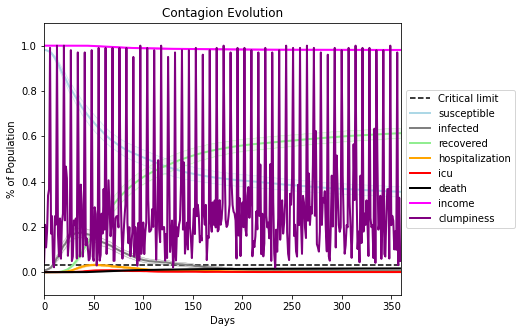

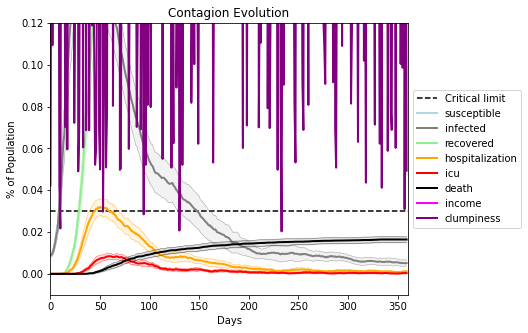

In [5]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[1412, 5811, 8231, 8820, 6144, 9562, 2439, 7657, 880, 3370, 3530, 9272, 9207, 5448, 7935, 6799, 9042, 1427, 7679, 3210, 3421, 627, 6634, 1261, 4067, 151, 9450, 2520, 1132, 7895]
Average similarity between family members is 0.9695424711400911 at temperature -0.999
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset o

Average similarity between family and home is 0.9902559232575109 at temperature -1
Average similarity between students and their classroom is 0.6744206821439187 at temperature -0.999
Average similarity between workers is 0.7510920098513347 at temperature -0.999
Average friend similarity for adults: 0.962266500413168 for kids: 0.957742111291633
run with seed 1412:
avg restaurant similarity -0.1935656780661153
avg restaurant similarity 0.46210517476106094
avg restaurant similarity 0.21793539939646778
avg restaurant similarity 0.4065203622200811
avg restaurant similarity 0.22517349580790963
avg restaurant similarity 0.20851459243149514
avg restaurant similarity 0.012476453045737846
avg restaurant similarity -0.15123293990043712
avg restaurant similarity -0.04293758946770098
avg restaurant similarity 0.0400233826239441
avg restaurant similarity -0.004742806260932238
avg restaurant similarity -0.07214253088485312
avg restaurant similarity 0.12227838999172952
avg restaurant similarity 0.0057

avg restaurant similarity 0.036557988096867194
avg restaurant similarity 0.09419979210617002
avg restaurant similarity 0.07652687903126036
avg restaurant similarity 0.18128225535695866
avg restaurant similarity 0.01758045072828797
avg restaurant similarity 0.21906516585604188
avg restaurant similarity 0.1749987439588613
avg restaurant similarity 0.15144896181185166
avg restaurant similarity 0.3692930726445795
avg restaurant similarity -0.0309564225367188
avg restaurant similarity 0.008337429585740488
avg restaurant similarity -0.1263885397895818
avg restaurant similarity 0.11945874197593896
avg restaurant similarity -0.09705512606683121
avg restaurant similarity -0.08398708025320645
avg restaurant similarity 0.25394354959284715
avg restaurant similarity 0.21556642431909526
avg restaurant similarity -0.017677584477624752
avg restaurant similarity 0.18088498980546092
avg restaurant similarity 0.725164023237636
avg restaurant similarity 0.021777478170283304
avg restaurant similarity 0.204

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset 

avg restaurant similarity 0.27228916095670014
avg restaurant similarity 0.3585976241493172
avg restaurant similarity 0.3770498912853665
avg restaurant similarity 0.28559823092252207
avg restaurant similarity 0.42674751355450574
avg restaurant similarity 0.3004933798162179
avg restaurant similarity 0.3230420401727098
avg restaurant similarity 0.3407034684319435
avg restaurant similarity 0.4096521510312364
avg restaurant similarity 0.3909725166699535
avg restaurant similarity 0.29126684193239094
avg restaurant similarity 0.31669765106630554
avg restaurant similarity 0.2896135396286621
avg restaurant similarity 0.2600951226058772
avg restaurant similarity 0.27308844550850964
avg restaurant similarity 0.3254119810438015
avg restaurant similarity 0.26222312255556185
avg restaurant similarity 0.27970794219065304
avg restaurant similarity 0.2013473540426405
avg restaurant similarity 0.23125438987426725
avg restaurant similarity 0.4370908626199051
avg restaurant similarity 0.49903705286194494


avg restaurant similarity 0.30688369293147444
avg restaurant similarity 0.266088198301928
avg restaurant similarity 0.2728412568412246
avg restaurant similarity 0.250575664807816
avg restaurant similarity 0.4148634352415999
avg restaurant similarity 0.3203275400892008
avg restaurant similarity 0.3209018305774891
avg restaurant similarity 0.37871579958579654
avg restaurant similarity 0.3758912406501113
avg restaurant similarity 0.44171306655327863
avg restaurant similarity 0.34955253998236324
avg restaurant similarity 0.3023414694154956
avg restaurant similarity 0.4766749137855369
avg restaurant similarity 0.3208112184077084
avg restaurant similarity 0.27232715828144516
avg restaurant similarity 0.4726791056054777
avg restaurant similarity 0.26957306331835557
avg restaurant similarity 0.37902788482338345
avg restaurant similarity 0.335459180849161
avg restaurant similarity 0.4376579256157925
avg restaurant similarity 0.20852840960348107
avg restaurant similarity 0.3385140611664428
avg r

tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset o

avg restaurant similarity 0.18126508568064661
avg restaurant similarity 0.3258976290849223
avg restaurant similarity 0.23545252564342606
avg restaurant similarity 0.25621400232925934
avg restaurant similarity 0.17823425274067758
avg restaurant similarity 0.050914680657050806
avg restaurant similarity 0.14464296255400824
avg restaurant similarity 0.10362800865004229
avg restaurant similarity 0.18582897805099213
avg restaurant similarity 0.2598025477106133
avg restaurant similarity 0.22921036326314315
avg restaurant similarity 0.13870186364015308
avg restaurant similarity 0.04422216912194655
avg restaurant similarity 0.39316828164619266
avg restaurant similarity 0.12372027533796773
avg restaurant similarity 0.1625960563365701
avg restaurant similarity 0.1852164815927989
avg restaurant similarity 0.25690690793434634
avg restaurant similarity 0.23598732618788792
avg restaurant similarity 0.1989452902488785
avg restaurant similarity 0.31342649626009506
avg restaurant similarity 0.2103477533

avg restaurant similarity 0.15071390974296514
avg restaurant similarity 0.07362522351605799
avg restaurant similarity 0.07968444707077647
avg restaurant similarity 0.1547532340381486
avg restaurant similarity 0.10305132002398205
avg restaurant similarity 0.15114294456821076
avg restaurant similarity 0.28877457084202685
avg restaurant similarity 0.28822489464941503
avg restaurant similarity 0.2720700212433474
avg restaurant similarity 0.034790363578904075
avg restaurant similarity -0.028043386460616243
avg restaurant similarity -0.10100755903794968
Average similarity between family members is 0.9787160602428161 at temperature -0.999
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 no

Average similarity between family and home is 0.9917739266891893 at temperature -1
Average similarity between students and their classroom is 0.7127325751484043 at temperature -0.999
Average similarity between workers is 0.8028472036100895 at temperature -0.999
Average friend similarity for adults: 0.9783096881262356 for kids: 0.9700877391200559
run with seed 8820:
avg restaurant similarity 0.2733652337946332
avg restaurant similarity 0.4138730329956821
avg restaurant similarity 0.2841910464882638
avg restaurant similarity 0.18356685966462083
avg restaurant similarity 0.3991118991220387
avg restaurant similarity 0.3969404027285199
avg restaurant similarity 0.3396578261376243
avg restaurant similarity 0.3392451531752843
avg restaurant similarity 0.17451124948972377
avg restaurant similarity 0.3912672976760918
avg restaurant similarity 0.39388721162189605
avg restaurant similarity 0.3633710275762046
avg restaurant similarity 0.42467212444900626
avg restaurant similarity 0.442566380956931

avg restaurant similarity 0.403623939548128
avg restaurant similarity 0.41720463172581446
avg restaurant similarity 0.13636216435445903
avg restaurant similarity 0.29170413838105186
avg restaurant similarity 0.2637202916647792
avg restaurant similarity 0.37539623408314965
avg restaurant similarity 0.20451370151716886
avg restaurant similarity 0.2610254975614404
avg restaurant similarity 0.27261085734426127
avg restaurant similarity 0.20903213614640123
avg restaurant similarity 0.2844202446000405
avg restaurant similarity 0.378645998735624
avg restaurant similarity 0.209328190634545
avg restaurant similarity 0.25215176565867065
avg restaurant similarity 0.32265595991994483
avg restaurant similarity 0.3319735551910843
avg restaurant similarity 0.42861309081487287
avg restaurant similarity 0.3969417343256395
avg restaurant similarity 0.2782143012468769
avg restaurant similarity 0.29052275683861667
avg restaurant similarity 0.2797886639211657
avg restaurant similarity 0.3293963284696238
av

tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset 

avg restaurant similarity 0.2831239274393069
avg restaurant similarity 0.2979961663416481
avg restaurant similarity 0.46369241087263596
avg restaurant similarity 0.3379323539449601
avg restaurant similarity 0.3104074035202294
avg restaurant similarity 0.35424347681479956
avg restaurant similarity 0.28983836433273774
avg restaurant similarity 0.19804893607020907
avg restaurant similarity 0.09123329311403944
avg restaurant similarity 0.09534059080073133
avg restaurant similarity 0.2634205782057393
avg restaurant similarity 0.20518011714156098
avg restaurant similarity 0.3526992593805603
avg restaurant similarity 0.23257044513774797
avg restaurant similarity 0.17374643346833196
avg restaurant similarity 0.22110099553694548
avg restaurant similarity 0.3423660848149386
avg restaurant similarity 0.2612012368468507
avg restaurant similarity 0.3462476582564044
avg restaurant similarity 0.1426581746421205
avg restaurant similarity 0.38176690117137085
avg restaurant similarity 0.2724826231430106

avg restaurant similarity 0.23331802025774812
avg restaurant similarity 0.23403106243807192
avg restaurant similarity 0.16384848450636166
avg restaurant similarity 0.2630940050945611
avg restaurant similarity 0.0013125047901399746
avg restaurant similarity 0.29212739933453236
avg restaurant similarity 0.17497207555338506
avg restaurant similarity 0.14415861198659422
avg restaurant similarity 0.13433577878801162
avg restaurant similarity 0.35445576973997217
avg restaurant similarity 0.16608793347450063
avg restaurant similarity 0.3002398218245682
avg restaurant similarity 0.19092992761360664
avg restaurant similarity 0.2974795619060485
avg restaurant similarity 0.2944138729541245
avg restaurant similarity 0.29419036079480254
avg restaurant similarity 0.20009111364989854
avg restaurant similarity 0.15673110324403006
avg restaurant similarity 0.4266571614828809
avg restaurant similarity 0.18367921596102157
avg restaurant similarity 0.28021115028226984
avg restaurant similarity 0.306134764

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset o

avg restaurant similarity 0.2760125456106705
avg restaurant similarity 0.4448257652955381
avg restaurant similarity 0.18501275843740714
avg restaurant similarity 0.38077909598905324
avg restaurant similarity 0.45688227866010567
avg restaurant similarity 0.25269520979173593
avg restaurant similarity 0.5257752781866555
avg restaurant similarity 0.3835804978311752
avg restaurant similarity 0.3750978497392093
avg restaurant similarity 0.3590382876944518
avg restaurant similarity 0.39485295608437476
avg restaurant similarity 0.4315923947750732
avg restaurant similarity 0.4535099029787046
avg restaurant similarity 0.47121264897491544
avg restaurant similarity 0.42219449319151997
avg restaurant similarity 0.18785854895734552
avg restaurant similarity 0.3542061154972931
avg restaurant similarity 0.39509591639275227
avg restaurant similarity 0.5542628468959092
avg restaurant similarity 0.469253223934317
avg restaurant similarity 0.5961515554937951
avg restaurant similarity 0.3773262333480655
av

avg restaurant similarity 0.3378170193993903
avg restaurant similarity 0.0917455322235393
avg restaurant similarity 0.29656842542738093
avg restaurant similarity 0.2520208777895597
avg restaurant similarity 0.28533535593601983
avg restaurant similarity 0.34277937289341537
avg restaurant similarity 0.5376469490141138
avg restaurant similarity 0.37555629649066913
avg restaurant similarity 0.5909783523359879
avg restaurant similarity 0.44000198188446377
avg restaurant similarity 0.1717920893100472
avg restaurant similarity 0.10850019780865615
avg restaurant similarity 0.3758506778116457
avg restaurant similarity 0.39851178905504964
avg restaurant similarity 0.5039120860750171
avg restaurant similarity 0.3371563793589052
avg restaurant similarity 0.22951389850482826
avg restaurant similarity 0.47611463283703326
avg restaurant similarity 0.42243777629111995
avg restaurant similarity 0.37199218155771513
avg restaurant similarity 0.2657112147082624
avg restaurant similarity 0.3363084507101022

tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of

avg restaurant similarity 0.2112915385691348
avg restaurant similarity 0.2663180445302325
avg restaurant similarity 0.3804224217768821
avg restaurant similarity 0.36446056929334464
avg restaurant similarity 0.4120863096205821
avg restaurant similarity 0.34597391842961106
avg restaurant similarity 0.4685947941113747
avg restaurant similarity 0.3144960954044657
avg restaurant similarity 0.4574570832700469
avg restaurant similarity 0.35164597338008063
avg restaurant similarity 0.3796895632147636
avg restaurant similarity 0.4296655197824145
avg restaurant similarity 0.4769831369870502
avg restaurant similarity 0.32561903018744975
avg restaurant similarity 0.35688258319000515
avg restaurant similarity 0.40717440801854365
avg restaurant similarity 0.24976695425542464
avg restaurant similarity 0.09114268643652917
avg restaurant similarity 0.3057402954665391
avg restaurant similarity 0.47226133834770934
avg restaurant similarity 0.18349014249622003
avg restaurant similarity 0.3285839474151217


tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of 

avg restaurant similarity 0.3251628655710971
avg restaurant similarity 0.1324752192934453
avg restaurant similarity 0.09178106658421924
avg restaurant similarity 0.14051002765903706
avg restaurant similarity 0.22737386469320567
avg restaurant similarity 0.13179771253794278
avg restaurant similarity 0.5380774097211194
avg restaurant similarity 0.4025069271600988
avg restaurant similarity 0.2554117624299834
avg restaurant similarity 0.2483515791157843
avg restaurant similarity 0.15358943836668634
avg restaurant similarity 0.3439502442771853
avg restaurant similarity 0.2715013182886587
avg restaurant similarity 0.4291301116811694
avg restaurant similarity 0.10982567899445309
avg restaurant similarity 0.387337737789118
avg restaurant similarity 0.27028400424558485
avg restaurant similarity 0.43130301870193927
avg restaurant similarity 0.2643025307642872
avg restaurant similarity 0.13697333499845435
avg restaurant similarity 0.20343390567037964
avg restaurant similarity 0.11605100531135579


avg restaurant similarity 0.29424275704031055
avg restaurant similarity 0.11082521311571002
avg restaurant similarity 0.21815038831965564
avg restaurant similarity 0.2173909517117066
avg restaurant similarity 0.5447772500759271
avg restaurant similarity 0.2919179491726372
avg restaurant similarity 0.4163283385042031
avg restaurant similarity 0.23379723542859163
avg restaurant similarity 0.3750396286580378
avg restaurant similarity 0.21968660135725182
avg restaurant similarity 0.23621410585371921
avg restaurant similarity 0.1284148893687317
avg restaurant similarity 0.13605179693317138
avg restaurant similarity 0.2037871206758849
avg restaurant similarity 0.18254313331502753
avg restaurant similarity 0.2546378477582471
avg restaurant similarity 0.4248775842423946
avg restaurant similarity 0.25810191586787345
avg restaurant similarity 0.20645691693875096
avg restaurant similarity 0.38982975817518384
avg restaurant similarity 0.31897117518492213
avg restaurant similarity 0.119840221112911

tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset o

avg restaurant similarity 0.07202476023972745
avg restaurant similarity 0.21128358591797028
avg restaurant similarity 0.5767247643171843
avg restaurant similarity 0.3480775570034092
avg restaurant similarity 0.3210120393631058
avg restaurant similarity 0.16659037029505416
avg restaurant similarity 0.03573513113801511
avg restaurant similarity 0.2569150623899248
avg restaurant similarity 0.1788834312067132
avg restaurant similarity 0.3679091037773596
avg restaurant similarity 0.43315445545923986
avg restaurant similarity 0.3854900635742966
avg restaurant similarity 0.5316811611628729
avg restaurant similarity 0.24692061610777186
avg restaurant similarity 0.03438398455259965
avg restaurant similarity 0.19705071880932853
avg restaurant similarity 0.04346194582726741
avg restaurant similarity 0.5156817636340217
avg restaurant similarity 0.12907882648496283
avg restaurant similarity 0.24368831966084473
avg restaurant similarity 0.25620988955396673
avg restaurant similarity 0.283070378626209

avg restaurant similarity 0.2645997717835275
avg restaurant similarity 0.3678779577031084
avg restaurant similarity 0.22510471010367808
avg restaurant similarity 0.2416746660828423
avg restaurant similarity 0.09979119150154768
avg restaurant similarity 0.16109272745989736
avg restaurant similarity 0.10442093567122494
avg restaurant similarity 0.12853800281274927
avg restaurant similarity 0.06762694607166994
avg restaurant similarity 0.09096093877122227
avg restaurant similarity 0.12355808514779479
avg restaurant similarity 0.16091587658867565
avg restaurant similarity 0.32181422634567863
avg restaurant similarity -0.0036457237232753363
avg restaurant similarity 0.3438013267799661
avg restaurant similarity 0.40593727362824306
avg restaurant similarity 0.26110147150144764
avg restaurant similarity 0.32790507225890925
avg restaurant similarity 0.19576296129415632
avg restaurant similarity 0.1023740900125672
avg restaurant similarity 0.15917431521232267
avg restaurant similarity 0.07972362

tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of

avg restaurant similarity 0.26771187397744145
avg restaurant similarity 0.33286303630178393
avg restaurant similarity 0.38602241953807104
avg restaurant similarity 0.23378185999156162
avg restaurant similarity 0.5296578588294063
avg restaurant similarity 0.3395333710563585
avg restaurant similarity 0.31986483739311916
avg restaurant similarity 0.25594217305585826
avg restaurant similarity 0.3731815640156753
avg restaurant similarity 0.3358318753372031
avg restaurant similarity 0.23214131578991823
avg restaurant similarity 0.21556815963721207
avg restaurant similarity 0.27231920520805347
avg restaurant similarity 0.5391132658157524
avg restaurant similarity 0.26261577822798265
avg restaurant similarity 0.31730307909471095
avg restaurant similarity 0.3094355832618795
avg restaurant similarity 0.29925002879191753
avg restaurant similarity 0.4640714948187513
avg restaurant similarity 0.2329456687953488
avg restaurant similarity 0.42684286600889465
avg restaurant similarity 0.31555703510032

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset 

avg restaurant similarity 0.3043019472896579
avg restaurant similarity 0.3532615099008164
avg restaurant similarity 0.311777160875106
avg restaurant similarity 0.3433448725668543
avg restaurant similarity 0.40095231100639245
avg restaurant similarity 0.33942746308293936
avg restaurant similarity 0.14623804192032422
avg restaurant similarity 0.31283012183540726
avg restaurant similarity 0.3731872423608895
avg restaurant similarity 0.2886475130453724
avg restaurant similarity 0.22425082214865558
avg restaurant similarity 0.2742675591577886
avg restaurant similarity 0.4838389450358636
avg restaurant similarity 0.2611783645100593
avg restaurant similarity 0.3885209162254532
avg restaurant similarity 0.22648017166396586
avg restaurant similarity 0.5034549683020808
avg restaurant similarity 0.2950174669385033
avg restaurant similarity 0.1831214293827098
avg restaurant similarity 0.36495263459645966
avg restaurant similarity 0.3781385357825283
avg restaurant similarity 0.29307018995109607
avg

avg restaurant similarity 0.3103666665501291
avg restaurant similarity 0.27593211445293886
avg restaurant similarity 0.24262379249588029
avg restaurant similarity 0.30145565382496653
avg restaurant similarity 0.21986482214311123
avg restaurant similarity 0.3132596962667279
avg restaurant similarity 0.3452952256345871
avg restaurant similarity 0.31595369466937473
avg restaurant similarity 0.17932590779359195
avg restaurant similarity 0.14036194343536984
avg restaurant similarity 0.03227512086562162
avg restaurant similarity 0.25849472687637154
avg restaurant similarity 0.3250804846870288
avg restaurant similarity 0.15866408362048245
avg restaurant similarity 0.2354495303947628
avg restaurant similarity 0.355306155173439
avg restaurant similarity 0.28825323864824487
avg restaurant similarity 0.29137865431071497
avg restaurant similarity 0.38414483845150665
avg restaurant similarity 0.23972995330707147
avg restaurant similarity 0.3761778937992519
avg restaurant similarity 0.03261920304719

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of 

avg restaurant similarity 0.2909345081806542
avg restaurant similarity 0.31540375106200913
avg restaurant similarity 0.3225364533424709
avg restaurant similarity 0.35121239899409085
avg restaurant similarity 0.32373619173830603
avg restaurant similarity 0.2809500583322036
avg restaurant similarity 0.31183341004504106
avg restaurant similarity 0.292268902502058
avg restaurant similarity 0.31731983830725646
avg restaurant similarity 0.32155844489700985
avg restaurant similarity 0.34618843549590317
avg restaurant similarity 0.41447317459080857
avg restaurant similarity 0.39741718109663365
avg restaurant similarity 0.4450505991483477
avg restaurant similarity 0.27537416116806723
avg restaurant similarity 0.3480428131202613
avg restaurant similarity 0.3616949176083938
avg restaurant similarity 0.27052241015684714
avg restaurant similarity 0.16397192783660533
avg restaurant similarity 0.4052266890553418
avg restaurant similarity 0.26558495291470163
avg restaurant similarity 0.292868144302623

avg restaurant similarity 0.33825393834103107
avg restaurant similarity 0.35526803785440764
avg restaurant similarity 0.48397781621485925
avg restaurant similarity 0.3556642668581227
avg restaurant similarity 0.2518934812498559
avg restaurant similarity 0.3221166097010405
avg restaurant similarity 0.48137950535236274
avg restaurant similarity 0.44375511389355154
avg restaurant similarity 0.3457602619271171
avg restaurant similarity 0.4237242841114384
avg restaurant similarity 0.3321543172050453
avg restaurant similarity 0.26237691733936086
avg restaurant similarity 0.29860521175307203
avg restaurant similarity 0.30282755271354905
avg restaurant similarity 0.31383161093930445
avg restaurant similarity 0.41163878873878407
avg restaurant similarity 0.36528397040818694
avg restaurant similarity 0.40013830748861634
avg restaurant similarity 0.4429746686989848
avg restaurant similarity 0.3987686953348926
avg restaurant similarity 0.4442085640469914
avg restaurant similarity 0.305734860041201

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset o

avg restaurant similarity 0.14717679517724885
avg restaurant similarity 0.3364883106843809
avg restaurant similarity 0.16138560565364043
avg restaurant similarity 0.4169963423171149
avg restaurant similarity 0.20515395204809928
avg restaurant similarity 0.2876450386773013
avg restaurant similarity 0.4171879318958847
avg restaurant similarity 0.20547570261749848
avg restaurant similarity 0.2770887430985115
avg restaurant similarity 0.37422979902932635
avg restaurant similarity 0.6072384415093944
avg restaurant similarity 0.5968595448561179
avg restaurant similarity 0.2572673977351766
avg restaurant similarity 0.22236133875091868
avg restaurant similarity 0.0788674962716735
avg restaurant similarity 0.4306029420854845
avg restaurant similarity 0.3072972937879902
avg restaurant similarity 0.24208088531349764
avg restaurant similarity 0.2947112870656564
avg restaurant similarity 0.44148988130298505
avg restaurant similarity 0.3609556834900307
avg restaurant similarity 0.43889494010292357
a

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset 

avg restaurant similarity 0.2282516763107244
avg restaurant similarity 0.22660559787824508
avg restaurant similarity 0.31211606965111893
avg restaurant similarity 0.30215805910514665
avg restaurant similarity -0.059389215733342306
avg restaurant similarity 0.14069995336038088
avg restaurant similarity 0.10176257198515894
avg restaurant similarity 0.1794008032497087
avg restaurant similarity 0.047759894488498086
avg restaurant similarity 0.06690433501948057
avg restaurant similarity 0.30240695185621314
avg restaurant similarity 0.13022932906492948
avg restaurant similarity 0.013861686613877846
avg restaurant similarity 0.2751176104490053
avg restaurant similarity 0.3359881061695015
avg restaurant similarity -0.028395494741003252
avg restaurant similarity 0.29990159710378517
avg restaurant similarity 0.133316400013738
avg restaurant similarity -0.07841712485090147
avg restaurant similarity -0.04434299780707642
avg restaurant similarity 0.13124541478304402
avg restaurant similarity 0.3035

avg restaurant similarity 0.10799911614768001
avg restaurant similarity 0.10378251301388373
avg restaurant similarity 0.6049872864762269
avg restaurant similarity 0.1120834879811163
avg restaurant similarity -0.06779443775457224
avg restaurant similarity 0.14990455772273567
avg restaurant similarity -0.07033269424821885
avg restaurant similarity 0.07026306180001515
avg restaurant similarity 0.21392227736501496
avg restaurant similarity -0.008470647495849616
avg restaurant similarity 0.020032316590590498
avg restaurant similarity -0.19556599996907417
avg restaurant similarity 0.5526939657463142
avg restaurant similarity -0.0022659640273960473
avg restaurant similarity 0.28143696891571457
avg restaurant similarity 0.46004344972024075
avg restaurant similarity 0.05739019705624968
avg restaurant similarity 0.32811750651419325
avg restaurant similarity 0.09022062269763308
avg restaurant similarity 0.5222301416927047
avg restaurant similarity -0.08121569338561176
avg restaurant similarity 0.

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of

avg restaurant similarity 0.17047144577217932
avg restaurant similarity 0.2127633534838349
avg restaurant similarity 0.23054522630608226
avg restaurant similarity 0.2590560705956119
avg restaurant similarity 0.21673709345508838
avg restaurant similarity 0.11009096630957481
avg restaurant similarity 0.2619475067665246
avg restaurant similarity 0.2618658263799732
avg restaurant similarity 0.24861698689891643
avg restaurant similarity 0.3566830882941362
avg restaurant similarity 0.30902500413762074
avg restaurant similarity 0.1731596304089761
avg restaurant similarity 0.20152982085184037
avg restaurant similarity 0.41143719661437184
avg restaurant similarity 0.24943578422396012
avg restaurant similarity 0.28171256555101476
avg restaurant similarity 0.18066826611606515
avg restaurant similarity 0.16635998748745015
avg restaurant similarity 0.3466669530175064
avg restaurant similarity 0.32097517608427845
avg restaurant similarity 0.06438731061321235
avg restaurant similarity 0.3054417196444

avg restaurant similarity 0.2580395309867825
avg restaurant similarity 0.18976753500585292
avg restaurant similarity 0.31143311084026404
avg restaurant similarity 0.16321358740363215
avg restaurant similarity 0.29279630282956565
avg restaurant similarity 0.19418757863229524
avg restaurant similarity 0.4394048096467465
avg restaurant similarity 0.08421230257662479
avg restaurant similarity 0.23978374218203227
avg restaurant similarity 0.238950345448862
avg restaurant similarity 0.3839682869469832
avg restaurant similarity 0.2843025630550179
avg restaurant similarity 0.19953744486748862
avg restaurant similarity 0.2792233719413229
avg restaurant similarity 0.16583247283818217
avg restaurant similarity 0.19683529447526818
avg restaurant similarity 0.15804992265683993
avg restaurant similarity 0.2147932976589734
avg restaurant similarity 0.05726458803758147
avg restaurant similarity 0.2406618853733625
avg restaurant similarity 0.12270819611704445
avg restaurant similarity 0.334313321594182

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
Average similarity between family and home is 0.9925547410088483 at temperature -1
Average similarity between students and their classroom is 0.6675948909332756 at temperature -0.999
Average similarity between workers is 0.7929190652753422 at temperature -0.999
Average friend similarity for adults: 0.9753606415962235 for kids: 0.9573706020336159
run with seed 6799:
avg r

avg restaurant similarity 0.2633140776388142
avg restaurant similarity 0.2141260094350226
avg restaurant similarity 0.3142038215453042
avg restaurant similarity 0.29523654140530314
avg restaurant similarity 0.30234224444383284
avg restaurant similarity 0.3733485575431725
avg restaurant similarity 0.3178557576198585
avg restaurant similarity 0.39736428710155575
avg restaurant similarity 0.1350082197910123
avg restaurant similarity 0.11406487477886346
avg restaurant similarity 0.19115157282859344
avg restaurant similarity -0.044103881874916644
avg restaurant similarity 0.4526848376803876
avg restaurant similarity -0.008780495112154467
avg restaurant similarity -0.021273083581094355
avg restaurant similarity 0.17597256198853475
avg restaurant similarity -0.12003699902137656
avg restaurant similarity -0.21539949770987984
avg restaurant similarity -0.027681414909131074
avg restaurant similarity -0.29234283149889106
avg restaurant similarity 0.3115391195260014
avg restaurant similarity 0.380

tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset 

avg restaurant similarity 0.29751257013440124
avg restaurant similarity 0.2711576966613432
avg restaurant similarity 0.2115120692337116
avg restaurant similarity 0.11971230674960687
avg restaurant similarity 0.31522312204518926
avg restaurant similarity 0.1086499375163108
avg restaurant similarity 0.14838286108892373
avg restaurant similarity 0.20122690308683946
avg restaurant similarity 0.22404476483551358
avg restaurant similarity 0.25336356020786094
avg restaurant similarity 0.3097526415651652
avg restaurant similarity 0.2772160327028207
avg restaurant similarity 0.34616082349163396
avg restaurant similarity 0.3068623502421836
avg restaurant similarity 0.095201938253727
avg restaurant similarity 0.41960917588204677
avg restaurant similarity 0.007677215852184051
avg restaurant similarity 0.045048306842153406
avg restaurant similarity 0.3534159262248349
avg restaurant similarity 0.37879233472605833
avg restaurant similarity 0.10920506815876665
avg restaurant similarity 0.3116431909468

avg restaurant similarity 0.19381361529490157
avg restaurant similarity 0.43890011812093305
avg restaurant similarity 0.26990313616923395
avg restaurant similarity 0.1773959972284636
avg restaurant similarity 0.19714265889021787
avg restaurant similarity 0.1708624594809361
avg restaurant similarity 0.3288845694154061
avg restaurant similarity 0.07540493145224612
avg restaurant similarity 0.05003117974255922
avg restaurant similarity 0.255352360149904
avg restaurant similarity 0.21804932724150417
avg restaurant similarity 0.16891832208328553
avg restaurant similarity 0.19174484707546466
avg restaurant similarity 0.22881173165857074
avg restaurant similarity 0.11847598809468048
avg restaurant similarity 0.22671001245850878
avg restaurant similarity 0.17504246050074376
avg restaurant similarity 0.11740774677128743
avg restaurant similarity 0.17288739481485052
avg restaurant similarity 0.19155284286146626
avg restaurant similarity 0.14168079056331617
avg restaurant similarity 0.19168221787

tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of

avg restaurant similarity 0.12029080266281263
avg restaurant similarity 0.27469897006242044
avg restaurant similarity 0.1138918345006955
avg restaurant similarity 0.1514181010383555
avg restaurant similarity 0.4914093858099965
avg restaurant similarity 0.2950338947393338
avg restaurant similarity 0.2015509094554412
avg restaurant similarity 0.23244541281812647
avg restaurant similarity 0.31331566948455986
avg restaurant similarity 0.2961102448887932
avg restaurant similarity 0.13404346113191193
avg restaurant similarity 0.2326642071165026
avg restaurant similarity 0.37149602865213616
avg restaurant similarity 0.42926821708283946
avg restaurant similarity 0.25572053131541095
avg restaurant similarity 0.3346958870681261
avg restaurant similarity 0.2094934724633609
avg restaurant similarity 0.160614607190514
avg restaurant similarity 0.27971853965236954
avg restaurant similarity 0.3351949393367225
avg restaurant similarity 0.4177719749740085
avg restaurant similarity 0.23081869574805405
a

avg restaurant similarity 0.16947761101536707
avg restaurant similarity -0.012796632657444929
avg restaurant similarity 0.4106971851234655
avg restaurant similarity 0.20630089238282182
avg restaurant similarity 0.07652316402478068
avg restaurant similarity 0.2223100515899653
avg restaurant similarity 0.3178669794863985
avg restaurant similarity 0.41637898085569935
avg restaurant similarity 0.23793330128583615
avg restaurant similarity 0.2151575249384251
avg restaurant similarity 0.3199931537895222
avg restaurant similarity 0.1822806148444284
avg restaurant similarity 0.35594060435760816
avg restaurant similarity 0.2616523272066486
avg restaurant similarity 0.2950807527766909
avg restaurant similarity 0.24860733334735044
avg restaurant similarity 0.5279430444150628
avg restaurant similarity 0.23942199211687856
avg restaurant similarity 0.512033254395898
avg restaurant similarity 0.20926358699765849
avg restaurant similarity 0.1801008674082393
avg restaurant similarity 0.2189560614096952

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
Average similarity between family and home is 0.9923798642679443 at temperature -1
Average sim

avg restaurant similarity 0.3220945898643445
avg restaurant similarity 0.33914840357404163
avg restaurant similarity 0.12240745059874787
avg restaurant similarity 0.26060056126815134
avg restaurant similarity 0.2574483203154909
avg restaurant similarity 0.2902240077292807
avg restaurant similarity 0.44090245130908345
avg restaurant similarity -0.03995343816622537
avg restaurant similarity 0.13760330097683832
avg restaurant similarity 0.35245119795841845
avg restaurant similarity 0.0969764522614635
avg restaurant similarity 0.3706121471632805
avg restaurant similarity 0.36189241566809804
avg restaurant similarity 0.12063533201766662
avg restaurant similarity -0.0038849457361168223
avg restaurant similarity 0.3484543123832124
avg restaurant similarity 0.1493711955203035
avg restaurant similarity 0.42599248343026946
avg restaurant similarity 0.3086772783282391
avg restaurant similarity 0.12920436356957615
avg restaurant similarity 0.04783262899639465
avg restaurant similarity 0.4580438366

tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset 

avg restaurant similarity 0.33487618732223895
avg restaurant similarity 0.2910691308610497
avg restaurant similarity 0.20759623257211113
avg restaurant similarity 0.32170509736974967
avg restaurant similarity 0.19134058235077475
avg restaurant similarity 0.19929348070229042
avg restaurant similarity 0.3753847978983379
avg restaurant similarity 0.21495863921174696
avg restaurant similarity 0.2414440707424023
avg restaurant similarity 0.19692655464228617
avg restaurant similarity 0.45437567467775636
avg restaurant similarity 0.06682602932490601
avg restaurant similarity 0.288494380899556
avg restaurant similarity 0.12507380058712447
avg restaurant similarity 0.06972633012376675
avg restaurant similarity 0.23185187656888304
avg restaurant similarity 0.4690572607249352
avg restaurant similarity 0.1782370800355861
avg restaurant similarity 0.09656591160496703
avg restaurant similarity 0.29373729807599064
avg restaurant similarity 0.25643584225638966
avg restaurant similarity 0.3140112328932

avg restaurant similarity 0.2739581394183713
avg restaurant similarity 0.1687895928795482
avg restaurant similarity 0.2942068966824123
avg restaurant similarity 0.23828904473700666
avg restaurant similarity 0.12218106226646533
avg restaurant similarity 0.3803436468900997
avg restaurant similarity 0.11514549797125488
avg restaurant similarity 0.2859902992731275
avg restaurant similarity 0.1989736690779839
avg restaurant similarity 0.26373902742860184
avg restaurant similarity 0.3228969227801765
avg restaurant similarity 0.31074068558587203
avg restaurant similarity 0.12003008011848194
avg restaurant similarity 0.18987328612673274
avg restaurant similarity 0.22755793262591026
avg restaurant similarity 0.2371821427755927
avg restaurant similarity 0.16667333705554785
avg restaurant similarity 0.30526680802972744
avg restaurant similarity 0.3432252574381568
avg restaurant similarity 0.3923003082264879
avg restaurant similarity 0.28942407992940405
avg restaurant similarity 0.2421560309642266

tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset

avg restaurant similarity 0.36875083441408935
avg restaurant similarity 0.5561176375757373
avg restaurant similarity 0.5919920331570593
avg restaurant similarity 0.46499463528759427
avg restaurant similarity 0.4110607874651437
avg restaurant similarity 0.42064694655434837
avg restaurant similarity 0.407169152316471
avg restaurant similarity 0.28800561155729154
avg restaurant similarity 0.25199022802870236
avg restaurant similarity 0.39487095816593293
avg restaurant similarity 0.28854440507976004
avg restaurant similarity 0.3819665209956059
avg restaurant similarity 0.4113876516793462
avg restaurant similarity 0.30238794919503065
avg restaurant similarity 0.3464972588187157
avg restaurant similarity 0.37660912779002714
avg restaurant similarity 0.4402657198336379
avg restaurant similarity 0.35836122394030323
avg restaurant similarity 0.3668714465026395
avg restaurant similarity 0.4203883873060949
avg restaurant similarity 0.6061344377095467
avg restaurant similarity 0.41384052056751225


avg restaurant similarity 0.2908845146437705
avg restaurant similarity 0.26345840172177915
avg restaurant similarity 0.24087943899600786
avg restaurant similarity 0.2506671346412682
avg restaurant similarity 0.32885841682982425
avg restaurant similarity 0.3530681347018958
avg restaurant similarity 0.27169472053870053
avg restaurant similarity 0.3675463804743137
avg restaurant similarity 0.14670437870612577
avg restaurant similarity 0.33686375455169115
avg restaurant similarity 0.25250398957736464
avg restaurant similarity 0.33042137844186936
avg restaurant similarity 0.4708516551959117
avg restaurant similarity 0.2714586393488816
avg restaurant similarity 0.27933074671596314
avg restaurant similarity 0.36534674846612575
avg restaurant similarity 0.3567615143636263
avg restaurant similarity 0.23203859971079474
avg restaurant similarity 0.3949310127226867
avg restaurant similarity 0.3127810980362959
avg restaurant similarity 0.46548485917881444
avg restaurant similarity 0.295869858513668

tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
Average similarity betwee

avg restaurant similarity 0.32466686590812943
avg restaurant similarity 0.29595819619413793
avg restaurant similarity 0.2859149171447695
avg restaurant similarity 0.2706675366197888
avg restaurant similarity 0.3378782297657865
avg restaurant similarity 0.43364578844486096
avg restaurant similarity 0.23313767089198498
avg restaurant similarity 0.20680189258584386
avg restaurant similarity 0.33939879254825156
avg restaurant similarity 0.24069813320034475
avg restaurant similarity 0.32254561470688
avg restaurant similarity 0.19833108610422467
avg restaurant similarity 0.370727991557513
avg restaurant similarity 0.3068974925060091
avg restaurant similarity 0.14541061303985567
avg restaurant similarity 0.28261804915324695
avg restaurant similarity 0.3804432572682927
avg restaurant similarity 0.19019030906701587
avg restaurant similarity 0.34061650340078914
avg restaurant similarity 0.1320240488310053
avg restaurant similarity 0.15632714561458239
avg restaurant similarity 0.3858667799778378


tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of

avg restaurant similarity 0.2213774128008309
avg restaurant similarity 0.17199621524639952
avg restaurant similarity 0.2942992511947656
avg restaurant similarity 0.32630289882928304
avg restaurant similarity 0.09768856510899011
avg restaurant similarity 0.3552755080911257
avg restaurant similarity 0.13381970578140678
avg restaurant similarity 0.14959612909348446
avg restaurant similarity 0.2358201887039327
avg restaurant similarity 0.24405052373472033
avg restaurant similarity 0.2202902259160093
avg restaurant similarity 0.30227044875875475
avg restaurant similarity 0.2890666630037468
avg restaurant similarity 0.23245851173486717
avg restaurant similarity 0.11807615413459867
avg restaurant similarity 0.4538680256907628
avg restaurant similarity 0.38613489535209133
avg restaurant similarity 0.22450516156780045
avg restaurant similarity 0.26786897267438414
avg restaurant similarity 0.13949800064106418
avg restaurant similarity 0.10991211830697589
avg restaurant similarity 0.1749767392323

avg restaurant similarity 0.2219965958315664
avg restaurant similarity 0.2567071122729845
avg restaurant similarity 0.3914128348553245
avg restaurant similarity 0.2643602941627555
avg restaurant similarity 0.015852746933610176
avg restaurant similarity 0.25989423000272527
avg restaurant similarity 0.15989914728723334
avg restaurant similarity 0.04605604921300335
avg restaurant similarity 0.06504380848298988
avg restaurant similarity -0.05716384005776375
avg restaurant similarity 0.18207640942748735
avg restaurant similarity 0.1653648180025644
avg restaurant similarity 0.14673902645936585
avg restaurant similarity 0.412688620022239
avg restaurant similarity 0.23886534126878964
avg restaurant similarity 0.27224466161197075
avg restaurant similarity 0.1483285026501207
avg restaurant similarity 0.38380717563661
avg restaurant similarity 0.08933854108023973
avg restaurant similarity 0.19303505013929173
avg restaurant similarity 0.2819044884945746
avg restaurant similarity 0.3198900159600371

tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of

avg restaurant similarity 0.3012816642221879
avg restaurant similarity 0.5360164204800463
avg restaurant similarity 0.3035007572273396
avg restaurant similarity 0.30789007314032285
avg restaurant similarity 0.3730148967285109
avg restaurant similarity 0.42227780372622664
avg restaurant similarity 0.3720742740707717
avg restaurant similarity 0.41478713507424025
avg restaurant similarity 0.40251121473856977
avg restaurant similarity 0.45317199933251745
avg restaurant similarity 0.3704256397897999
avg restaurant similarity 0.37198683730708454
avg restaurant similarity 0.2962034034485933
avg restaurant similarity 0.4317122953877048
avg restaurant similarity 0.4537186905795949
avg restaurant similarity 0.47114528466666483
avg restaurant similarity 0.3593283263079677
avg restaurant similarity 0.321371385762512
avg restaurant similarity 0.358080225276426
avg restaurant similarity 0.41346976647735595
avg restaurant similarity 0.37096646107987846
avg restaurant similarity 0.4613475313822951
avg

avg restaurant similarity 0.4281094036204242
avg restaurant similarity 0.553608892591677
avg restaurant similarity 0.4706051091874386
avg restaurant similarity 0.4559162514750514
avg restaurant similarity 0.39549570125342537
avg restaurant similarity 0.54190244580263
avg restaurant similarity 0.5070224729543569
avg restaurant similarity 0.3985810198694244
avg restaurant similarity 0.3818946706043521
avg restaurant similarity 0.5739716235077262
avg restaurant similarity 0.5004234690542817
avg restaurant similarity 0.46863298934145764
avg restaurant similarity 0.3384909187366754
avg restaurant similarity 0.6491299337158503
avg restaurant similarity 0.3944783060037324
avg restaurant similarity 0.41304733384162146
avg restaurant similarity 0.4360005699666084
avg restaurant similarity 0.5112401761100949
avg restaurant similarity 0.3496299491455092
avg restaurant similarity 0.40863239225631753
avg restaurant similarity 0.3502571689080726
avg restaurant similarity 0.40358449138592595
avg rest

tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of

avg restaurant similarity 0.14871665224913702
avg restaurant similarity 0.27438608640376844
avg restaurant similarity 0.05299411331973754
avg restaurant similarity -0.03291917362903665
avg restaurant similarity 0.32479058158284707
avg restaurant similarity 0.1699411771694208
avg restaurant similarity 0.20449379764239797
avg restaurant similarity 0.02516411304649649
avg restaurant similarity 0.4247572270117842
avg restaurant similarity 0.25625783893417386
avg restaurant similarity 0.3521209727132472
avg restaurant similarity 0.15333236926532665
avg restaurant similarity 0.40752093339263495
avg restaurant similarity 0.24830876125190732
avg restaurant similarity 0.22503927430369072
avg restaurant similarity 0.3869520069704863
avg restaurant similarity 0.3794538666140464
avg restaurant similarity 0.1724188395831842
avg restaurant similarity 0.13215549893918854
avg restaurant similarity 0.121124994614815
avg restaurant similarity 0.22142200211408875
avg restaurant similarity 0.2605349865385

tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset 

avg restaurant similarity 0.16379983287755928
avg restaurant similarity 0.14607046810133778
avg restaurant similarity 0.09016580376462541
avg restaurant similarity -0.15479256335353564
avg restaurant similarity 0.09359965832929833
avg restaurant similarity 0.19301131521862125
avg restaurant similarity 0.2814873580460583
avg restaurant similarity 0.16521392508327984
avg restaurant similarity 0.1731695057950342
avg restaurant similarity 0.015386919946736863
avg restaurant similarity 0.11158252348306243
avg restaurant similarity -0.03993005105643308
avg restaurant similarity 0.2793323958824426
avg restaurant similarity 0.1651819637842009
avg restaurant similarity 0.14655567600783945
avg restaurant similarity 0.09976826051895363
avg restaurant similarity -0.02346222284965307
avg restaurant similarity 0.13525713169589104
avg restaurant similarity 0.049449204877065604
avg restaurant similarity -0.06619116781451911
avg restaurant similarity 0.08611815961670712
avg restaurant similarity 0.0195

avg restaurant similarity 0.057091345441695515
avg restaurant similarity 0.028759430631230164
avg restaurant similarity -0.014173997541525696
avg restaurant similarity 0.3549018401388221
avg restaurant similarity 0.3251782080621578
avg restaurant similarity -0.006874427726334749
avg restaurant similarity 0.34663586275060376
avg restaurant similarity 0.3512445429955868
avg restaurant similarity 0.1249918456008569
avg restaurant similarity 0.016222035365014723
avg restaurant similarity 0.10682928860062497
avg restaurant similarity 0.2010851055043481
avg restaurant similarity -0.007547147666540915
avg restaurant similarity 0.21344781299675497
avg restaurant similarity 0.2658495178546245
avg restaurant similarity 0.2215604908537562
avg restaurant similarity -0.031876271229594445
avg restaurant similarity 0.1379297907345371
avg restaurant similarity 0.08516540927297371
avg restaurant similarity 0.38541653925774466
avg restaurant similarity 0.14606301912585087
avg restaurant similarity 0.111

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset o

avg restaurant similarity 0.2547324933527292
avg restaurant similarity 0.3002175506299058
avg restaurant similarity 0.24101282663386242
avg restaurant similarity 0.33289582741002066
avg restaurant similarity 0.33288993014506796
avg restaurant similarity 0.3133593319110643
avg restaurant similarity 0.33934491703192937
avg restaurant similarity 0.18805987861732498
avg restaurant similarity 0.3164686160614272
avg restaurant similarity 0.36095347736934674
avg restaurant similarity 0.3069711101698253
avg restaurant similarity 0.16147172074754146
avg restaurant similarity 0.33997518349583705
avg restaurant similarity 0.3036865333035439
avg restaurant similarity 0.2720369891900406
avg restaurant similarity 0.3795498545235781
avg restaurant similarity 0.39819674697030694
avg restaurant similarity 0.24656058315237747
avg restaurant similarity 0.30126097202099844
avg restaurant similarity 0.2187430288175529
avg restaurant similarity 0.3403889778960371
avg restaurant similarity 0.435454830825556


avg restaurant similarity 0.26574116195607345
avg restaurant similarity 0.3546228781867574
avg restaurant similarity 0.36629313444545986
avg restaurant similarity 0.33854462555069953
avg restaurant similarity 0.2328423902221253
avg restaurant similarity 0.3450258323718722
avg restaurant similarity 0.37080858387378496
avg restaurant similarity 0.23690120872375975
avg restaurant similarity 0.4061311665839541
avg restaurant similarity 0.40860523567853285
avg restaurant similarity 0.538847613008392
avg restaurant similarity 0.3243189280510004
avg restaurant similarity 0.25519240984975333
avg restaurant similarity 0.3248950883545085
avg restaurant similarity 0.344589346648133
avg restaurant similarity 0.254729985373723
avg restaurant similarity 0.2647544750120507
avg restaurant similarity 0.2074201914601077
avg restaurant similarity 0.357716612045562
avg restaurant similarity 0.3888845088755444
avg restaurant similarity 0.44784148128979856
avg restaurant similarity 0.4312302913541112
avg re

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of 

avg restaurant similarity 0.13703995572764552
avg restaurant similarity 0.1485821889146817
avg restaurant similarity 0.30284581918602743
avg restaurant similarity 0.08542139586350082
avg restaurant similarity 0.23893639150172938
avg restaurant similarity 0.481433815215159
avg restaurant similarity 0.17224271209067185
avg restaurant similarity 0.20515068231342573
avg restaurant similarity 0.1165920785660204
avg restaurant similarity 0.12617340067401897
avg restaurant similarity 0.2042963255168774
avg restaurant similarity 0.27263374477758906
avg restaurant similarity 0.2860868622471008
avg restaurant similarity 0.07194015944695509
avg restaurant similarity 0.27741557474192585
avg restaurant similarity 0.419400337763403
avg restaurant similarity 0.17242304542486325
avg restaurant similarity 0.20258591985054802
avg restaurant similarity 0.15459529642210507
avg restaurant similarity 0.28861938219043953
avg restaurant similarity 0.024027862689704273
avg restaurant similarity 0.2060081857007

tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset 

avg restaurant similarity 0.45247550019880184
avg restaurant similarity 0.3625242020057019
avg restaurant similarity 0.38446185570907393
avg restaurant similarity 0.2157921063108423
avg restaurant similarity 0.24392516819168608
avg restaurant similarity 0.27984160475447223
avg restaurant similarity 0.2259157580516848
avg restaurant similarity 0.16601452967011232
avg restaurant similarity 0.17345115498522265
avg restaurant similarity 0.08336652112416244
avg restaurant similarity 0.2514083158499346
avg restaurant similarity 0.07588119817025528
avg restaurant similarity 0.25887861367854875
avg restaurant similarity 0.16861780651168154
avg restaurant similarity 0.1544970349433596
avg restaurant similarity 0.2069405217916692
avg restaurant similarity 0.1594335520102741
avg restaurant similarity 0.17884590355258073
avg restaurant similarity 0.3690158851083875
avg restaurant similarity 0.28187289979927205
avg restaurant similarity 0.20158645973297667
avg restaurant similarity 0.03853819763329

avg restaurant similarity 0.1905050672695739
avg restaurant similarity 0.2417842084028554
avg restaurant similarity 0.13796234263793816
avg restaurant similarity 0.15445026635701817
avg restaurant similarity 0.06792630638221477
avg restaurant similarity 0.2548029795441426
avg restaurant similarity 0.23210708349766876
avg restaurant similarity 0.1472979473294342
avg restaurant similarity 0.41137005570301194
avg restaurant similarity -0.009507323792511204
avg restaurant similarity 0.2885212980334594
avg restaurant similarity 0.40207649301695375
avg restaurant similarity 0.16458522987807422
avg restaurant similarity -0.004236571195897659
avg restaurant similarity 0.08367642249757656
avg restaurant similarity 0.36323516129991845
avg restaurant similarity 0.29183888738052244
avg restaurant similarity 0.33361503860829445
avg restaurant similarity 0.3922622496574305
avg restaurant similarity 0.16949589456436315
avg restaurant similarity 0.36466491519033545
avg restaurant similarity 0.26420087

tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset o

avg restaurant similarity 0.24311464192904073
avg restaurant similarity 0.17124351925316864
avg restaurant similarity 0.06075070904763085
avg restaurant similarity 0.2517623606009771
avg restaurant similarity 0.1537568132635942
avg restaurant similarity 0.1584353586254475
avg restaurant similarity 0.2061381166894457
avg restaurant similarity 0.1236517168066487
avg restaurant similarity 0.22722014789363243
avg restaurant similarity 0.20144012945382966
avg restaurant similarity 0.30393736240471714
avg restaurant similarity 0.29801280121885176
avg restaurant similarity 0.42650232864797705
avg restaurant similarity 0.3257229695190485
avg restaurant similarity 0.023296073492553804
avg restaurant similarity 0.22679013602952885
avg restaurant similarity 0.2752824245008125
avg restaurant similarity 0.39383297043226984
avg restaurant similarity 0.13054866464287718
avg restaurant similarity 0.4222652479498282
avg restaurant similarity 0.12063138486593959
avg restaurant similarity 0.1540947412753

avg restaurant similarity 0.27072112319219194
avg restaurant similarity 0.378661354065594
avg restaurant similarity 0.4018929818531408
avg restaurant similarity 0.35859879625958985
avg restaurant similarity 0.4722454252506476
avg restaurant similarity 0.12973573244672632
avg restaurant similarity 0.6198310027778782
avg restaurant similarity 0.40196358238095414
avg restaurant similarity 0.2638744577381468
avg restaurant similarity 0.386258300658991
avg restaurant similarity 0.36872998842517757
avg restaurant similarity 0.49004072429430695
avg restaurant similarity 0.31436705031503936
avg restaurant similarity 0.2373836171656713
avg restaurant similarity 0.1421928094893792
avg restaurant similarity 0.4956213237667606
avg restaurant similarity 0.4101482084012897
avg restaurant similarity 0.27786260434160753
avg restaurant similarity 0.28745343999717765
avg restaurant similarity 0.2484598237888455
avg restaurant similarity 0.41183064497559113
avg restaurant similarity 0.33567237834544783
a

(<function dict.items>, <function dict.items>, <function dict.items>)

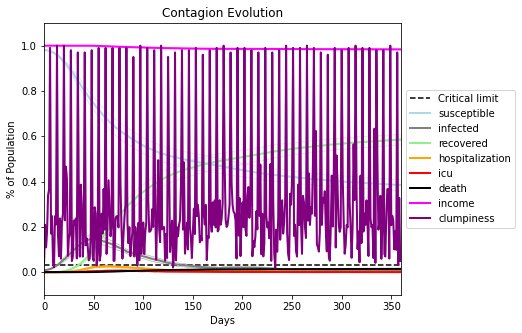

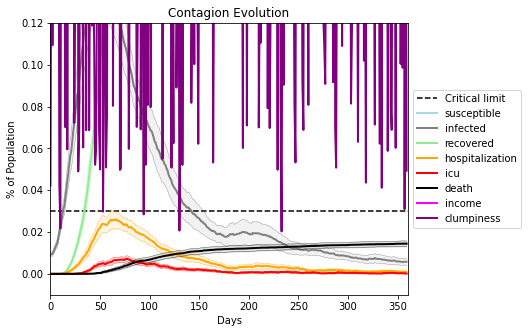

In [6]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.999
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[5505, 4867, 2871, 8227, 1967, 3830, 2469, 26, 7723, 2542, 9511, 7686, 5722, 5721, 7417, 4755, 9338, 9432, 4313, 8106, 5329, 6641, 6124, 1394, 2075, 6818, 8027, 8704, 3960, 2293]
Average similarity between family members is 0.013564708263476347 at temperature 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of s

Average similarity between workers is 0.04917003201805205 at temperature 1
Average friend similarity for adults: 0.09190338158240541 for kids: 0.09529692687456667
run with seed 5505:
avg restaurant similarity -0.004703826506718051
avg restaurant similarity -0.06951411802544646
avg restaurant similarity 0.017790617067696295
avg restaurant similarity -0.08077599486417866
avg restaurant similarity 0.010673136264375419
avg restaurant similarity -0.13221193226349134
avg restaurant similarity 0.08629397262149457
avg restaurant similarity -0.01101416588414924
avg restaurant similarity 0.12411791590617721
avg restaurant similarity 0.06237804458251725
avg restaurant similarity 0.024789982443236637
avg restaurant similarity -0.10061958008968076
avg restaurant similarity 0.04653151261162861
avg restaurant similarity 0.028849714497485485
avg restaurant similarity 0.10005340619822195
avg restaurant similarity 0.03793116637870016
avg restaurant similarity -0.049689868472844345
avg restaurant similar

avg restaurant similarity 0.01941873149547907
avg restaurant similarity 0.06239983004779808
avg restaurant similarity 0.1286589350890223
avg restaurant similarity -0.04345580371829627
avg restaurant similarity -0.04733251728672667
avg restaurant similarity 0.05102233148334804
avg restaurant similarity 0.018627066685393066
avg restaurant similarity -0.07756428707686269
avg restaurant similarity -0.00801268121319363
avg restaurant similarity 0.03576958936622761
avg restaurant similarity 0.18252824370373527
avg restaurant similarity 0.03341959020020249
avg restaurant similarity -0.028764052123244656
avg restaurant similarity 0.2879127260192259
avg restaurant similarity -0.08480301312223239
avg restaurant similarity 0.10868389785430953
avg restaurant similarity 0.06553499512767347
avg restaurant similarity -0.021860125575668535
avg restaurant similarity 0.0146314031177504
avg restaurant similarity -0.01823358667366136
avg restaurant similarity -0.012965147983692856
avg restaurant similarit

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of

avg restaurant similarity 0.087892579205157
avg restaurant similarity 0.06563666993010601
avg restaurant similarity 0.09222318386802573
avg restaurant similarity 0.12827200682651427
avg restaurant similarity 0.10382738964358393
avg restaurant similarity 0.17613637357041817
avg restaurant similarity 0.13739374328960186
avg restaurant similarity 0.054257103470832894
avg restaurant similarity 0.11356447707082987
avg restaurant similarity 0.05030212958655372
avg restaurant similarity 0.044827055965143234
avg restaurant similarity 0.059939706272225154
avg restaurant similarity 0.08975658092566724
avg restaurant similarity 0.052756132826997024
avg restaurant similarity 0.07931600907591126
avg restaurant similarity 0.09126325645092895
avg restaurant similarity 0.055538924533161706
avg restaurant similarity 0.07963783863080785
avg restaurant similarity 0.019026430715870835
avg restaurant similarity 0.08280244123371147
avg restaurant similarity 0.047882969662352774
avg restaurant similarity 0.0

avg restaurant similarity -0.0053231644546555806
avg restaurant similarity -0.0017992914273295669
avg restaurant similarity 0.04911381963021106
avg restaurant similarity -0.006938797871957412
avg restaurant similarity 0.027619592898473745
avg restaurant similarity 0.05990460941166393
avg restaurant similarity 0.06787933884305367
avg restaurant similarity 0.057210531198886826
avg restaurant similarity 0.019634003829637457
avg restaurant similarity 0.06520128715226449
avg restaurant similarity 0.06227671113930636
avg restaurant similarity 0.11406586908386464
avg restaurant similarity 0.07862184161175041
avg restaurant similarity 0.054476442373803134
avg restaurant similarity 0.07017389756398273
avg restaurant similarity 0.08817900145028694
avg restaurant similarity 0.027008460454513456
avg restaurant similarity 0.017687646996441504
avg restaurant similarity 0.12398765502418337
avg restaurant similarity 0.10336411722511099
avg restaurant similarity 0.10461069244084774
avg restaurant simil

tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset o

avg restaurant similarity 0.06280399747538097
avg restaurant similarity 0.03591249328717805
avg restaurant similarity 0.14069846693120996
avg restaurant similarity 0.1014883251988779
avg restaurant similarity 0.13478350871348346
avg restaurant similarity 0.15875227713096776
avg restaurant similarity 0.09707871831796991
avg restaurant similarity 0.13834022565087628
avg restaurant similarity 0.15457581991751734
avg restaurant similarity 0.1637080814509707
avg restaurant similarity 0.22049877245464006
avg restaurant similarity 0.10579068061142775
avg restaurant similarity 0.09375011051208317
avg restaurant similarity 0.07981596892392288
avg restaurant similarity 0.07988534898801808
avg restaurant similarity 0.09196999970911188
avg restaurant similarity 0.012255193698337037
avg restaurant similarity 0.20821317760575406
avg restaurant similarity 0.18299145668087702
avg restaurant similarity 0.09225954817674215
avg restaurant similarity 0.12863002344391922
avg restaurant similarity 0.1088276

avg restaurant similarity 0.11895892663327072
avg restaurant similarity 0.14237569681716067
avg restaurant similarity 0.07472317943661029
avg restaurant similarity 0.1773873277691372
avg restaurant similarity 0.12542268948938384
avg restaurant similarity 0.0028750845588160928
avg restaurant similarity 0.03119768798437025
avg restaurant similarity 0.069353533192389
avg restaurant similarity 0.1421478646941538
avg restaurant similarity 0.08969346541879568
avg restaurant similarity 0.14726877958165124
avg restaurant similarity 0.13730156022486872
avg restaurant similarity 0.012382867897530974
avg restaurant similarity 0.0680496541536419
avg restaurant similarity 0.09866504197911632
avg restaurant similarity 0.11583341119313359
avg restaurant similarity 0.12191310444216924
avg restaurant similarity 0.059636130671813385
avg restaurant similarity 0.2270902530202654
avg restaurant similarity 0.14502716725805326
avg restaurant similarity 0.09712462453753083
avg restaurant similarity 0.07295656

Average similarity between students and their classroom is 0.08091525338710462 at temperature 1
Average similarity between workers is 0.019121412333351472 at temperature 1
Average friend similarity for adults: 0.11680101630608844 for kids: 0.13547157353154776
run with seed 8227:
avg restaurant similarity 0.015239948668349835
avg restaurant similarity 0.003486314201514645
avg restaurant similarity 0.055839631795270496
avg restaurant similarity -0.028186318697505534
avg restaurant similarity 0.06964546407685863
avg restaurant similarity -0.05167031737275155
avg restaurant similarity 0.047433823464752424
avg restaurant similarity 0.02838703392928528
avg restaurant similarity 0.016460711150632787
avg restaurant similarity -0.05211456435448817
avg restaurant similarity -0.04646391945159958
avg restaurant similarity 0.07795351205316675
avg restaurant similarity 0.027169471528205286
avg restaurant similarity -0.010687891952272103
avg restaurant similarity 0.004882697755035359
avg restaurant s

avg restaurant similarity 0.011277976537598464
avg restaurant similarity 0.0109622051646921
avg restaurant similarity 0.022783897029526004
avg restaurant similarity 0.018429113809352145
avg restaurant similarity 0.02042320670690291
avg restaurant similarity -0.062185006127160804
avg restaurant similarity 0.00409364080773055
avg restaurant similarity 0.03875775165517655
avg restaurant similarity 0.05578727083457378
avg restaurant similarity 0.019893693982534696
avg restaurant similarity 0.04945232039190335
avg restaurant similarity 0.04025917973971162
avg restaurant similarity 0.004768902549017591
avg restaurant similarity -0.0853485303665721
avg restaurant similarity 0.01918776192240594
avg restaurant similarity 0.08042872297123325
avg restaurant similarity -0.04180314785877729
avg restaurant similarity 0.009792971695624942
avg restaurant similarity 0.0038032046970030535
avg restaurant similarity 0.10210920730121491
avg restaurant similarity 0.10147393032467132
avg restaurant similarit

tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset 

avg restaurant similarity 0.14158725230173413
avg restaurant similarity -0.0117122338377171
avg restaurant similarity 0.09976920588436929
avg restaurant similarity 0.04170176227919521
avg restaurant similarity 0.06172988232210717
avg restaurant similarity 0.17611340650613294
avg restaurant similarity 0.08400984478661548
avg restaurant similarity 0.09899491270539848
avg restaurant similarity 0.024412664828890443
avg restaurant similarity 0.08814700842723537
avg restaurant similarity 0.03947868332122308
avg restaurant similarity 0.0313309376252757
avg restaurant similarity 0.07212221260593452
avg restaurant similarity 0.1346578925285402
avg restaurant similarity 0.06884504402516317
avg restaurant similarity 0.05226533231752788
avg restaurant similarity 0.09439621671068764
avg restaurant similarity 0.08278132566917017
avg restaurant similarity 0.12435781920644197
avg restaurant similarity 0.04156762382100914
avg restaurant similarity 0.109268039264973
avg restaurant similarity 0.049600947

avg restaurant similarity 0.05515112083877838
avg restaurant similarity 0.16946206372378367
avg restaurant similarity 0.02565186555580242
avg restaurant similarity 0.06642487957237306
avg restaurant similarity 0.09456371053427694
avg restaurant similarity 0.11509772737027564
avg restaurant similarity 0.07461240978576243
avg restaurant similarity 0.12632060791178937
avg restaurant similarity 0.08978526217410246
avg restaurant similarity 0.0899406225442131
avg restaurant similarity 0.13160450705785956
avg restaurant similarity 0.13524063908882097
avg restaurant similarity 0.09871672018155384
avg restaurant similarity 0.08835285660912778
avg restaurant similarity 0.07857790929156745
avg restaurant similarity 0.07048583213205561
avg restaurant similarity 0.05394006150483551
avg restaurant similarity 0.02410193461180321
avg restaurant similarity 0.0567320303989218
avg restaurant similarity 0.0814542828434429
avg restaurant similarity 0.08598063538937971
avg restaurant similarity 0.037875664

tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of 

avg restaurant similarity 0.08798979986817833
avg restaurant similarity -0.03251917894753545
avg restaurant similarity 0.029568051597342344
avg restaurant similarity -0.01192594525754759
avg restaurant similarity 0.07621049648939335
avg restaurant similarity 0.04782163710388319
avg restaurant similarity 0.025363759572754788
avg restaurant similarity 0.04682675734160217
avg restaurant similarity 0.06631132408625325
avg restaurant similarity -0.005871247054670775
avg restaurant similarity 0.014600287616868617
avg restaurant similarity 0.06767940208844155
avg restaurant similarity 0.06498099460428765
avg restaurant similarity 0.09045414044605744
avg restaurant similarity 0.018937894685485887
avg restaurant similarity 0.04338385884151977
avg restaurant similarity 0.070123501807034
avg restaurant similarity 0.006843142226681277
avg restaurant similarity 0.07364194044991915
avg restaurant similarity 0.11546145805418591
avg restaurant similarity 0.026636534020133145
avg restaurant similarity 

avg restaurant similarity 0.02933606139189566
avg restaurant similarity 0.0183185410195844
avg restaurant similarity 0.15309710634953322
avg restaurant similarity 0.04626933305394387
avg restaurant similarity 0.06381166008093368
avg restaurant similarity 0.09633307900972755
avg restaurant similarity 0.09164328607557595
avg restaurant similarity 0.07667002422632116
avg restaurant similarity 0.06906110066210061
avg restaurant similarity 0.02995580071571039
avg restaurant similarity 0.0468581306122293
avg restaurant similarity 0.01369576484711207
avg restaurant similarity 0.03593116357559425
avg restaurant similarity 0.03317807723166565
avg restaurant similarity -0.00039752291296485067
avg restaurant similarity 0.07899454244783526
avg restaurant similarity 0.09456042045348348
avg restaurant similarity 0.07139924264739604
avg restaurant similarity 0.03394873286121248
avg restaurant similarity 0.03953055697395934
avg restaurant similarity 0.05087583586320072
avg restaurant similarity 0.0060

Average similarity between family and home is 0.9917911174405513 at temperature -1
Average similarity between students and their classroom is 0.11519495644124748 at temperature 1
Average similarity between workers is 0.06524064411965556 at temperature 1
Average friend similarity for adults: 0.11849649094003332 for kids: 0.12985023281126173
run with seed 2469:
avg restaurant similarity 0.11964544244468955
avg restaurant similarity 0.14189295510549255
avg restaurant similarity -0.24492467273747556
avg restaurant similarity 0.20384384801858885
avg restaurant similarity 0.1257154578241043
avg restaurant similarity 0.0006947585157594274
avg restaurant similarity 0.36771939542215043
avg restaurant similarity 0.12483269204939813
avg restaurant similarity -0.07198831711111535
avg restaurant similarity 0.1987159351589383
avg restaurant similarity 0.0022314931047372226
avg restaurant similarity 0.04949307958300373
avg restaurant similarity 0.30023731140510257
avg restaurant similarity -0.0493549

avg restaurant similarity 0.059142335208615955
avg restaurant similarity -0.06776000241205855
avg restaurant similarity 0.08557446703182109
avg restaurant similarity -0.1884666962890475
avg restaurant similarity 0.01587469813269585
avg restaurant similarity -0.05666436293591194
avg restaurant similarity 0.22874369153791402
avg restaurant similarity 0.20626055541049146
avg restaurant similarity 0.04484081943943994
avg restaurant similarity 0.12257174361240408
avg restaurant similarity 0.01012497518345315
avg restaurant similarity 0.14934602767285907
avg restaurant similarity 0.01913265005738507
avg restaurant similarity 0.049458707620975505
avg restaurant similarity -0.10311416367885262
avg restaurant similarity -0.12221475653124769
avg restaurant similarity 0.11417217860025977
avg restaurant similarity 0.1252327199340124
avg restaurant similarity 0.16848920978636903
avg restaurant similarity -0.053572650621797724
avg restaurant similarity 0.16612593218455907
avg restaurant similarity 0

tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset 

avg restaurant similarity 0.05014023758073028
avg restaurant similarity 0.14361222939462662
avg restaurant similarity 0.054743851803617474
avg restaurant similarity 0.15374650061756248
avg restaurant similarity 0.04219215656037765
avg restaurant similarity 0.12857471737534834
avg restaurant similarity 0.14634193135290324
avg restaurant similarity 0.08555212883116177
avg restaurant similarity 0.11994646093639512
avg restaurant similarity 0.14000438399732648
avg restaurant similarity -0.012765998578406964
avg restaurant similarity 0.05146422243367658
avg restaurant similarity 0.023675369598760987
avg restaurant similarity -0.03364466159827086
avg restaurant similarity 0.09060195417577861
avg restaurant similarity 0.1630137689420569
avg restaurant similarity 0.09551214553497425
avg restaurant similarity 0.0560169029319185
avg restaurant similarity 0.1630289418050566
avg restaurant similarity 0.05000776498895667
avg restaurant similarity 0.1134503086924149
avg restaurant similarity 0.13269

avg restaurant similarity -0.012642670627531485
avg restaurant similarity 0.07416370645677405
avg restaurant similarity 0.11629638918265205
avg restaurant similarity 0.06787823132979613
avg restaurant similarity 0.06649530819021701
avg restaurant similarity 0.1398367184259841
avg restaurant similarity 0.003962448656923787
avg restaurant similarity 0.17660178263550957
avg restaurant similarity 0.11090591527473181
avg restaurant similarity 0.08068376896371261
avg restaurant similarity 0.029229376641719686
avg restaurant similarity 0.10024403874611396
avg restaurant similarity 0.06906995287643365
avg restaurant similarity 0.035862590072141994
avg restaurant similarity 0.13826036219323606
avg restaurant similarity 0.04412614359034005
avg restaurant similarity 0.18994633028863694
avg restaurant similarity 0.07686855401942354
avg restaurant similarity 0.07743406835631937
avg restaurant similarity 0.024408997051731697
avg restaurant similarity 0.1974369229321321
avg restaurant similarity 0.03

tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 76
Average similarity between family and home is 0.9908239987213731 at temperature -1
Average similarity between students and their classroom is 0.19560951688917103 at t

avg restaurant similarity -0.0003488114527766112
avg restaurant similarity 0.011967947966475741
avg restaurant similarity 0.004805917246189944
avg restaurant similarity 0.030081503169900187
avg restaurant similarity 0.06480883122290265
avg restaurant similarity 0.0012701445770880585
avg restaurant similarity 0.06759355206208223
avg restaurant similarity 0.07677154741527642
avg restaurant similarity -0.003571367482627874
avg restaurant similarity 0.038142258443715105
avg restaurant similarity 0.04315309558232879
avg restaurant similarity 0.030066638204130552
avg restaurant similarity -0.04172197444111489
avg restaurant similarity 0.03139281092815776
avg restaurant similarity 0.07732024087532895
avg restaurant similarity 0.05386639624229993
avg restaurant similarity 0.006180547496011853
avg restaurant similarity -0.027291735967836447
avg restaurant similarity 0.045239078484702586
avg restaurant similarity -0.03074121665042404
avg restaurant similarity 0.04952209567382203
avg restaurant s

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset o

avg restaurant similarity 0.07628861612424158
avg restaurant similarity 0.14956853740404003
avg restaurant similarity 0.20219639043620402
avg restaurant similarity 0.11455996873130336
avg restaurant similarity 0.09878264716243454
avg restaurant similarity 0.17026998547013397
avg restaurant similarity 0.27566826314131104
avg restaurant similarity 0.15316582531065437
avg restaurant similarity 0.06259873302323532
avg restaurant similarity 0.19776675640955427
avg restaurant similarity 0.21094683309958362
avg restaurant similarity 0.10458929349445978
avg restaurant similarity 0.15626773114439965
avg restaurant similarity 0.15917789142327823
avg restaurant similarity 0.12556112786289164
avg restaurant similarity 0.17252167549714587
avg restaurant similarity 0.1859088328240738
avg restaurant similarity 0.1159752604536897
avg restaurant similarity 0.1251179041819945
avg restaurant similarity 0.17458362700466587
avg restaurant similarity 0.09365611902792119
avg restaurant similarity 0.177786517

avg restaurant similarity 0.19207250527783434
avg restaurant similarity 0.14130651483463427
avg restaurant similarity 0.13359069363606801
avg restaurant similarity 0.13177520798105732
avg restaurant similarity 0.056932018183720706
avg restaurant similarity 0.1131843575296053
avg restaurant similarity 0.11796573510811277
avg restaurant similarity 0.14878865009224532
avg restaurant similarity 0.11784270962418268
avg restaurant similarity 0.12146434748460114
avg restaurant similarity 0.2218712130996304
avg restaurant similarity 0.14973356448907715
avg restaurant similarity 0.03421763726486652
avg restaurant similarity 0.13464729620332547
avg restaurant similarity 0.1507034086695006
avg restaurant similarity 0.14693299244314084
avg restaurant similarity 0.10390927584320257
avg restaurant similarity 0.13808602417369928
avg restaurant similarity 0.13765378110457296
avg restaurant similarity 0.1470574931912738
avg restaurant similarity 0.18124786597596715
avg restaurant similarity 0.191230183

tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset o

avg restaurant similarity 0.14263478246341302
avg restaurant similarity 0.054952152412004206
avg restaurant similarity 0.17040935712226624
avg restaurant similarity 0.031655309816184064
avg restaurant similarity 0.18460715092474209
avg restaurant similarity 0.057516261638942315
avg restaurant similarity 0.07849552111638652
avg restaurant similarity 0.07515940771596268
avg restaurant similarity 0.11580073425320174
avg restaurant similarity 0.12257766943869317
avg restaurant similarity 0.09319089233834973
avg restaurant similarity 0.15169768793367022
avg restaurant similarity 0.1858675253213627
avg restaurant similarity 0.07945427492146015
avg restaurant similarity 0.09853853056934606
avg restaurant similarity 0.11888938929606825
avg restaurant similarity 0.09699456732320269
avg restaurant similarity 0.20995189549094995
avg restaurant similarity 0.10818734335707167
avg restaurant similarity 0.14254627812185205
avg restaurant similarity 0.09675821658430148
avg restaurant similarity 0.2476

avg restaurant similarity 0.09829375158205972
avg restaurant similarity 0.03743019461601608
avg restaurant similarity 0.15308260998795778
avg restaurant similarity 0.07384188234026742
avg restaurant similarity 0.22748749419727368
avg restaurant similarity 0.15391973404577627
avg restaurant similarity 0.14991377137030532
avg restaurant similarity 0.1230669886682296
avg restaurant similarity 0.19558083013312647
avg restaurant similarity 0.1134459764078858
avg restaurant similarity 0.12894694985206082
avg restaurant similarity 0.21143553347347716
avg restaurant similarity 0.14629877998775495
avg restaurant similarity 0.12496143400295169
avg restaurant similarity 0.1400238348987739
avg restaurant similarity 0.21833035549359162
avg restaurant similarity 0.062461538469262536
avg restaurant similarity 0.1882204937839297
avg restaurant similarity 0.1221623016737399
avg restaurant similarity 0.14243641279126976
avg restaurant similarity 0.16322612883733317
avg restaurant similarity 0.1525324083

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset 

avg restaurant similarity 0.19947527916492008
avg restaurant similarity 0.15119603405378232
avg restaurant similarity 0.15653673996769696
avg restaurant similarity 0.1997243314619698
avg restaurant similarity 0.05660989619667428
avg restaurant similarity 0.09492625066431593
avg restaurant similarity 0.19794608755232468
avg restaurant similarity 0.026221324314085907
avg restaurant similarity 0.052268181429156214
avg restaurant similarity -0.03537677596937892
avg restaurant similarity 0.0908295675251468
avg restaurant similarity 0.07714079228859386
avg restaurant similarity 0.10016310529774487
avg restaurant similarity 0.17216124863339718
avg restaurant similarity 0.15275879409223408
avg restaurant similarity 0.13278418168223138
avg restaurant similarity 0.10342259529806062
avg restaurant similarity 0.09415927461982808
avg restaurant similarity 0.12069880221577954
avg restaurant similarity 0.15866137381287235
avg restaurant similarity 0.11902824948490319
avg restaurant similarity 0.05815

avg restaurant similarity 0.0795812786196397
avg restaurant similarity 0.0720992248547321
avg restaurant similarity 0.16943018309859584
avg restaurant similarity 0.11931845149877572
avg restaurant similarity 0.11411574826297716
avg restaurant similarity 0.1307233738137005
avg restaurant similarity 0.17243846464138357
avg restaurant similarity 0.19471873272556353
Average similarity between family members is 0.09946918580811348 at temperature 1
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of siz

Average similarity between workers is 0.10159341404613645 at temperature 1
Average friend similarity for adults: 0.15809320501067198 for kids: 0.17232996726795674
run with seed 5722:
avg restaurant similarity 0.17961169712910335
avg restaurant similarity 0.18457249812158028
avg restaurant similarity 0.13753145643404194
avg restaurant similarity 0.15416222405022253
avg restaurant similarity 0.1955835611792709
avg restaurant similarity 0.1916547921636462
avg restaurant similarity 0.21233250758034672
avg restaurant similarity 0.15000281477906383
avg restaurant similarity 0.0717603593937634
avg restaurant similarity 0.16707273584093232
avg restaurant similarity 0.17726030617784455
avg restaurant similarity 0.15334487976981823
avg restaurant similarity 0.22039384954573085
avg restaurant similarity 0.14303806694360027
avg restaurant similarity 0.1349393954916302
avg restaurant similarity 0.15755635698351295
avg restaurant similarity 0.12496590332663056
avg restaurant similarity 0.14890877726

avg restaurant similarity 0.12948200537884133
avg restaurant similarity 0.09936425482094433
avg restaurant similarity 0.18837487833354355
avg restaurant similarity 0.0832050939564152
avg restaurant similarity 0.22466726701705006
avg restaurant similarity 0.1872226176391404
avg restaurant similarity 0.2059256605549137
avg restaurant similarity 0.17046567135870858
avg restaurant similarity 0.18236529933217588
avg restaurant similarity 0.20146247939263745
avg restaurant similarity 0.16107391355713796
avg restaurant similarity 0.17281864395808577
avg restaurant similarity 0.13846049707023658
avg restaurant similarity 0.17442419380336732
avg restaurant similarity 0.18533801238635117
avg restaurant similarity 0.20994275084633832
avg restaurant similarity 0.20292762357502958
avg restaurant similarity 0.1958686136845712
avg restaurant similarity 0.1703303136488698
avg restaurant similarity 0.2276393886784385
avg restaurant similarity 0.13230469934013392
avg restaurant similarity 0.164018882291

tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset o

avg restaurant similarity 0.10995444651719216
avg restaurant similarity 0.16608801371392004
avg restaurant similarity 0.2534337428034978
avg restaurant similarity 0.1804133185227642
avg restaurant similarity 0.1535108906578374
avg restaurant similarity 0.16973074356684845
avg restaurant similarity 0.17821742539660304
avg restaurant similarity 0.14371917223080066
avg restaurant similarity 0.18628719873435512
avg restaurant similarity 0.02770098515653791
avg restaurant similarity 0.21351181908987535
avg restaurant similarity 0.1602921358316047
avg restaurant similarity 0.1073191612510367
avg restaurant similarity 0.118949533917459
avg restaurant similarity 0.13362677771975737
avg restaurant similarity 0.10732300494614662
avg restaurant similarity 0.24023164237529718
avg restaurant similarity 0.14889108927190775
avg restaurant similarity 0.02940445378541323
avg restaurant similarity 0.25331584991593026
avg restaurant similarity 0.11116720837117751
avg restaurant similarity 0.1455478734002

avg restaurant similarity 0.10250705862442579
avg restaurant similarity 0.17756078167689318
avg restaurant similarity 0.19235807960495402
avg restaurant similarity 0.055847054009463395
avg restaurant similarity 0.20842486385690218
avg restaurant similarity 0.21749794281705073
avg restaurant similarity 0.16989750130097558
avg restaurant similarity 0.06072509942227567
avg restaurant similarity 0.12491464521162905
avg restaurant similarity 0.07739435075041304
avg restaurant similarity 0.2640673597480825
avg restaurant similarity 0.14899709608650633
avg restaurant similarity 0.054959049693754196
avg restaurant similarity 0.18677151464826067
avg restaurant similarity 0.1655737077337216
avg restaurant similarity 0.06961059396293191
avg restaurant similarity 0.08665135920887125
avg restaurant similarity 0.23038337801483205
avg restaurant similarity 0.18086771062910073
avg restaurant similarity 0.219533567539545
avg restaurant similarity 0.1688019789792456
avg restaurant similarity 0.123229857

tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset o

avg restaurant similarity -0.01333444828689959
avg restaurant similarity 0.007614074980409767
avg restaurant similarity 0.03923832755259183
avg restaurant similarity 0.002789782990659445
avg restaurant similarity 0.026484992408601252
avg restaurant similarity 0.027466349770545916
avg restaurant similarity 0.06260484464579986
avg restaurant similarity 0.03722523439096661
avg restaurant similarity 0.13764302409231433
avg restaurant similarity -0.0433047256810918
avg restaurant similarity -0.0538730476069871
avg restaurant similarity 0.0690471062282376
avg restaurant similarity 0.08210638881423984
avg restaurant similarity 0.05989776005255146
avg restaurant similarity 0.11946157290698908
avg restaurant similarity 0.094320362566059
avg restaurant similarity 0.11310939635898261
avg restaurant similarity 0.14573512992369295
avg restaurant similarity 0.058866552748570264
avg restaurant similarity 0.10318004792044234
avg restaurant similarity 0.07464257082847033
avg restaurant similarity 0.116

avg restaurant similarity 0.051839833362524124
avg restaurant similarity 0.06799909816868083
avg restaurant similarity -0.0076474064313861
avg restaurant similarity 0.05004168676282543
avg restaurant similarity 0.05822347128532285
avg restaurant similarity 0.013395841131910878
avg restaurant similarity -0.027606245904852115
avg restaurant similarity -0.014977531825484322
avg restaurant similarity -0.00490616223448225
avg restaurant similarity 0.03349050804952471
avg restaurant similarity 0.029171046375389264
avg restaurant similarity -0.003286843338126545
avg restaurant similarity -0.02494623519424182
avg restaurant similarity 0.04057170058812814
avg restaurant similarity -0.014058358447690645
avg restaurant similarity 0.060148641140311924
avg restaurant similarity -0.03735559525863003
avg restaurant similarity 0.05287647200257211
avg restaurant similarity 0.06713359853653042
avg restaurant similarity 0.0435036141370663
avg restaurant similarity 0.058230066627337554
avg restaurant simi

tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of

avg restaurant similarity 0.28715292587957686
avg restaurant similarity 0.2016592808303076
avg restaurant similarity 0.1860899079021828
avg restaurant similarity 0.242157739321351
avg restaurant similarity 0.2855109174245534
avg restaurant similarity 0.09703385451234266
avg restaurant similarity 0.16465321537577413
avg restaurant similarity 0.14606104843909037
avg restaurant similarity 0.2942207967892569
avg restaurant similarity 0.15668794563757463
avg restaurant similarity 0.2038657279216727
avg restaurant similarity 0.1786076715889865
avg restaurant similarity 0.16941891934366854
avg restaurant similarity 0.15133739042771807
avg restaurant similarity 0.24566617814585145
avg restaurant similarity 0.2175367446062089
avg restaurant similarity 0.19218157194039154
avg restaurant similarity 0.2405556957086875
avg restaurant similarity 0.20851848724817337
avg restaurant similarity 0.2483274549857699
avg restaurant similarity 0.18638740770522205
avg restaurant similarity 0.2289413469411987


tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of

Average similarity between family and home is 0.9915072663982493 at temperature -1
Average similarity between students and their classroom is 0.1334601889982214 at temperature 1
Average similarity between workers is 0.10043598281706695 at temperature 1
Average friend similarity for adults: 0.14116425571558788 for kids: 0.1512056755292582
run with seed 9338:
avg restaurant similarity 0.09974169253322174
avg restaurant similarity 0.06904085821207631
avg restaurant similarity 0.028713701903849802
avg restaurant similarity 0.068840461440355
avg restaurant similarity 0.1443232936785428
avg restaurant similarity 0.11070325783746832
avg restaurant similarity 0.11927156540980358
avg restaurant similarity 0.08466418797650553
avg restaurant similarity 0.07338267903162426
avg restaurant similarity 0.11484954134702292
avg restaurant similarity 0.11364819884052604
avg restaurant similarity 0.08451133798589089
avg restaurant similarity 0.11283542580389712
avg restaurant similarity 0.0824617133787179

avg restaurant similarity 0.1049387324096772
avg restaurant similarity 0.06499565975570153
avg restaurant similarity 0.07325476047420214
avg restaurant similarity 0.12738659592193202
avg restaurant similarity 0.11631073917391367
avg restaurant similarity 0.07758963376440803
avg restaurant similarity 0.09727841139679243
avg restaurant similarity 0.0995773660899812
avg restaurant similarity 0.13526993462573617
avg restaurant similarity 0.11973510218950832
avg restaurant similarity 0.144029023434104
avg restaurant similarity 0.09096672788205848
avg restaurant similarity 0.09848434478370699
avg restaurant similarity 0.13437928475832497
avg restaurant similarity 0.12157559542522908
avg restaurant similarity 0.0697723460501311
avg restaurant similarity 0.11715343272734512
avg restaurant similarity 0.11032942996693311
avg restaurant similarity 0.10166581696083775
avg restaurant similarity 0.14943001153001745
avg restaurant similarity 0.1467510196093084
avg restaurant similarity 0.088317401633

tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset 

avg restaurant similarity 0.031758061401413844
avg restaurant similarity 0.013463401474958983
avg restaurant similarity -0.002651656425813962
avg restaurant similarity 0.04079226589342729
avg restaurant similarity 0.08515767269915325
avg restaurant similarity 0.046192666924906124
avg restaurant similarity -0.03608099732650587
avg restaurant similarity 0.04924799332805359
avg restaurant similarity -0.016112751922400147
avg restaurant similarity 0.1213244019101812
avg restaurant similarity 0.06682001044919401
avg restaurant similarity 0.13155580829983865
avg restaurant similarity 0.06612877761005831
avg restaurant similarity -0.01338060030464576
avg restaurant similarity 0.0035859873809429526
avg restaurant similarity -0.036654654607150464
avg restaurant similarity 0.03349830736629538
avg restaurant similarity 0.008196254349287726
avg restaurant similarity 0.09530827298054306
avg restaurant similarity 0.03830571187123278
avg restaurant similarity -0.013818401175599047
avg restaurant simi

avg restaurant similarity 0.08352420294897143
avg restaurant similarity 0.026278667463977744
avg restaurant similarity 0.09155998149097272
avg restaurant similarity 0.14030446297412846
avg restaurant similarity 0.09819448072423756
avg restaurant similarity 0.045694549126014915
avg restaurant similarity 0.006364603065341571
avg restaurant similarity 0.07098003919234944
avg restaurant similarity 0.06862501165298786
avg restaurant similarity 0.055369703684418285
avg restaurant similarity 0.011806542955957185
avg restaurant similarity 0.028663915193654896
avg restaurant similarity 0.11753276374661856
avg restaurant similarity 0.025802138817785703
avg restaurant similarity 0.022743210111950095
avg restaurant similarity 0.13313430856641817
avg restaurant similarity 0.03468907314845276
avg restaurant similarity 0.04016451890770119
avg restaurant similarity 0.0870255675902058
avg restaurant similarity 0.07421567828624452
avg restaurant similarity 0.030683186818646915
avg restaurant similarity 

tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of

avg restaurant similarity 0.04598963865533077
avg restaurant similarity 0.11204577282098241
avg restaurant similarity 0.07737968527305239
avg restaurant similarity 0.19702447682041155
avg restaurant similarity 0.043656079638102085
avg restaurant similarity 0.0769396534115535
avg restaurant similarity 0.20636034550962284
avg restaurant similarity 0.05448870420588602
avg restaurant similarity 0.061890023269337284
avg restaurant similarity 0.17729504153972694
avg restaurant similarity 0.11591045915003721
avg restaurant similarity 0.0657800411764359
avg restaurant similarity 0.0012125616549468832
avg restaurant similarity 0.08112671101257618
avg restaurant similarity 0.10200442757092737
avg restaurant similarity 0.2133210813537
avg restaurant similarity 0.1652737374163055
avg restaurant similarity 0.15776860671362103
avg restaurant similarity 0.10834787741987197
avg restaurant similarity 0.10148890278969364
avg restaurant similarity 0.052842645034998637
avg restaurant similarity 0.12293719

avg restaurant similarity 0.06104370384066111
avg restaurant similarity 0.12784805443266084
avg restaurant similarity 0.12661341223776795
avg restaurant similarity 0.12086335494695326
avg restaurant similarity 0.08592085413665973
avg restaurant similarity 0.12424331502541075
avg restaurant similarity 0.11281237841137404
avg restaurant similarity 0.09740891792911449
avg restaurant similarity 0.04447991218896971
avg restaurant similarity 0.18458877710985097
avg restaurant similarity 0.17651162383721192
avg restaurant similarity 0.059804196521093575
avg restaurant similarity 0.12189036550155948
avg restaurant similarity 0.13820130387541718
avg restaurant similarity 0.04123745446210201
avg restaurant similarity 0.05110421036927546
avg restaurant similarity 0.09540968363732207
avg restaurant similarity 0.12001878435518676
Average similarity between family members is 0.18658115855679663 at temperature 1
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 68
tup_vec1 not in kee

Average similarity between family and home is 0.9933016655771989 at temperature -1
Average similarity between students and their classroom is 0.325249539470921 at temperature 1
Average similarity between workers is 0.1901615306101781 at temperature 1
Average friend similarity for adults: 0.24979594574807676 for kids: 0.2512212485862973
run with seed 8106:
avg restaurant similarity 0.22718816450308715
avg restaurant similarity 0.2023317975435961
avg restaurant similarity 0.19539557706022337
avg restaurant similarity 0.2795298634165929
avg restaurant similarity 0.1905965123997679
avg restaurant similarity 0.23038076810647148
avg restaurant similarity 0.2959071805750083
avg restaurant similarity 0.27403452179397014
avg restaurant similarity 0.21555770966649027
avg restaurant similarity 0.22309747876663438
avg restaurant similarity 0.23649196084190505
avg restaurant similarity 0.2814656007205227
avg restaurant similarity 0.21052682848153673
avg restaurant similarity 0.2266506108808374
avg 

avg restaurant similarity 0.2433856707738462
avg restaurant similarity 0.24100607618431077
avg restaurant similarity 0.21253810039970375
avg restaurant similarity 0.23366699431339935
avg restaurant similarity 0.2195477480748845
avg restaurant similarity 0.22124289433487662
avg restaurant similarity 0.20666365657488842
avg restaurant similarity 0.29916839745744167
avg restaurant similarity 0.2974524587837906
avg restaurant similarity 0.18879178808861527
avg restaurant similarity 0.24023050816212463
avg restaurant similarity 0.29558765193281017
avg restaurant similarity 0.20315132242576356
avg restaurant similarity 0.2554796250089694
avg restaurant similarity 0.22177393643414264
avg restaurant similarity 0.14377193077882855
avg restaurant similarity 0.2148018369744047
avg restaurant similarity 0.25586679925486305
avg restaurant similarity 0.2600975793408965
avg restaurant similarity 0.17152908135238457
avg restaurant similarity 0.2453017419621431
avg restaurant similarity 0.2750648989961

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset 

avg restaurant similarity 0.11690063350883775
avg restaurant similarity 0.18920733366525908
avg restaurant similarity 0.10593748422992587
avg restaurant similarity -0.003909289169417719
avg restaurant similarity 0.17760719293790653
avg restaurant similarity 0.059953184239546334
avg restaurant similarity 0.12961169968619934
avg restaurant similarity 0.19376432214234368
avg restaurant similarity 0.12019259001418925
avg restaurant similarity 0.1429763399953345
avg restaurant similarity 0.03999872861173301
avg restaurant similarity 0.12489725529351363
avg restaurant similarity 0.10360460678670422
avg restaurant similarity 0.14961088280010673
avg restaurant similarity 0.16959527011025133
avg restaurant similarity 0.277528889548273
avg restaurant similarity 0.1341253579168018
avg restaurant similarity -0.0029070000954628766
avg restaurant similarity 0.22287953066423014
avg restaurant similarity 0.16315187790812852
avg restaurant similarity -0.07090220936617386
avg restaurant similarity 0.135

avg restaurant similarity 0.17610382284166992
avg restaurant similarity -0.03197883785774479
avg restaurant similarity 0.21959325104920732
avg restaurant similarity 0.12893384698575308
avg restaurant similarity 0.13128345375664835
avg restaurant similarity 0.07337125707643169
avg restaurant similarity 0.19178693198273253
avg restaurant similarity 0.10328389388413405
avg restaurant similarity 0.14360379668157397
avg restaurant similarity 0.08260530195454734
avg restaurant similarity 0.0778247673290764
avg restaurant similarity 0.09586290068342646
avg restaurant similarity 0.039047518232959114
avg restaurant similarity 0.15738955795332565
avg restaurant similarity -0.042335565818378745
avg restaurant similarity 0.06874098162084924
avg restaurant similarity 0.15466707893849252
avg restaurant similarity 0.14120085832355406
avg restaurant similarity 0.02064224360857011
avg restaurant similarity 0.13020080931676742
avg restaurant similarity 0.09486234781561412
avg restaurant similarity 0.037

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 81
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset o

avg restaurant similarity 0.0722102105408664
avg restaurant similarity 0.14843215492317705
avg restaurant similarity 0.08406492565449346
avg restaurant similarity 0.19952372814784247
avg restaurant similarity 0.16839168833982016
avg restaurant similarity 0.13757623149923345
avg restaurant similarity 0.09602812288557974
avg restaurant similarity 0.10585084250962278
avg restaurant similarity 0.09823903097448136
avg restaurant similarity 0.17808927570571104
avg restaurant similarity 0.11300166803764672
avg restaurant similarity 0.03142309835832144
avg restaurant similarity 0.07968453271104392
avg restaurant similarity 0.25546001697905535
avg restaurant similarity 0.09687902175899929
avg restaurant similarity 0.08691874307225407
avg restaurant similarity 0.12878217861577337
avg restaurant similarity 0.0818811311015434
avg restaurant similarity 0.056951107794035546
avg restaurant similarity 0.20346754342130474
avg restaurant similarity 0.051938659848620644
avg restaurant similarity 0.156675

avg restaurant similarity -0.013477094055024182
avg restaurant similarity 0.13109264050061536
avg restaurant similarity 0.2635133268692523
avg restaurant similarity -0.0023147552666758497
avg restaurant similarity 0.043757886196470544
avg restaurant similarity 0.13973050199822376
avg restaurant similarity 0.07154952066967173
avg restaurant similarity 0.20545455500523047
avg restaurant similarity 0.03482923750994893
Average similarity between family members is 0.06364634803708308 at temperature 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not

Average similarity between family and home is 0.9929406282132459 at temperature -1
Average similarity between students and their classroom is 0.18884373929735807 at temperature 1
Average similarity between workers is 0.08493433579831293 at temperature 1
Average friend similarity for adults: 0.1424451939278362 for kids: 0.15328287616227868
run with seed 6124:
avg restaurant similarity 0.174189610916793
avg restaurant similarity 0.18108577374068335
avg restaurant similarity 0.1959372660072298
avg restaurant similarity 0.1415809831345101
avg restaurant similarity 0.14728042394702331
avg restaurant similarity 0.13593498261842601
avg restaurant similarity 0.08623155564053259
avg restaurant similarity 0.1315871913609717
avg restaurant similarity 0.11987692651174062
avg restaurant similarity 0.09095768686706274
avg restaurant similarity 0.21721574824576034
avg restaurant similarity 0.09551858882945144
avg restaurant similarity 0.09293534798022092
avg restaurant similarity 0.16155254871252944


avg restaurant similarity 0.1066729446910034
avg restaurant similarity 0.15074497352010532
avg restaurant similarity 0.11771458426860884
avg restaurant similarity 0.1484845736566048
avg restaurant similarity 0.10733026345355014
avg restaurant similarity 0.12400794466704305
avg restaurant similarity 0.1684862493228845
avg restaurant similarity 0.15504058845014787
avg restaurant similarity 0.13069337297249214
avg restaurant similarity 0.14233887843162119
avg restaurant similarity 0.125305901516015
avg restaurant similarity 0.12264018903300701
avg restaurant similarity 0.12572045047424363
avg restaurant similarity 0.10700493444199916
avg restaurant similarity 0.13014696169026735
avg restaurant similarity 0.16866803294351013
avg restaurant similarity 0.13372535785675513
avg restaurant similarity 0.1043376347498527
avg restaurant similarity 0.08553387229183691
avg restaurant similarity 0.18380987361782875
avg restaurant similarity 0.09337070943397523
avg restaurant similarity 0.113465067569

tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset 

avg restaurant similarity 0.1433744780862987
avg restaurant similarity 0.15730514285764785
avg restaurant similarity 0.11086995513525733
avg restaurant similarity 0.11099344531940257
avg restaurant similarity 0.17766811254316453
avg restaurant similarity 0.032182813466666904
avg restaurant similarity 0.15564485943628814
avg restaurant similarity 0.10356725405780012
avg restaurant similarity 0.16130451239512908
avg restaurant similarity 0.06267669268453302
avg restaurant similarity 0.08512721951445391
avg restaurant similarity 0.07250663386626034
avg restaurant similarity 0.08470745376319888
avg restaurant similarity 0.1663586040765361
avg restaurant similarity 0.12041133131322845
avg restaurant similarity 0.1893814189369498
avg restaurant similarity 0.2040472206784953
avg restaurant similarity 0.12587292806781883
avg restaurant similarity 0.0993639731949777
avg restaurant similarity 0.17949594442396458
avg restaurant similarity 0.11199341026722438
avg restaurant similarity 0.1946610084

avg restaurant similarity 0.0532592957468512
avg restaurant similarity 0.07287562028421551
avg restaurant similarity 0.10972801954838561
avg restaurant similarity 0.10148003046716021
avg restaurant similarity 0.04071096426135946
avg restaurant similarity 0.14353508677229743
avg restaurant similarity 0.12511343092242896
avg restaurant similarity 0.13764313648351226
avg restaurant similarity 0.08772941737477993
avg restaurant similarity 0.1895467346088174
avg restaurant similarity 0.1319579637919942
avg restaurant similarity 0.0036797133666567573
avg restaurant similarity 0.15232511666210224
avg restaurant similarity 0.005775377725421519
avg restaurant similarity 0.1031426182710621
avg restaurant similarity 0.0749718737774656
avg restaurant similarity 0.11788367801175009
avg restaurant similarity 0.09334549884982316
avg restaurant similarity 0.1312507619755561
avg restaurant similarity 0.014991123328919007
avg restaurant similarity 0.06778491516178363
avg restaurant similarity 0.12069774

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
Average similarity between family and home is 0.992494024167188 at temperature -1
Average similarity between students and their classroom is 0.15576802396598222 at temperature 1
Average similarity between workers is 0.09929846252667153 at temperature 1
Average friend similarity for adults: 0.16970275685295114 for kids: 0.1724278066925948
run with seed 2075:
avg restaurant similarity 0.20765615606723323
avg restaurant similarity 0.14127085630117495
avg restaurant similarity 0.17218132880642514
avg restaurant similarity 0.2304394103996206
avg restaurant similarity 0.21380624247540778
avg restaurant similarity 0.14330747244195444
avg restaurant similarity 0.2807335932385857
avg restaurant similarity 0.09685028058445

avg restaurant similarity 0.18432476227630146
avg restaurant similarity 0.09260938535031209
avg restaurant similarity 0.15150334041409247
avg restaurant similarity 0.13370099009983474
avg restaurant similarity 0.14860949943380344
avg restaurant similarity 0.07193643718963978
avg restaurant similarity 0.1564901529599228
avg restaurant similarity 0.18854220446058756
avg restaurant similarity 0.17022085930823747
avg restaurant similarity 0.18388665525325074
avg restaurant similarity 0.17633959999807625
avg restaurant similarity 0.12599783656307198
avg restaurant similarity 0.1940773385988287
avg restaurant similarity 0.23993835121515547
avg restaurant similarity 0.17042956510568757
avg restaurant similarity 0.12003538934005037
avg restaurant similarity 0.22957805996738365
avg restaurant similarity 0.1319814499374538
avg restaurant similarity 0.1782459899298717
avg restaurant similarity 0.09629776877227149
avg restaurant similarity 0.20703966468592466
avg restaurant similarity 0.2063091756

tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of

avg restaurant similarity 0.09954438683920463
avg restaurant similarity 0.10505949634390381
avg restaurant similarity 0.18112958876457474
avg restaurant similarity 0.15943811847801753
avg restaurant similarity -0.011928751667247994
avg restaurant similarity 0.08960959415120294
avg restaurant similarity 0.059693308017039086
avg restaurant similarity 0.19566428066501595
avg restaurant similarity 0.1564826315131822
avg restaurant similarity 0.12931662327346927
avg restaurant similarity 0.046931354964373895
avg restaurant similarity 0.16160461311257604
avg restaurant similarity 0.12894407863370913
avg restaurant similarity 0.02833405745756934
avg restaurant similarity 0.04362510406154479
avg restaurant similarity 0.11215739292305074
avg restaurant similarity 0.07548157232593394
avg restaurant similarity 0.16730428098490993
avg restaurant similarity 0.15569123649043057
avg restaurant similarity 0.1316309114867456
avg restaurant similarity 0.20070106438525384
avg restaurant similarity 0.1155

avg restaurant similarity 0.10154260264105246
avg restaurant similarity 0.0022581574996476824
avg restaurant similarity 0.013484424170766542
avg restaurant similarity 0.16939132679458688
avg restaurant similarity 0.12702401473105504
avg restaurant similarity 0.023832648332539605
avg restaurant similarity 0.09693994377562563
avg restaurant similarity 0.16106402749704113
avg restaurant similarity 0.058041780960792176
avg restaurant similarity 0.05428526946581562
avg restaurant similarity 0.15035576189963168
avg restaurant similarity 0.08724719297883789
avg restaurant similarity 0.11800750847529747
avg restaurant similarity 0.021193596279337694
avg restaurant similarity 0.12714232651077823
avg restaurant similarity 0.08124524566333587
avg restaurant similarity 0.12828159596356667
avg restaurant similarity 0.11421120646933158
avg restaurant similarity 0.11367062352594781
avg restaurant similarity 0.24216507270711798
avg restaurant similarity 0.07206805435199531
avg restaurant similarity 0.

tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset

avg restaurant similarity -0.04801200223833901
avg restaurant similarity 0.04390137007492856
avg restaurant similarity -0.04374103100616737
avg restaurant similarity -0.027271359458908018
avg restaurant similarity 0.08201299253411108
avg restaurant similarity 0.041002487368937635
avg restaurant similarity -0.11777187346400322
avg restaurant similarity 0.13568521137154194
avg restaurant similarity -0.0004328146857353419
avg restaurant similarity -0.04383146570272435
avg restaurant similarity 0.00761323703833228
avg restaurant similarity 0.10380507643617387
avg restaurant similarity 0.08163884585325298
avg restaurant similarity 0.12418562506428008
avg restaurant similarity 0.0007561748819760958
avg restaurant similarity -0.028259341844899727
avg restaurant similarity -0.0719667833747309
avg restaurant similarity 0.01238018636384218
avg restaurant similarity 0.0062692797868970146
avg restaurant similarity -0.027698124663698385
avg restaurant similarity -0.03369324429914972
avg restaurant 

avg restaurant similarity 0.02619592015792921
avg restaurant similarity -0.10937294345537474
avg restaurant similarity -0.06286149649590171
avg restaurant similarity -0.0012581615725981822
avg restaurant similarity -0.007705461004433263
avg restaurant similarity 0.00614637586233063
avg restaurant similarity 0.015594803446183301
avg restaurant similarity -0.013167364657113118
avg restaurant similarity 0.010556637143169187
avg restaurant similarity 0.01683870966653822
avg restaurant similarity -0.0013440125074320273
avg restaurant similarity -0.03987101559313362
avg restaurant similarity -0.07932603728052882
avg restaurant similarity -0.07190005546889286
avg restaurant similarity 0.0353123921468539
avg restaurant similarity 0.016342115933578986
avg restaurant similarity -0.0565577053417008
avg restaurant similarity -0.11328215983929404
avg restaurant similarity -0.00514841895680918
avg restaurant similarity 0.08354909856036255
avg restaurant similarity -0.07811831154656564
avg restaurant

Average similarity between family and home is 0.9930549052922742 at temperature -1
Average similarity between students and their classroom is 0.22878172928524765 at temperature 1
Average similarity between workers is 0.17706095646140965 at temperature 1
Average friend similarity for adults: 0.24640199111655223 for kids: 0.2282216550138436
run with seed 8704:
avg restaurant similarity 0.11490922721514146
avg restaurant similarity 0.04375758131297668
avg restaurant similarity 0.0964112030794655
avg restaurant similarity 0.13977519416954623
avg restaurant similarity 0.1369204818755487
avg restaurant similarity 0.12712499205480707
avg restaurant similarity 0.0839938289810815
avg restaurant similarity 0.11235962409151752
avg restaurant similarity 0.16733938549161528
avg restaurant similarity 0.05473802027699965
avg restaurant similarity 0.17784247164098685
avg restaurant similarity 0.07796680973658084
avg restaurant similarity 0.13376788029631773
avg restaurant similarity 0.0573183480538342

avg restaurant similarity 0.032148067642652586
avg restaurant similarity 0.06039274027151515
avg restaurant similarity 0.06461496468339045
avg restaurant similarity 0.09665647989696252
avg restaurant similarity 0.14344883099877415
avg restaurant similarity 0.05775964958690049
avg restaurant similarity 0.13719446783366063
avg restaurant similarity 0.05300235821704837
avg restaurant similarity 0.07590406275566326
avg restaurant similarity 0.1138616303364407
avg restaurant similarity 0.07006654246611346
avg restaurant similarity 0.1741003086396021
avg restaurant similarity 0.05189727649286264
avg restaurant similarity 0.11048932820441798
avg restaurant similarity 0.019074467252779816
avg restaurant similarity 0.23605811558834786
avg restaurant similarity 0.17922145048393875
avg restaurant similarity 0.0876259733231364
avg restaurant similarity 0.07450748900392638
avg restaurant similarity 0.02308102912985316
avg restaurant similarity 0.11451249191520378
avg restaurant similarity 0.0734624

tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 80
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset o

avg restaurant similarity 0.1909949327075752
avg restaurant similarity 0.19125671186153304
avg restaurant similarity 0.19382941390300742
avg restaurant similarity 0.2311588987328144
avg restaurant similarity 0.23197790614066527
avg restaurant similarity 0.14077051150352254
avg restaurant similarity 0.1556080856990673
avg restaurant similarity 0.24685149147179833
avg restaurant similarity 0.20656828115763445
avg restaurant similarity 0.2262220171491023
avg restaurant similarity 0.12957233367699678
avg restaurant similarity 0.15723463832370146
avg restaurant similarity 0.14368511361071998
avg restaurant similarity 0.16149149399777452
avg restaurant similarity 0.18416474560275675
avg restaurant similarity 0.20284550846763633
avg restaurant similarity 0.18000917221353038
avg restaurant similarity 0.22843487734380216
avg restaurant similarity 0.1970733361515257
avg restaurant similarity 0.13839004850595646
avg restaurant similarity 0.17389133726317857
avg restaurant similarity 0.20556768116

avg restaurant similarity 0.24603243395242202
avg restaurant similarity 0.19832085498088156
avg restaurant similarity 0.24765639774716042
avg restaurant similarity 0.21569350095647843
avg restaurant similarity 0.18084827903047845
avg restaurant similarity 0.13384018962958047
avg restaurant similarity 0.19729676703378338
avg restaurant similarity 0.195772577618886
avg restaurant similarity 0.1704134318752097
avg restaurant similarity 0.235049194437057
avg restaurant similarity 0.18528534232838573
avg restaurant similarity 0.22086598811904581
avg restaurant similarity 0.16444787911357495
avg restaurant similarity 0.17554495521795402
avg restaurant similarity 0.1891679171448153
avg restaurant similarity 0.18149621678275152
avg restaurant similarity 0.20095464190536438
avg restaurant similarity 0.22328259860330474
avg restaurant similarity 0.19144514674550783
avg restaurant similarity 0.16746334885297046
avg restaurant similarity 0.23160526444334392
avg restaurant similarity 0.178369977983

tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset o

avg restaurant similarity -0.052864988186692566
avg restaurant similarity -0.09685707601227984
avg restaurant similarity 0.07716808825864947
avg restaurant similarity -0.0072572086550460255
avg restaurant similarity 0.020565132915456873
avg restaurant similarity -4.392420557209453e-05
avg restaurant similarity -0.017441301454979508
avg restaurant similarity 0.058197353426376434
avg restaurant similarity -0.0008740332956960984
avg restaurant similarity 0.02173941502566842
avg restaurant similarity 0.025879153849783388
avg restaurant similarity 0.06943937225334525
avg restaurant similarity -0.1069979799517761
avg restaurant similarity 0.00166314177266663
avg restaurant similarity -0.055017327436966766
avg restaurant similarity -0.0012408468649805818
avg restaurant similarity -0.1256939258393772
avg restaurant similarity 0.010998235190821222
avg restaurant similarity 0.07910847229451927
avg restaurant similarity -0.021263427505005195
avg restaurant similarity 0.10710225513625307
avg resta

avg restaurant similarity 0.0708816265463317
avg restaurant similarity 0.024423440338825018
avg restaurant similarity -0.05194592398549545
avg restaurant similarity -0.020759609913330895
avg restaurant similarity 0.036147171503482
avg restaurant similarity 0.036565780005071095
avg restaurant similarity 0.06726100506301971
avg restaurant similarity 0.028170744814722835
avg restaurant similarity -0.036669113847175305
avg restaurant similarity 0.044012167725552435
avg restaurant similarity -0.00205770666637862
avg restaurant similarity -0.010949247051573808
avg restaurant similarity -0.010592936158887767
avg restaurant similarity -0.011358032233370065
avg restaurant similarity 0.006606642134959402
avg restaurant similarity 0.055058554465375505
avg restaurant similarity -0.006189541913650848
avg restaurant similarity -0.011319578221494203
avg restaurant similarity -0.007963199296831931
avg restaurant similarity 0.01578027662497704
avg restaurant similarity 0.009366873798293603
avg restaura

(<function dict.items>, <function dict.items>, <function dict.items>)

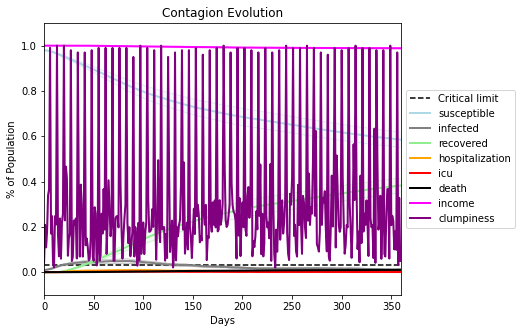

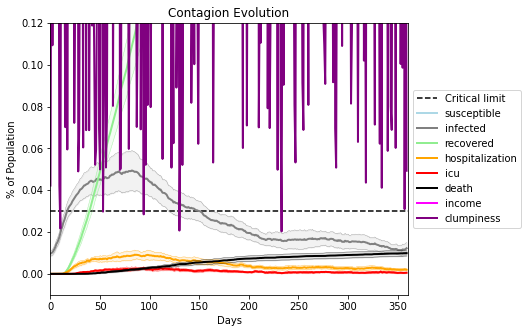

In [7]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 1
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[5445, 715, 624, 4567, 5321, 1112, 1055, 4160, 1066, 1770, 913, 8304, 9981, 6404, 698, 9089, 6648, 6578, 2544, 2863, 7061, 2773, 8377, 2159, 5052, 3731, 2836, 2308, 5653, 8722]
Average similarity between family members is 0.2906173816790505 at temperature 0
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
Average similarity between family and home is 0.9910086920475066 at temperature -1
Average similarity between students and their classroom is 0.3851240344256254 at temperature 0
Average similarity between workers is 0.3108774435411036 at temperature 0
Average friend similarity for adults: 0.3131380725988803 for kids: 0.37183129497524237
run with seed 5445:
avg restaurant similarity 0.12103104523953738
avg restaurant similarity 0.07134813737247982
avg restaurant similarity 0.26002263070078296
avg restaurant similarity 0.08503105563148614
avg restaurant similarity 0.1439259071692392
avg restaurant similarity 0.12737253339188204
avg restaurant sim

avg restaurant similarity 0.15842562079932423
avg restaurant similarity 0.053769246809809323
avg restaurant similarity 0.2281118650649685
avg restaurant similarity 0.09333753324965706
avg restaurant similarity 0.083193252900605
avg restaurant similarity 0.09344067920000147
avg restaurant similarity 0.08550349363704036
avg restaurant similarity 0.019699864691315044
avg restaurant similarity 0.06200166748141733
avg restaurant similarity 0.01937100274158062
avg restaurant similarity 0.06143718708710702
avg restaurant similarity 0.2204068002650655
avg restaurant similarity 0.09374952543086781
avg restaurant similarity 0.11415339485081823
avg restaurant similarity 0.0782552798910059
avg restaurant similarity 0.2513180972352695
avg restaurant similarity 0.17752829360720412
avg restaurant similarity 0.1447994417352453
avg restaurant similarity 0.20326910890358899
avg restaurant similarity 0.15434373628664264
avg restaurant similarity 0.0603375375228394
avg restaurant similarity 0.098047899055

tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset o

avg restaurant similarity 0.12041445461768911
avg restaurant similarity 0.26774733957001184
avg restaurant similarity 0.1408042364854223
avg restaurant similarity 0.2500680437567805
avg restaurant similarity 0.1394933935983442
avg restaurant similarity 0.12335327993042496
avg restaurant similarity 0.14810089664588083
avg restaurant similarity 0.10982508038880064
avg restaurant similarity 0.17753952182218813
avg restaurant similarity 0.16346190564145058
avg restaurant similarity 0.1531700134188494
avg restaurant similarity 0.20622630545715176
avg restaurant similarity 0.14585864429906498
avg restaurant similarity 0.20825979657107788
avg restaurant similarity 0.22140077780315398
avg restaurant similarity 0.11214629594951762
avg restaurant similarity 0.31124730646425497
avg restaurant similarity 0.13061298498347904
avg restaurant similarity 0.20331566047758956
avg restaurant similarity 0.15171441253679657
avg restaurant similarity 0.27723016377079746
avg restaurant similarity 0.3383580195

avg restaurant similarity 0.09096162413176653
avg restaurant similarity 0.21233539880816218
avg restaurant similarity 0.19196867441437732
avg restaurant similarity 0.10610568296598104
avg restaurant similarity 0.1991349104054824
avg restaurant similarity 0.22710403748517602
avg restaurant similarity 0.26443947253944533
avg restaurant similarity 0.1187968680491829
avg restaurant similarity 0.14995131466155542
avg restaurant similarity 0.14652070120708555
avg restaurant similarity 0.10496678867789982
avg restaurant similarity 0.10743902174392607
avg restaurant similarity 0.11169310867888216
avg restaurant similarity 0.18537699762013807
avg restaurant similarity 0.21063356953804413
avg restaurant similarity 0.14436309571587227
avg restaurant similarity 0.17929657768076762
avg restaurant similarity 0.17273032295519555
avg restaurant similarity 0.307299929850484
avg restaurant similarity 0.1356686844399477
avg restaurant similarity 0.18729644920609453
avg restaurant similarity 0.18300303330

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset 

avg restaurant similarity 0.14974478342770095
avg restaurant similarity 0.15286103253266745
avg restaurant similarity 0.08617909729832425
avg restaurant similarity 0.010993299381038534
avg restaurant similarity 0.05636048894821677
avg restaurant similarity 0.08360479876595443
avg restaurant similarity 0.09461504909131914
avg restaurant similarity 0.04159165593806671
avg restaurant similarity 0.052359674215612266
avg restaurant similarity 0.015319020082944307
avg restaurant similarity 0.0035857608471062683
avg restaurant similarity -0.020553160488187464
avg restaurant similarity 0.05632501332922096
avg restaurant similarity 0.0016275252244836427
avg restaurant similarity 0.14483533335479443
avg restaurant similarity 0.09212394259215542
avg restaurant similarity 0.11850052359167651
avg restaurant similarity 0.17362785110925893
avg restaurant similarity 0.04158332449022518
avg restaurant similarity 0.11183281267007811
avg restaurant similarity 0.027737309664375487
avg restaurant similarit

avg restaurant similarity 0.021474943171245008
avg restaurant similarity 0.07549381697276093
avg restaurant similarity 0.04216938706336575
avg restaurant similarity 0.11936772318091438
avg restaurant similarity 0.07230614637830002
avg restaurant similarity 0.13223997644406504
avg restaurant similarity 0.18061927519950724
avg restaurant similarity 0.05662146406501343
avg restaurant similarity 0.13885284527591207
avg restaurant similarity 0.1057196643135731
avg restaurant similarity 0.02965989312936049
avg restaurant similarity -0.03538084938554165
avg restaurant similarity 0.07098199741381442
avg restaurant similarity 0.06989100216056783
avg restaurant similarity 0.05916721949720074
avg restaurant similarity 0.18503011631214605
avg restaurant similarity 0.03964873261560254
avg restaurant similarity 0.12898029126699373
avg restaurant similarity 0.040754168417406166
Average similarity between family members is 0.3423999080603671 at temperature 0
tup_vec1 not in keepset of size 44
tup_vec1

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
Average similarity between family and home is 0.9939143466945154 at temperature -1
Average similarity between students and their classroom is 0.36410654256847014 at temperature 0
Average similarity between workers is 0.34329168061487525 at temperature 0
Average friend similarity for adults: 0.35587522833027685 for kids: 0.38170913441453713
run with seed 4567:
avg restaurant similarity 0.3561597082891576
avg restaurant similarity 0.24723617000168402
avg restaurant similarity 0.24566719901803652
avg restaurant similarity 0.10915156890318832
avg restaurant similarity 0.32136925

avg restaurant similarity 0.28439289400652795
avg restaurant similarity 0.11383117463080498
avg restaurant similarity 0.20179526555419314
avg restaurant similarity 0.22778619641742462
avg restaurant similarity 0.22817185450811417
avg restaurant similarity 0.14667324363020373
avg restaurant similarity 0.38914752030739796
avg restaurant similarity 0.12008556362373263
avg restaurant similarity 0.20340650744342184
avg restaurant similarity 0.14719930178057933
avg restaurant similarity 0.28159011552519014
avg restaurant similarity 0.3362383287035742
avg restaurant similarity 0.17754322351273116
avg restaurant similarity 0.13065885907294172
avg restaurant similarity 0.3484519583449115
avg restaurant similarity 0.22223412954165891
avg restaurant similarity 0.19969705622360728
avg restaurant similarity 0.2744626662807453
avg restaurant similarity 0.14061435503880937
avg restaurant similarity 0.07778907741802406
avg restaurant similarity 0.27309867826532025
avg restaurant similarity 0.388733267

tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of

avg restaurant similarity -0.07090523531443571
avg restaurant similarity 0.18562552769809307
avg restaurant similarity -0.013143962606154271
avg restaurant similarity 0.08933532427684909
avg restaurant similarity 0.13546536581613838
avg restaurant similarity -0.026362725304500966
avg restaurant similarity 0.0861102450058674
avg restaurant similarity -0.11066983279225172
avg restaurant similarity -0.09562182522743035
avg restaurant similarity -0.03575886027342834
avg restaurant similarity 0.3239313013416528
avg restaurant similarity -0.06123601557689451
avg restaurant similarity -0.10384237575128308
avg restaurant similarity -0.03315998507622626
avg restaurant similarity 0.13085161804620674
avg restaurant similarity 0.15536180742368227
avg restaurant similarity -0.03990697853728054
avg restaurant similarity 0.021462905819959223
avg restaurant similarity -0.1454760131265679
avg restaurant similarity 0.006776354695460779
avg restaurant similarity 0.05690603386303053
avg restaurant similar

avg restaurant similarity -0.004904626285069708
avg restaurant similarity 0.13993793544105584
avg restaurant similarity 0.10964388948884224
avg restaurant similarity 0.24960406772215882
avg restaurant similarity 0.08416384925792468
avg restaurant similarity 0.037513559884185546
avg restaurant similarity -0.08048676804532247
avg restaurant similarity 0.1419690844974779
avg restaurant similarity -0.1771443437571599
avg restaurant similarity 0.19676031437822683
avg restaurant similarity 0.03523969839931145
avg restaurant similarity 0.259181365535388
avg restaurant similarity 0.014547421151077218
avg restaurant similarity 0.01837899700229206
avg restaurant similarity 0.031385961888299084
avg restaurant similarity 0.04770095268264512
avg restaurant similarity 0.10012949718386252
avg restaurant similarity -0.016044831645105655
avg restaurant similarity -0.055781050098079564
avg restaurant similarity -0.018975173815653706
avg restaurant similarity 0.03219607250953046
avg restaurant similarity

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 44
tup_vec1 not in keepse

avg restaurant similarity 0.06742082218321935
avg restaurant similarity 0.057867605922898656
avg restaurant similarity -0.0009431054482722345
avg restaurant similarity 0.1093717940000283
avg restaurant similarity 0.019666970603151767
avg restaurant similarity -0.02258283301319676
avg restaurant similarity 0.040797444442762384
avg restaurant similarity 0.0506151677145451
avg restaurant similarity 0.12035580567599397
avg restaurant similarity 0.052703448543408395
avg restaurant similarity 0.02415605207081282
avg restaurant similarity 0.03383854495398095
avg restaurant similarity 0.016426123878414543
avg restaurant similarity 0.050941897544764615
avg restaurant similarity 0.12105351930892261
avg restaurant similarity 0.11214239349830099
avg restaurant similarity 0.018753262716921407
avg restaurant similarity 0.1286295681282242
avg restaurant similarity 0.007439511581273092
avg restaurant similarity 0.13195213591301772
avg restaurant similarity 0.11077361134533283
avg restaurant similarity

avg restaurant similarity 0.05749020813142908
avg restaurant similarity 0.029334369529807135
avg restaurant similarity 0.08379752577673673
avg restaurant similarity 0.11462022410536758
avg restaurant similarity 0.03713992339845173
avg restaurant similarity 0.09189725438191984
avg restaurant similarity 0.0032692459269967884
avg restaurant similarity 0.0007368905175376575
avg restaurant similarity 0.1937719645409804
avg restaurant similarity 0.03574135853859357
avg restaurant similarity 0.018346945958218657
avg restaurant similarity 0.0818839824912807
avg restaurant similarity 0.03128962947903356
avg restaurant similarity 0.02988051837577671
avg restaurant similarity 0.07526831613123874
avg restaurant similarity 0.09118108231482029
avg restaurant similarity 0.005930921662431177
avg restaurant similarity 0.12190813148410372
avg restaurant similarity -0.028498737220177973
avg restaurant similarity 0.07857697529580096
avg restaurant similarity 0.03195602418593338
avg restaurant similarity 0

Average similarity between family and home is 0.9923512083185756 at temperature -1
Average similarity between students and their classroom is 0.2569501667892283 at temperature 0
Average similarity between workers is 0.25071287531673636 at temperature 0
Average friend similarity for adults: 0.27488686119372585 for kids: 0.3183487159879993
run with seed 1055:
avg restaurant similarity 0.004375237740914707
avg restaurant similarity -0.023636198543962365
avg restaurant similarity 0.022630241487211968
avg restaurant similarity 0.2189381548698171
avg restaurant similarity 0.08682694337351099
avg restaurant similarity 0.1414648082198179
avg restaurant similarity 0.07785675839509071
avg restaurant similarity 0.0853304670722691
avg restaurant similarity 0.04440221529782573
avg restaurant similarity 0.09536181980784086
avg restaurant similarity -0.003080172541910767
avg restaurant similarity 0.006328467348161548
avg restaurant similarity 0.07606414881519834
avg restaurant similarity 0.1856663407

avg restaurant similarity 0.06192919643158464
avg restaurant similarity 0.1157265391563086
avg restaurant similarity 0.04812169021508807
avg restaurant similarity 0.27035874332645093
avg restaurant similarity 0.14030293367002583
avg restaurant similarity 0.10063192466085491
avg restaurant similarity 0.12217333427757063
avg restaurant similarity 0.04762896269205541
avg restaurant similarity 0.03485083578258846
avg restaurant similarity 0.09262688554362208
avg restaurant similarity 0.10944955698080194
avg restaurant similarity -0.027208845197712658
avg restaurant similarity 0.3037747151933831
avg restaurant similarity -0.0997972115526119
avg restaurant similarity 0.06194915390935807
avg restaurant similarity 0.1886996991183114
avg restaurant similarity 0.03459685361743858
avg restaurant similarity 0.11950487559395719
avg restaurant similarity 0.05925683952213231
avg restaurant similarity 0.152277790143536
avg restaurant similarity 0.21932577279845675
avg restaurant similarity 0.169186235

tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset o

avg restaurant similarity 0.17195455350905675
avg restaurant similarity 0.12626973241501305
avg restaurant similarity -0.04383778202854185
avg restaurant similarity -0.02818562613592085
avg restaurant similarity 0.0041393758696336965
avg restaurant similarity -0.03171244870883909
avg restaurant similarity 0.1571486483966422
avg restaurant similarity 0.07939590442708859
avg restaurant similarity 0.2160004513966812
avg restaurant similarity 0.07219045472200702
avg restaurant similarity 0.006084116147092118
avg restaurant similarity 0.23381710039924597
avg restaurant similarity 0.03516729937010338
avg restaurant similarity 0.07691792391559946
avg restaurant similarity -0.006473506626992515
avg restaurant similarity 0.1266354877351248
avg restaurant similarity -0.07373108104979428
avg restaurant similarity -0.08013488956541139
avg restaurant similarity 0.03066375713027377
avg restaurant similarity 0.0824633410021246
avg restaurant similarity 0.13045130970932084
avg restaurant similarity 0.

avg restaurant similarity -0.06641397100069926
avg restaurant similarity -0.010691894435138632
avg restaurant similarity 0.09216713882347485
avg restaurant similarity 0.15656173831135858
avg restaurant similarity 0.14836102894005865
avg restaurant similarity -0.026207174384648715
avg restaurant similarity 0.03701216203048613
avg restaurant similarity 0.09938817019554991
avg restaurant similarity 0.10402550399230427
avg restaurant similarity -0.07629036419216731
avg restaurant similarity 0.051438552441221905
avg restaurant similarity 0.11615098519266799
avg restaurant similarity 0.06711218039622736
avg restaurant similarity 0.09034815068500032
avg restaurant similarity 0.11664884777811382
avg restaurant similarity 0.13521628646456912
avg restaurant similarity 0.10393634639359883
avg restaurant similarity 0.16469226380446605
avg restaurant similarity 0.06152446551701618
avg restaurant similarity 0.16896376667881952
avg restaurant similarity 0.03928213760370625
avg restaurant similarity 0

Average similarity between family and home is 0.9919595277780402 at temperature -1
Average similarity between students and their classroom is 0.3862714377096609 at temperature 0
Average similarity between workers is 0.31991049291404 at temperature 0
Average friend similarity for adults: 0.3230261648958908 for kids: 0.35762009592514704
run with seed 1066:
avg restaurant similarity 0.037664218202976364
avg restaurant similarity -0.003233445317079934
avg restaurant similarity 0.08063561198375417
avg restaurant similarity 0.12379168651233353
avg restaurant similarity 0.04573962100769859
avg restaurant similarity 0.06615780970029901
avg restaurant similarity 0.14829846474731018
avg restaurant similarity 0.03432553278355429
avg restaurant similarity -0.004651387004192487
avg restaurant similarity 0.1404008066766905
avg restaurant similarity 0.17063702536145334
avg restaurant similarity 0.048683058698315414
avg restaurant similarity 0.08671518486769456
avg restaurant similarity 0.095723112788

avg restaurant similarity 0.17320964440099088
avg restaurant similarity 0.07334658894710389
avg restaurant similarity 0.10516519672792907
avg restaurant similarity 0.04040256792275877
avg restaurant similarity 0.09873563616102357
avg restaurant similarity 0.033380314909301254
avg restaurant similarity 0.15906141166510632
avg restaurant similarity 0.06866626103770496
avg restaurant similarity 0.0688834307021865
avg restaurant similarity 0.040597671888181995
avg restaurant similarity 0.034610836033910075
avg restaurant similarity -0.1406031297569495
avg restaurant similarity -0.0010815334115194407
avg restaurant similarity 0.0999349626416957
avg restaurant similarity 0.05594816374347805
avg restaurant similarity 0.07868041458484096
avg restaurant similarity 0.075348583035926
avg restaurant similarity 0.12291071126429748
avg restaurant similarity 0.009260521257994992
avg restaurant similarity -0.003092485991592592
avg restaurant similarity -0.015710173771614863
avg restaurant similarity 0

tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset 

avg restaurant similarity 0.09565769807671932
avg restaurant similarity 0.1525937292617473
avg restaurant similarity 0.06304871423687276
avg restaurant similarity 0.10368505673407095
avg restaurant similarity 0.15604242915575448
avg restaurant similarity 0.12587020217467307
avg restaurant similarity -0.029719452176009582
avg restaurant similarity 0.04515199953635152
avg restaurant similarity 0.15595010167309548
avg restaurant similarity -0.051828010771414114
avg restaurant similarity 0.07257508139791737
avg restaurant similarity 0.05209860847423268
avg restaurant similarity -0.07023190130102774
avg restaurant similarity 0.1499220049856078
avg restaurant similarity 0.0700604543922933
avg restaurant similarity 0.07188387153026013
avg restaurant similarity 0.17167296663926732
avg restaurant similarity 0.12813552507370998
avg restaurant similarity 0.20386659182970138
avg restaurant similarity 0.009221368166650638
avg restaurant similarity 0.11129082459149606
avg restaurant similarity 0.158

avg restaurant similarity 0.020553443294920155
avg restaurant similarity 0.010836599483808027
avg restaurant similarity 0.3048372796141055
avg restaurant similarity 0.22474576415104489
avg restaurant similarity -0.12088494150942398
avg restaurant similarity 0.0264527697490474
avg restaurant similarity 0.16937175151141068
avg restaurant similarity 0.07054099777121299
avg restaurant similarity 0.15427476632595136
avg restaurant similarity 0.16520662017543836
avg restaurant similarity 0.0013995163032115097
avg restaurant similarity 0.04067761827438413
avg restaurant similarity 0.01380026253735509
avg restaurant similarity 0.044978344316520036
avg restaurant similarity 0.08473139357844701
avg restaurant similarity 0.09321004443927194
avg restaurant similarity 0.09042735488963759
avg restaurant similarity 0.0028913746285809242
avg restaurant similarity 0.103632901076963
avg restaurant similarity 0.06649928264000117
avg restaurant similarity 0.11950871892452632
avg restaurant similarity -0.0

tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset 

avg restaurant similarity 0.2555493936663687
avg restaurant similarity 0.1882635030386318
avg restaurant similarity 0.20158188274285693
avg restaurant similarity 0.17464238206218738
avg restaurant similarity 0.19101365804440368
avg restaurant similarity 0.26942023277115246
avg restaurant similarity 0.22169742840337534
avg restaurant similarity 0.31780141092301356
avg restaurant similarity 0.17423323577564354
avg restaurant similarity 0.1003782586856989
avg restaurant similarity 0.20786344076506602
avg restaurant similarity 0.13487932720555387
avg restaurant similarity 0.17580931686913004
avg restaurant similarity 0.29458101780701856
avg restaurant similarity 0.14322305923604217
avg restaurant similarity 0.10085946405101391
avg restaurant similarity 0.24386472391099637
avg restaurant similarity 0.1348936004285552
avg restaurant similarity 0.19688021971322328
avg restaurant similarity 0.168230498313894
avg restaurant similarity 0.16499110808239148
avg restaurant similarity 0.255310263270

avg restaurant similarity 0.12691700114049406
avg restaurant similarity 0.25346763435796144
Average similarity between family members is 0.3550585493715855 at temperature 0
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of

Average similarity between students and their classroom is 0.39942485615528117 at temperature 0
Average similarity between workers is 0.3047596886761341 at temperature 0
Average friend similarity for adults: 0.3212948386045474 for kids: 0.3793726014370612
run with seed 8304:
avg restaurant similarity 0.08147736061801349
avg restaurant similarity 0.06334710174472163
avg restaurant similarity -0.013709359548408321
avg restaurant similarity 0.05704754234890333
avg restaurant similarity 0.03156524445015691
avg restaurant similarity -0.005873256477150949
avg restaurant similarity -0.10450933806488477
avg restaurant similarity 0.01700846498144679
avg restaurant similarity 0.16801096527972573
avg restaurant similarity 0.15012004248790944
avg restaurant similarity 0.0697108848110894
avg restaurant similarity 0.008194613444235069
avg restaurant similarity 0.09471454123282579
avg restaurant similarity 0.05787218124729981
avg restaurant similarity 0.14070346043301524
avg restaurant similarity 0.0

avg restaurant similarity -0.002686040766149933
avg restaurant similarity 0.05621584605674067
avg restaurant similarity 0.029539033633442808
avg restaurant similarity 0.08789769381665609
avg restaurant similarity 0.06279269372796994
avg restaurant similarity 0.011475710442816343
avg restaurant similarity -0.027428803080171104
avg restaurant similarity 0.043370695032774
avg restaurant similarity 0.10942807831848171
avg restaurant similarity 0.05406717789193621
avg restaurant similarity 0.08281258348531381
avg restaurant similarity 0.035351355535352506
avg restaurant similarity 0.14464899309723878
avg restaurant similarity 0.1143403132178756
avg restaurant similarity 0.08749069719802834
avg restaurant similarity 0.07818798168196203
avg restaurant similarity 0.17065635071938767
avg restaurant similarity 0.13177853353577862
avg restaurant similarity -0.048288271419025024
avg restaurant similarity 0.007612227590137199
avg restaurant similarity 0.11808999903225396
avg restaurant similarity -

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of

avg restaurant similarity 0.11574547229781608
avg restaurant similarity 0.25473624032572656
avg restaurant similarity 0.2953699917721054
avg restaurant similarity 0.10076495293938018
avg restaurant similarity 0.14519380146078462
avg restaurant similarity 0.22509410167493243
avg restaurant similarity 0.1811982317133812
avg restaurant similarity 0.14375957427314975
avg restaurant similarity 0.1922512673986915
avg restaurant similarity 0.22197354279856665
avg restaurant similarity 0.08045121525737163
avg restaurant similarity 0.1920942332451422
avg restaurant similarity 0.2508427196196432
avg restaurant similarity 0.16350728415003632
avg restaurant similarity 0.1334048724254282
avg restaurant similarity 0.17251693242697702
avg restaurant similarity 0.16252028603944485
avg restaurant similarity 0.14215996668768227
avg restaurant similarity 0.11627670819981255
avg restaurant similarity 0.20554637593796218
avg restaurant similarity 0.06364050167798707
avg restaurant similarity 0.240049614294

avg restaurant similarity 0.16697871546114795
avg restaurant similarity 0.23541923476649804
avg restaurant similarity 0.211884319381055
avg restaurant similarity 0.2550018812953584
avg restaurant similarity 0.049960905361059994
avg restaurant similarity 0.2312001609752439
avg restaurant similarity 0.25145626424810996
avg restaurant similarity 0.18267236252927585
avg restaurant similarity 0.08040652996834743
avg restaurant similarity 0.18307628665259473
avg restaurant similarity 0.17400157892037785
avg restaurant similarity 0.2066843384391149
avg restaurant similarity 0.13378697565672537
avg restaurant similarity 0.13894399943438338
avg restaurant similarity 0.1658698772897268
avg restaurant similarity 0.241873907150276
avg restaurant similarity 0.08495919289300953
avg restaurant similarity 0.10328923532098475
avg restaurant similarity 0.1820295222842139
avg restaurant similarity 0.21735477405800172
avg restaurant similarity 0.33545218665541476
avg restaurant similarity 0.11755863066476

tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset

avg restaurant similarity 0.019494805700833645
avg restaurant similarity 0.038407821007279845
avg restaurant similarity 0.08438767102124636
avg restaurant similarity -0.14886715033717332
avg restaurant similarity 0.057523455247954124
avg restaurant similarity -0.0664989012494936
avg restaurant similarity -0.05890386578341266
avg restaurant similarity -0.11645311536892458
avg restaurant similarity 0.020237827811459497
avg restaurant similarity 0.001426174348639157
avg restaurant similarity -0.0006347900340694934
avg restaurant similarity -0.03673778080610611
avg restaurant similarity 0.08245111615232832
avg restaurant similarity 0.041519882371444425
avg restaurant similarity -0.03707316733385222
avg restaurant similarity 0.06686446082440173
avg restaurant similarity 0.01655764682886455
avg restaurant similarity 0.026794789049892333
avg restaurant similarity 0.14874734920021124
avg restaurant similarity -0.04104459772157189
avg restaurant similarity 0.05793754521741707
avg restaurant sim

avg restaurant similarity 0.07527328829966366
avg restaurant similarity 0.07442940285126576
avg restaurant similarity 0.13441207571112662
avg restaurant similarity 0.0047943618209609915
avg restaurant similarity -0.019660071252090232
avg restaurant similarity 0.00594733879165232
avg restaurant similarity 0.020410868551833345
avg restaurant similarity 0.05586693515777104
avg restaurant similarity -0.0176922156760291
avg restaurant similarity -0.029963370376855102
avg restaurant similarity 0.006561668617063671
avg restaurant similarity 0.06116803787504737
avg restaurant similarity 0.03689321624365737
avg restaurant similarity -0.028141204879574774
avg restaurant similarity 0.12479516462202338
avg restaurant similarity 0.06840365863372731
avg restaurant similarity 0.07548795793835862
avg restaurant similarity 0.18118825849042317
avg restaurant similarity 0.05696518662659201
avg restaurant similarity 0.06645520008072853
avg restaurant similarity -0.019600389288682855
avg restaurant similar

tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset o

avg restaurant similarity 0.1376075874944572
avg restaurant similarity -0.018667829476697886
avg restaurant similarity 0.012689085848597653
avg restaurant similarity -0.022426717688074315
avg restaurant similarity -0.04038534957503931
avg restaurant similarity 0.13203244099934053
avg restaurant similarity 0.008133950450370065
avg restaurant similarity 0.10120095073072184
avg restaurant similarity 0.016817354432868734
avg restaurant similarity -0.02294118312376004
avg restaurant similarity 0.1677615809739961
avg restaurant similarity -0.027032086377759418
avg restaurant similarity 0.05944770192816167
avg restaurant similarity 0.1239347570759404
avg restaurant similarity 0.07493143158761915
avg restaurant similarity 0.028748018088495364
avg restaurant similarity 0.09203861027734823
avg restaurant similarity 0.04669330365683098
avg restaurant similarity 0.1103989567900944
avg restaurant similarity 0.048271324381963916
avg restaurant similarity 0.08292465914190753
avg restaurant similarity

tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of 

avg restaurant similarity 0.1444316260788048
avg restaurant similarity 0.12119440317978539
avg restaurant similarity 0.05229247394237588
avg restaurant similarity -0.09285074280868881
avg restaurant similarity -0.010173190243971522
avg restaurant similarity 0.2507904914187772
avg restaurant similarity 0.041278622230134815
avg restaurant similarity 0.13049711096225983
avg restaurant similarity 0.08185680207648639
avg restaurant similarity 0.06335523039393919
avg restaurant similarity 0.18525355079575997
avg restaurant similarity 0.1431233028089917
avg restaurant similarity 0.2223222002609564
avg restaurant similarity 0.22427300343774742
avg restaurant similarity 0.07818724281036941
avg restaurant similarity 0.02308040907011102
avg restaurant similarity 0.16259546129659802
avg restaurant similarity 0.2965053107876749
avg restaurant similarity 0.14970810811670918
avg restaurant similarity 0.10726802216540458
avg restaurant similarity 0.10853402900889694
avg restaurant similarity 0.1358113

avg restaurant similarity 0.20948642395772862
avg restaurant similarity 0.13414376576621476
avg restaurant similarity 0.22401386014250416
avg restaurant similarity 0.11357574781292708
avg restaurant similarity 0.1507194243932498
avg restaurant similarity 0.13822748613611402
avg restaurant similarity 0.04311927817228939
avg restaurant similarity 0.14896856073787018
avg restaurant similarity 0.11472030340541813
avg restaurant similarity 0.19791149852894582
avg restaurant similarity 0.21931033420473472
avg restaurant similarity 0.06883347539194955
avg restaurant similarity 0.15677307890421668
avg restaurant similarity 0.1597630955346864
avg restaurant similarity 0.1728954564110119
avg restaurant similarity 0.38911875304335497
avg restaurant similarity 0.07109513852639349
avg restaurant similarity 0.08642418589267174
avg restaurant similarity 0.1412327940714406
avg restaurant similarity 0.1303559570426354
avg restaurant similarity 0.07454116170480508
avg restaurant similarity 0.06580049543

tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of

avg restaurant similarity 0.16706857215802098
avg restaurant similarity 0.10866131902365544
avg restaurant similarity 0.09351534789553317
avg restaurant similarity 0.16774554110011425
avg restaurant similarity 0.18967703678018005
avg restaurant similarity 0.11107593358571774
avg restaurant similarity -0.03379460843503882
avg restaurant similarity 0.12570965063081072
avg restaurant similarity 0.2207177748012821
avg restaurant similarity 0.1979064109842727
avg restaurant similarity 0.03326696972874515
avg restaurant similarity 0.004210676123987995
avg restaurant similarity -0.020518610018297762
avg restaurant similarity 0.08226467717830302
avg restaurant similarity 0.17287734906373667
avg restaurant similarity 0.08350440305047052
avg restaurant similarity 0.19037718048234165
avg restaurant similarity 0.15799364888026837
avg restaurant similarity 0.05797001457029003
avg restaurant similarity 0.2733208189168262
avg restaurant similarity -0.04092465744230275
avg restaurant similarity 0.1310

avg restaurant similarity 0.1736018724886622
avg restaurant similarity 0.07696677221159108
avg restaurant similarity 0.16400103659811774
avg restaurant similarity 0.1279867921317414
avg restaurant similarity -0.007307066496236636
avg restaurant similarity 0.2158505461021582
avg restaurant similarity 0.3018767069690619
avg restaurant similarity 0.0765837749835496
avg restaurant similarity 0.1345497965887463
avg restaurant similarity 0.1531075417894862
avg restaurant similarity 0.2054405882869374
avg restaurant similarity -0.017336077664392633
avg restaurant similarity 0.08473958423021148
avg restaurant similarity 0.12156038540610403
avg restaurant similarity 0.07831904084352172
avg restaurant similarity 0.1592064001038958
avg restaurant similarity 0.1142660490792249
avg restaurant similarity 0.14227770760674474
avg restaurant similarity 0.10173265173987528
avg restaurant similarity 0.2341610773455369
avg restaurant similarity 0.06873519587884633
avg restaurant similarity 0.0521753749122

tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 42
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of

avg restaurant similarity 0.11315037807568537
avg restaurant similarity 0.13838334455154916
avg restaurant similarity 0.13830531944141347
avg restaurant similarity 0.1216599658529592
avg restaurant similarity 0.21665316507037635
avg restaurant similarity 0.08268076190680511
avg restaurant similarity 0.06233737058561797
avg restaurant similarity 0.18490472910642825
avg restaurant similarity 0.13317869277924543
avg restaurant similarity 0.18510459547574212
avg restaurant similarity 0.16422911875084942
avg restaurant similarity -0.021697435101539538
avg restaurant similarity 0.07832263712016523
avg restaurant similarity 0.22765924155733477
avg restaurant similarity 0.07814324703875729
avg restaurant similarity 0.14509955208726835
avg restaurant similarity -0.0075574285140733635
avg restaurant similarity 0.10278673928454489
avg restaurant similarity 0.15192858076920276
avg restaurant similarity 0.13283974177645783
avg restaurant similarity 0.027044047769722426
avg restaurant similarity -0.

avg restaurant similarity 0.3200722073622131
avg restaurant similarity 0.04927859691789304
avg restaurant similarity 0.11622352819453904
avg restaurant similarity 0.10401302458921637
avg restaurant similarity 0.08849570538767075
avg restaurant similarity 0.08111139175702826
avg restaurant similarity 0.053032951293310364
avg restaurant similarity 0.19470409638298397
avg restaurant similarity 0.0868985664113842
avg restaurant similarity 0.22172891375062362
avg restaurant similarity 0.23794271287349356
avg restaurant similarity 0.07066652778757927
avg restaurant similarity 0.11296436313742383
avg restaurant similarity 0.20971583833338203
avg restaurant similarity 0.21519026416023365
avg restaurant similarity 0.0970765414790962
avg restaurant similarity 0.12304418201477793
avg restaurant similarity 0.29628904602388534
avg restaurant similarity 0.09013842278051512
avg restaurant similarity 0.11985016094479835
avg restaurant similarity 0.07789321458121226
avg restaurant similarity 0.15367309

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
Average similarity between family and home is 0.992140927385191 at temperature -1
Average similarity between students and their classroom is 0.3159741167580594 at te

avg restaurant similarity 0.2586334821937836
avg restaurant similarity 0.08119138633401912
avg restaurant similarity 0.013034249086667343
avg restaurant similarity 0.24463097618980736
avg restaurant similarity 0.10821629479710168
avg restaurant similarity 0.0022174295051444063
avg restaurant similarity 0.12119506059929215
avg restaurant similarity 0.09730038514205547
avg restaurant similarity -0.22482692579449085
avg restaurant similarity 0.03402323934514991
avg restaurant similarity -0.21890820802136673
avg restaurant similarity 0.11859141032947958
avg restaurant similarity 0.154105641133514
avg restaurant similarity 0.041159032411028765
avg restaurant similarity -0.057933463288904655
avg restaurant similarity 0.34130389932786864
avg restaurant similarity 0.08952842385229734
avg restaurant similarity 0.11860520908093886
avg restaurant similarity 0.10968671697543582
avg restaurant similarity 0.3034180419098642
avg restaurant similarity -0.07174625853489743
avg restaurant similarity 0.0

tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of 

avg restaurant similarity -0.013734443866553772
avg restaurant similarity -0.03624583147875512
avg restaurant similarity 0.09946035223153632
avg restaurant similarity 0.06760187876510652
avg restaurant similarity 0.11756150897424003
avg restaurant similarity 0.11651772814404562
avg restaurant similarity 0.18439786726399962
avg restaurant similarity 0.11508249547410856
avg restaurant similarity 0.16911605801715124
avg restaurant similarity 0.12358744694032238
avg restaurant similarity 0.08685764021338255
avg restaurant similarity 0.01587333952918492
avg restaurant similarity 0.18508303437409093
avg restaurant similarity -0.01793922006259092
avg restaurant similarity 0.19107358551283196
avg restaurant similarity 0.09910313642468371
avg restaurant similarity -0.013208824501927148
avg restaurant similarity 0.13825568764692733
avg restaurant similarity -0.021425352083644694
avg restaurant similarity 0.06215316114448933
avg restaurant similarity 0.1155697086275269
avg restaurant similarity 0

avg restaurant similarity 0.1167134645010837
avg restaurant similarity 0.13744739419119228
avg restaurant similarity 0.19142656887643789
avg restaurant similarity 0.10033800657479816
avg restaurant similarity 0.18080375998623996
avg restaurant similarity 0.03519715839205506
avg restaurant similarity 0.13379024094684844
avg restaurant similarity -0.01735762211323175
avg restaurant similarity -0.0024117976367729714
avg restaurant similarity 0.11326477625251652
avg restaurant similarity 0.05991839192774997
avg restaurant similarity 0.1357591365100321
avg restaurant similarity 0.08762651915224191
avg restaurant similarity 0.04637715472634482
avg restaurant similarity 0.024094481279088743
avg restaurant similarity 0.07513180795546182
avg restaurant similarity 0.030364675317018166
avg restaurant similarity 0.03092391764608703
avg restaurant similarity 0.19817910286700402
avg restaurant similarity 0.12240995835738086
avg restaurant similarity 0.17068636332605977
avg restaurant similarity -0.0

tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of

avg restaurant similarity 0.04966656624536961
avg restaurant similarity 0.004659547947428755
avg restaurant similarity 0.06253136149961283
avg restaurant similarity -0.008644475026299704
avg restaurant similarity 0.0062392511279862695
avg restaurant similarity 0.18228285639530883
avg restaurant similarity 0.04653069574230473
avg restaurant similarity 0.06651519446006401
avg restaurant similarity 0.12117828135618643
avg restaurant similarity 0.10035796017001462
avg restaurant similarity 0.06648505215065639
avg restaurant similarity -0.02645619869887214
avg restaurant similarity 0.13508042298083658
avg restaurant similarity 0.19348802941910404
avg restaurant similarity 0.11412853036391872
avg restaurant similarity 0.12364765256925024
avg restaurant similarity 0.06816598333748976
avg restaurant similarity 0.0159680305945142
avg restaurant similarity 0.13937696570123034
avg restaurant similarity 0.15407696076102412
avg restaurant similarity 0.005607456056207364
avg restaurant similarity 0.

avg restaurant similarity 0.04358405086850709
avg restaurant similarity 0.028306494754369405
avg restaurant similarity 0.15752312619676745
avg restaurant similarity 0.0923319064629003
avg restaurant similarity -0.05844028588887626
avg restaurant similarity 0.03874998595297967
avg restaurant similarity -0.0003767862603625102
avg restaurant similarity 0.2061974766324988
avg restaurant similarity 0.10648082178973617
avg restaurant similarity 0.08118716455034006
avg restaurant similarity 0.08775831640705821
avg restaurant similarity -0.004293526238755204
avg restaurant similarity 0.07861119932918872
avg restaurant similarity 0.15991460470788865
avg restaurant similarity 0.06634555734653126
avg restaurant similarity 0.15265453566443263
avg restaurant similarity 0.18265938741386759
avg restaurant similarity 0.18803806196041933
avg restaurant similarity 0.02655276389303138
avg restaurant similarity 0.09807715685514364
avg restaurant similarity 0.10714550142036679
avg restaurant similarity 0.0

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset o

avg restaurant similarity 0.15664851431739849
avg restaurant similarity 0.05407254152101763
avg restaurant similarity 0.06378521068364566
avg restaurant similarity 0.0924751719428933
avg restaurant similarity 0.015566223440096569
avg restaurant similarity -0.003768563585520655
avg restaurant similarity 0.22102294057359353
avg restaurant similarity 0.15887432799687035
avg restaurant similarity 0.09254121650355492
avg restaurant similarity 0.06710797063694061
avg restaurant similarity 0.05025350079840657
avg restaurant similarity 0.11074222285497255
avg restaurant similarity 0.16399350302032642
avg restaurant similarity 0.06868264837520738
avg restaurant similarity 0.17048325253155788
avg restaurant similarity 0.03858507857962977
avg restaurant similarity 0.10749607474078457
avg restaurant similarity 0.13272449857408275
avg restaurant similarity 0.14467081405935012
avg restaurant similarity 0.2697858043984108
avg restaurant similarity 0.17103744689590458
avg restaurant similarity 0.09716

tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of

avg restaurant similarity 0.1821971857393729
avg restaurant similarity 0.15692989282121178
avg restaurant similarity 0.16501650365006665
avg restaurant similarity 0.046603458037159096
avg restaurant similarity 0.1727004780724422
avg restaurant similarity 0.09455249730950341
avg restaurant similarity 0.1409518851412979
avg restaurant similarity 0.05915562874435161
avg restaurant similarity 0.1939137735890966
avg restaurant similarity 0.14011169779239752
avg restaurant similarity 0.19457305900233512
avg restaurant similarity 0.2491143670959872
avg restaurant similarity 0.1671857300516031
avg restaurant similarity 0.15478030429381384
avg restaurant similarity 0.17136968593436822
avg restaurant similarity 0.13565214586870303
avg restaurant similarity 0.20721758453722944
avg restaurant similarity 0.11906592117218343
avg restaurant similarity 0.11297824806670449
avg restaurant similarity 0.1587478193382522
avg restaurant similarity 0.10038774442966171
avg restaurant similarity 0.238676994962

avg restaurant similarity 0.21627498553752814
avg restaurant similarity 0.15806990081853559
avg restaurant similarity 0.21254308272210964
avg restaurant similarity 0.1294666100843629
avg restaurant similarity 0.1964487807718362
avg restaurant similarity 0.08720395927642569
avg restaurant similarity 0.16356244378711607
avg restaurant similarity 0.12924367283428326
avg restaurant similarity 0.1376841146385668
avg restaurant similarity 0.1592901291293497
avg restaurant similarity 0.14682291256789468
avg restaurant similarity 0.11368963153856433
avg restaurant similarity 0.11367945570139207
avg restaurant similarity 0.14572691582168407
avg restaurant similarity 0.1726579402275548
avg restaurant similarity 0.1562468790313308
avg restaurant similarity 0.12435273797181483
avg restaurant similarity 0.051833120565475434
avg restaurant similarity 0.2637965608782893
avg restaurant similarity 0.14516849153367545
avg restaurant similarity 0.1352531236036822
avg restaurant similarity 0.1851305531214

tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of

avg restaurant similarity 0.1925692694838845
avg restaurant similarity 0.24822561675760318
avg restaurant similarity 0.2738501455694952
avg restaurant similarity 0.23213796616235058
avg restaurant similarity 0.20123402544878569
avg restaurant similarity 0.19947514521607965
avg restaurant similarity 0.2775075504350635
avg restaurant similarity 0.24133724515519459
avg restaurant similarity 0.29653947003799647
avg restaurant similarity 0.10823422694414532
avg restaurant similarity 0.23695208954361602
avg restaurant similarity 0.17157135603297202
avg restaurant similarity 0.24879553282254438
avg restaurant similarity 0.1940492399305361
avg restaurant similarity 0.15287896950692278
avg restaurant similarity 0.2625138285452569
avg restaurant similarity 0.26294783057377913
avg restaurant similarity 0.30241919870251766
avg restaurant similarity 0.18913648988538462
avg restaurant similarity 0.30140488868335696
avg restaurant similarity 0.2458590098234617
avg restaurant similarity 0.171275604431

avg restaurant similarity 0.18721864587241188
avg restaurant similarity 0.2403569130575197
avg restaurant similarity 0.30827142363650634
avg restaurant similarity 0.2702954531251788
avg restaurant similarity 0.15787537397591933
avg restaurant similarity 0.1993255180740887
avg restaurant similarity 0.23371616434192027
avg restaurant similarity 0.28815685236393634
avg restaurant similarity 0.24931960943623968
avg restaurant similarity 0.2520448489595434
avg restaurant similarity 0.31592520653021916
avg restaurant similarity 0.23712031825439273
avg restaurant similarity 0.18656106746255238
avg restaurant similarity 0.16677011707910838
avg restaurant similarity 0.17806117723905676
avg restaurant similarity 0.31727571447277525
avg restaurant similarity 0.21376824112937565
avg restaurant similarity 0.18943359796795567
avg restaurant similarity 0.17924284438776927
avg restaurant similarity 0.24387300262046627
avg restaurant similarity 0.19770588688461435
avg restaurant similarity 0.1401569962

tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of

avg restaurant similarity 0.08665824458745615
avg restaurant similarity -0.04503726426391176
avg restaurant similarity 0.07462438385829227
avg restaurant similarity 0.08222091529333413
avg restaurant similarity -0.004064208935194988
avg restaurant similarity -0.03542565716507369
avg restaurant similarity 0.10348309163998945
avg restaurant similarity 0.08060307614116123
avg restaurant similarity 0.1063460721400401
avg restaurant similarity -0.052258706750350076
avg restaurant similarity 0.12404030623562713
avg restaurant similarity 0.10655604345230571
avg restaurant similarity -0.07339370625507317
avg restaurant similarity 0.08936861304701586
avg restaurant similarity 0.0724241863530114
avg restaurant similarity 0.027213345143887922
avg restaurant similarity 0.013641736908947365
avg restaurant similarity 0.1178580476375483
avg restaurant similarity -0.05658541969776033
avg restaurant similarity -0.07761117800335687
avg restaurant similarity 0.11774872464022279
avg restaurant similarity 

tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of 

avg restaurant similarity 0.0663707516710279
avg restaurant similarity 0.06338213301253472
avg restaurant similarity 0.06494573549026082
avg restaurant similarity 0.0382062449053426
avg restaurant similarity 0.0685625070765746
avg restaurant similarity 0.03557179453404529
avg restaurant similarity 0.04923792728201842
avg restaurant similarity 0.09276918655279998
avg restaurant similarity 0.0926504958981687
avg restaurant similarity 0.02758723218865756
avg restaurant similarity 0.06670706775756724
avg restaurant similarity 0.06235189127488789
avg restaurant similarity -0.004542324715455176
avg restaurant similarity 0.0822999816342355
avg restaurant similarity 0.1120081359294103
avg restaurant similarity 0.08825532639525624
avg restaurant similarity 0.1435821410080444
avg restaurant similarity 0.11555129132628636
avg restaurant similarity 0.044169168339966355
avg restaurant similarity 0.0918447298432265
avg restaurant similarity 0.09096038083704079
avg restaurant similarity 0.01533833075

avg restaurant similarity 0.15371666153659852
avg restaurant similarity 0.12761515855029432
avg restaurant similarity 0.16461213735345492
avg restaurant similarity 0.048490432323445964
avg restaurant similarity 0.0318004451178294
avg restaurant similarity 0.13758671880964657
avg restaurant similarity 0.06345494228993173
avg restaurant similarity 0.07065113434835711
avg restaurant similarity 0.08533505483899284
avg restaurant similarity 0.12057926208550163
avg restaurant similarity 0.07355979328637176
avg restaurant similarity 0.13643845825012904
avg restaurant similarity 0.02933980352437684
avg restaurant similarity 0.1021235043981729
avg restaurant similarity 0.0209228356043258
avg restaurant similarity 0.013370390433437735
avg restaurant similarity 0.04788915894457121
avg restaurant similarity 0.11471793748721013
avg restaurant similarity 0.08809503562679374
avg restaurant similarity 0.017952793084500564
avg restaurant similarity -0.022069481598033222
avg restaurant similarity 0.0993

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of

avg restaurant similarity 0.11358716079564335
avg restaurant similarity 0.10563404850817847
avg restaurant similarity 0.17261042339890373
avg restaurant similarity 0.14065163673862202
avg restaurant similarity 0.04033604440047609
avg restaurant similarity 0.039835624378029004
avg restaurant similarity 0.10749865234924527
avg restaurant similarity 0.08826938148499741
avg restaurant similarity 0.09818751905626542
avg restaurant similarity 0.14048764761416746
avg restaurant similarity 0.06555152239527848
avg restaurant similarity 0.09495149240969174
avg restaurant similarity 0.15789487863437232
avg restaurant similarity 0.04828922947585261
avg restaurant similarity 0.16773174859213855
avg restaurant similarity 0.09371707277540038
avg restaurant similarity 0.03961759648166557
avg restaurant similarity 0.14872924037587607
avg restaurant similarity 0.1085225697133286
avg restaurant similarity -0.04505575632595943
avg restaurant similarity 0.18704938180209374
avg restaurant similarity 0.15714

avg restaurant similarity 0.07660078964185447
avg restaurant similarity 0.05769716825669852
avg restaurant similarity 0.040978735885168864
avg restaurant similarity 0.012145008707048786
avg restaurant similarity 0.20500380121251058
avg restaurant similarity 0.1395935767690864
avg restaurant similarity 0.07289804630734621
avg restaurant similarity 0.08627603653690216
avg restaurant similarity 0.09855508110329164
avg restaurant similarity 0.14939539706601213
avg restaurant similarity 0.12718894718088694
avg restaurant similarity 0.07761090650772473
avg restaurant similarity 0.18230532674866207
avg restaurant similarity 0.15644451560661296
avg restaurant similarity 0.14226671086366227
avg restaurant similarity 0.15170043223763235
avg restaurant similarity 0.0172335054179908
avg restaurant similarity 0.024134523179282035
avg restaurant similarity 0.06651130125795879
avg restaurant similarity 0.15177260657209563
avg restaurant similarity 0.03179880795872355
avg restaurant similarity -0.0135

tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of 

avg restaurant similarity 0.14352807843606025
avg restaurant similarity 0.0951940409865796
avg restaurant similarity 0.1586931204325147
avg restaurant similarity 0.11468687163263819
avg restaurant similarity 0.18929414577796236
avg restaurant similarity 0.06671059902385591
avg restaurant similarity 0.11502577247438574
avg restaurant similarity 0.20121573609469237
avg restaurant similarity 0.09959566679702239
avg restaurant similarity 0.1370322634703423
avg restaurant similarity 0.07022209032818996
avg restaurant similarity 0.1157858651339982
avg restaurant similarity 0.20419875163685433
avg restaurant similarity 0.1630222827619949
avg restaurant similarity 0.059165189340472546
avg restaurant similarity 0.09493589368489175
avg restaurant similarity 0.09470154727821142
avg restaurant similarity 0.1586137283498754
avg restaurant similarity 0.10891835998239785
avg restaurant similarity 0.1752033739174701
avg restaurant similarity 0.10689126140366027
avg restaurant similarity 0.170654363892

tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset o

avg restaurant similarity 0.04095114754680101
avg restaurant similarity 0.07252833636902603
avg restaurant similarity 0.14718771145023107
avg restaurant similarity 0.03544446136021757
avg restaurant similarity 0.02126643879177851
avg restaurant similarity 0.16755314000774635
avg restaurant similarity 0.06806628540458305
avg restaurant similarity -0.021984109010532618
avg restaurant similarity -0.014098848229223188
avg restaurant similarity 0.042160140333346564
avg restaurant similarity 0.024881629828623367
avg restaurant similarity 0.13071259021659573
avg restaurant similarity -0.02557931344972218
avg restaurant similarity 0.04182441149719806
avg restaurant similarity -0.02783151168445322
avg restaurant similarity 0.13615798057104883
avg restaurant similarity -0.0018702554312205306
avg restaurant similarity 0.027038289563223655
avg restaurant similarity 0.00368059989498836
avg restaurant similarity 0.09157152468859833
avg restaurant similarity 0.19228544551319524
avg restaurant similar

avg restaurant similarity 0.11028148912164418
avg restaurant similarity 0.028818304641089056
avg restaurant similarity -0.022638463653773935
avg restaurant similarity -0.06281390414960812
avg restaurant similarity -0.004408938169692356
avg restaurant similarity 0.09263173035343364
avg restaurant similarity 0.07844568906653643
avg restaurant similarity 0.19977268188116465
avg restaurant similarity 0.11945799492403508
avg restaurant similarity 0.06465880234403693
avg restaurant similarity 0.06607876133847626
avg restaurant similarity 0.036219103801965614
avg restaurant similarity 0.006768758005078315
avg restaurant similarity 0.029207024246046077
avg restaurant similarity 0.049449309772513626
avg restaurant similarity -0.05717899386276231
avg restaurant similarity 0.09806909630683065
avg restaurant similarity 0.07092845430941969
avg restaurant similarity 0.10114355781403594
avg restaurant similarity 0.024010334419856973
avg restaurant similarity 0.07624921430086662
avg restaurant similar

tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset o

avg restaurant similarity 0.22907885041973636
avg restaurant similarity 0.24288601852071542
avg restaurant similarity 0.2662013716881513
avg restaurant similarity 0.2880150471351522
avg restaurant similarity 0.22549831605307777
avg restaurant similarity 0.14304137307676776
avg restaurant similarity 0.1286848847830531
avg restaurant similarity 0.1381684755261532
avg restaurant similarity 0.11477977275723387
avg restaurant similarity 0.16047891288378346
avg restaurant similarity 0.14214258459767
avg restaurant similarity 0.2107392698483706
avg restaurant similarity 0.2092148564697427
avg restaurant similarity 0.33261245486059193
avg restaurant similarity 0.2162262622359202
avg restaurant similarity 0.27242167829106406
avg restaurant similarity 0.20333598764667865
avg restaurant similarity 0.17512877602390073
avg restaurant similarity 0.27219008073897993
avg restaurant similarity 0.19710860987823256
avg restaurant similarity 0.2433053239226217
avg restaurant similarity 0.2221937786831292


avg restaurant similarity 0.278242718425512
avg restaurant similarity 0.15393311678333893
avg restaurant similarity 0.22961464358030048
avg restaurant similarity 0.22649983403790847
avg restaurant similarity 0.18641791389724016
avg restaurant similarity 0.1081246891344347
avg restaurant similarity 0.21137317699585503
avg restaurant similarity 0.20651368586765093
avg restaurant similarity 0.205936276534861
avg restaurant similarity 0.23682961883248888
avg restaurant similarity 0.23614547276179848
avg restaurant similarity 0.2819126135665629
avg restaurant similarity 0.21523587028059998
avg restaurant similarity 0.14848061372955526
avg restaurant similarity 0.16105757353782782
avg restaurant similarity 0.2129339672192094
avg restaurant similarity 0.1952545316138482
avg restaurant similarity 0.24598765901613343
avg restaurant similarity 0.2699707119303637
avg restaurant similarity 0.1831819407266921
avg restaurant similarity 0.19342452020448625
avg restaurant similarity 0.1920462274301772

(<function dict.items>, <function dict.items>, <function dict.items>)

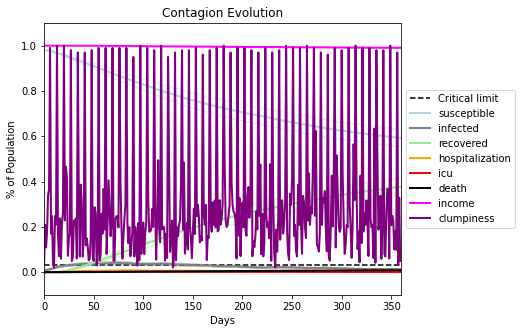

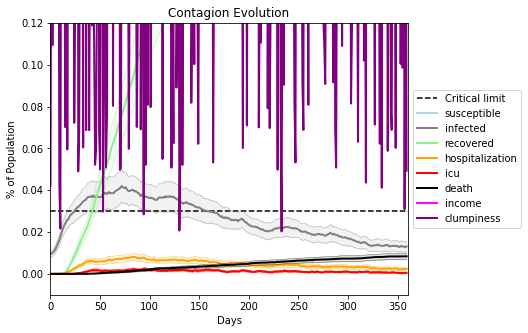

In [8]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = 0
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)

Save these seeds if you want to rerun a scenario
[3214, 5788, 8166, 1254, 183, 9241, 4939, 5450, 800, 8826, 6252, 3690, 4253, 8720, 8400, 6224, 8816, 3217, 3843, 9034, 6187, 1795, 3794, 9398, 87, 7756, 8171, 410, 1048, 5385]
Average similarity between family members is 0.7119952186431183 at temperature -0.9
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of si

Average similarity between family and home is 0.9920620023559004 at temperature -1
Average similarity between students and their classroom is 0.5047704689816644 at temperature -0.9
Average similarity between workers is 0.5171183251358424 at temperature -0.9
Average friend similarity for adults: 0.729184121269963 for kids: 0.6080714293524886
run with seed 3214:
avg restaurant similarity 0.0963256184729595
avg restaurant similarity 0.10687838247335694
avg restaurant similarity 0.29966520662007473
avg restaurant similarity 0.5077881563127442
avg restaurant similarity 0.39604348319988675
avg restaurant similarity 0.24396809169601968
avg restaurant similarity 0.2488612167462343
avg restaurant similarity 0.2971642231406511
avg restaurant similarity 0.12298262802251511
avg restaurant similarity 0.042575475811976606
avg restaurant similarity 0.387070492240796
avg restaurant similarity 0.21610627829805074
avg restaurant similarity 0.4131260782925307
avg restaurant similarity 0.03280812502480188

avg restaurant similarity 0.30514495613859266
avg restaurant similarity 0.15279184143952748
avg restaurant similarity 0.1849830008302183
avg restaurant similarity 0.21698860218675484
avg restaurant similarity 0.20225646773440437
avg restaurant similarity 0.22443476211396388
avg restaurant similarity 0.30132827159187764
avg restaurant similarity 0.24498819444473577
avg restaurant similarity 0.31766332627480215
avg restaurant similarity 0.06685177722880872
avg restaurant similarity 0.2594377806494641
avg restaurant similarity 0.07616447736667477
avg restaurant similarity 0.1754029220707908
avg restaurant similarity 0.1761752094027777
avg restaurant similarity 0.2057255717332431
avg restaurant similarity 0.176338170530432
avg restaurant similarity 0.2700084555246843
avg restaurant similarity 0.29919538772481796
avg restaurant similarity 0.24633117427312443
avg restaurant similarity 0.19604649638727187
avg restaurant similarity 0.1175668158942225
avg restaurant similarity 0.173328356375951

tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset o

avg restaurant similarity 0.005562266392574023
avg restaurant similarity 0.10681096579233662
avg restaurant similarity 0.10993668583390333
avg restaurant similarity 0.025844474971732007
avg restaurant similarity 0.10128564916604187
avg restaurant similarity 0.16351895044450745
avg restaurant similarity -0.05455139175068617
avg restaurant similarity 0.0631557996044423
avg restaurant similarity -0.009466661005580147
avg restaurant similarity 0.16298315661704244
avg restaurant similarity 0.04481910110034116
avg restaurant similarity 0.06933780486482133
avg restaurant similarity -0.08840719818588819
avg restaurant similarity 0.03432886434075597
avg restaurant similarity 0.04317819053132249
avg restaurant similarity 0.18017452223893596
avg restaurant similarity 0.16376871841797772
avg restaurant similarity 0.0679034476038964
avg restaurant similarity 0.06652283821082243
avg restaurant similarity 0.19101338222828915
avg restaurant similarity 0.07600033680624622
avg restaurant similarity 0.05

avg restaurant similarity 0.01507931757866411
avg restaurant similarity 0.17369988241283005
avg restaurant similarity 0.1703207241420694
avg restaurant similarity 0.05419525696504911
avg restaurant similarity 0.0220839321886674
avg restaurant similarity 0.0603742683408884
avg restaurant similarity -0.009113262857764304
avg restaurant similarity 0.04572616582190607
avg restaurant similarity 0.18861320850234184
avg restaurant similarity 0.1481632482487419
avg restaurant similarity 0.012120551061733126
avg restaurant similarity 0.12517084501624914
avg restaurant similarity 0.023693464260263367
avg restaurant similarity 0.11334910167207334
avg restaurant similarity 0.024106651730994008
avg restaurant similarity 0.0650196254744643
avg restaurant similarity 0.08756632320770343
avg restaurant similarity 0.19251556187608745
avg restaurant similarity 0.07713567657635409
avg restaurant similarity 0.012160905086131407
avg restaurant similarity 0.10301885494398826
avg restaurant similarity -0.0627

tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 42
tup_vec1 not in keepse

avg restaurant similarity -0.12301000890167416
avg restaurant similarity 0.025288858033347978
avg restaurant similarity -0.011503573165098313
avg restaurant similarity 0.08903464621612583
avg restaurant similarity 0.1099952958462281
avg restaurant similarity 0.23288514069868843
avg restaurant similarity 0.03795745963730771
avg restaurant similarity 0.001795274420366296
avg restaurant similarity -0.012230550855778028
avg restaurant similarity -0.0954467843725702
avg restaurant similarity -0.007121035654430854
avg restaurant similarity 0.2390402954428018
avg restaurant similarity 0.08313302331716352
avg restaurant similarity -0.12851902049577354
avg restaurant similarity -0.02616464073979632
avg restaurant similarity 0.02883096897510959
avg restaurant similarity -0.04625068577944343
avg restaurant similarity -0.05302688278791659
avg restaurant similarity -0.02109642447865266
avg restaurant similarity -0.12028182677991621
avg restaurant similarity 0.13361795543702115
avg restaurant simila

avg restaurant similarity 0.020310589480009907
avg restaurant similarity -0.016487546119121385
avg restaurant similarity -0.12939860898529887
avg restaurant similarity -0.007649677900015498
avg restaurant similarity -0.026542910214274892
avg restaurant similarity 0.12946331959428195
avg restaurant similarity 0.18876430114253423
avg restaurant similarity -0.06770574949301784
avg restaurant similarity 0.10177218959196134
avg restaurant similarity -0.012525819904206315
avg restaurant similarity 0.031459962334719524
avg restaurant similarity 0.0323158006665229
avg restaurant similarity -0.19395175753162394
avg restaurant similarity 0.3650824987239555
avg restaurant similarity 0.2517144928263359
avg restaurant similarity 0.13255834684340914
avg restaurant similarity -0.011907919772588569
avg restaurant similarity 0.1564748654816981
avg restaurant similarity -0.07871319303197936
avg restaurant similarity -0.0824028812377997
avg restaurant similarity 0.04650391828564666
avg restaurant similar

tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset 

avg restaurant similarity 0.18477857761891534
avg restaurant similarity 0.0804576028836054
avg restaurant similarity 0.049592702752309606
avg restaurant similarity 0.10074190332712032
avg restaurant similarity 0.18645222389188879
avg restaurant similarity 0.1358549573296589
avg restaurant similarity 0.13470182434977043
avg restaurant similarity 0.3294119007034177
avg restaurant similarity 0.2062851860004502
avg restaurant similarity 0.07686360985214773
avg restaurant similarity 0.1051983540651449
avg restaurant similarity 0.09521896817588131
avg restaurant similarity 0.1362470819202023
avg restaurant similarity 0.2571355580335884
avg restaurant similarity 0.1834470337469712
avg restaurant similarity 0.1286221635241729
avg restaurant similarity 0.15509851102945207
avg restaurant similarity 0.2640293981306222
avg restaurant similarity 0.08547755002908883
avg restaurant similarity 0.17534260610333868
avg restaurant similarity 0.13903956093472902
avg restaurant similarity 0.161337431671341

avg restaurant similarity 0.10554911552846137
avg restaurant similarity 0.09816673670212887
avg restaurant similarity 0.25176003030914057
avg restaurant similarity 0.13543876415331288
avg restaurant similarity 0.1067041449415241
avg restaurant similarity 0.06073292498723068
avg restaurant similarity 0.21564523927098111
avg restaurant similarity 0.17480787813291512
avg restaurant similarity 0.1634250385586059
avg restaurant similarity 0.08219154581429175
avg restaurant similarity 0.011628761972184333
Average similarity between family members is 0.6741008612080239 at temperature -0.9
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of si

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
Average similarity between family and home is 0.9933081710232782 at temperature -1
Average similarity between students and their classroom is 0.46447660945617275 at temperature -0.9
Average similarity between workers is 0.4332977248160061 at temperature -0.9
Average friend similarity for adults: 0.6980628223060927 for kids: 0.605581614686045
run with seed 183:
avg restaurant similarity 0.15734046624783402
avg restaurant similarity 0.01566726313526753
avg restaurant similarity 0.16244336704785173
avg restaurant similarity 0.08821472985555379
avg restaurant similarity 0.12306420729572191
avg restaurant similarity 0.027781759326025918
avg restaura

avg restaurant similarity 0.128487569126467
avg restaurant similarity 0.07022211400582559
avg restaurant similarity 0.0371193427714988
avg restaurant similarity 0.13980992119817187
avg restaurant similarity 0.15547306480947762
avg restaurant similarity 0.009740140361850403
avg restaurant similarity 0.03152800810879978
avg restaurant similarity 0.26349213541125593
avg restaurant similarity 0.05579058242786919
avg restaurant similarity 0.030723977335374186
avg restaurant similarity 0.0966481830863606
avg restaurant similarity 0.07097184886795833
avg restaurant similarity 0.17325266667692923
avg restaurant similarity 0.2507803775167606
avg restaurant similarity 0.17606066702621753
avg restaurant similarity 0.03636020879039126
avg restaurant similarity 0.10281042218785034
avg restaurant similarity -0.004504099004877844
avg restaurant similarity 0.13047835407206454
avg restaurant similarity 0.16429075360756262
avg restaurant similarity 0.15428951632248103
avg restaurant similarity 0.2124112

tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 73
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 61
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset 

avg restaurant similarity 0.2348688136158735
avg restaurant similarity 0.0878219786169555
avg restaurant similarity 0.2035989275586149
avg restaurant similarity 0.31666070251136125
avg restaurant similarity 0.02478711416470072
avg restaurant similarity 0.18013788538950248
avg restaurant similarity 0.02785370227404397
avg restaurant similarity 0.3007396596946443
avg restaurant similarity 0.14581691274553027
avg restaurant similarity 0.36324539373814113
avg restaurant similarity 0.13653987757384276
avg restaurant similarity 0.14267960527830775
avg restaurant similarity 0.24076150492767182
avg restaurant similarity 0.14745601651531784
avg restaurant similarity 0.16166595136328363
avg restaurant similarity 0.03073972310686412
avg restaurant similarity 0.1186334826957104
avg restaurant similarity 0.12057434950934376
avg restaurant similarity 0.12781444486577023
avg restaurant similarity 0.14290829090016718
avg restaurant similarity 0.1942069500101121
avg restaurant similarity 0.122934397586

avg restaurant similarity 0.17239098479980977
avg restaurant similarity 0.2446657837440637
avg restaurant similarity 0.06351839084188843
avg restaurant similarity 0.3562687702739235
avg restaurant similarity 0.03020905420528907
avg restaurant similarity 0.23280634362590677
avg restaurant similarity 0.1612560900459688
avg restaurant similarity 0.1558709942650197
avg restaurant similarity 0.24355955820858027
avg restaurant similarity 0.21937654816377672
avg restaurant similarity 0.06654004963497598
avg restaurant similarity 0.11606990473877452
avg restaurant similarity 0.26318172621673697
avg restaurant similarity 0.13370472960271498
avg restaurant similarity 0.36171233917777834
avg restaurant similarity 0.257984902185074
avg restaurant similarity 0.03178648778154602
avg restaurant similarity 0.20913685967471562
avg restaurant similarity 0.18381654965195648
avg restaurant similarity 0.19146291063524984
avg restaurant similarity 0.19132376136714682
avg restaurant similarity 0.247313972113

tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of

avg restaurant similarity 0.13208986679342186
avg restaurant similarity 0.15442423101460115
avg restaurant similarity 0.3543599441187358
avg restaurant similarity 0.16875818725598218
avg restaurant similarity 0.17300933381135117
avg restaurant similarity 0.27072926613046194
avg restaurant similarity 0.25224616403159694
avg restaurant similarity 0.24134258204291956
avg restaurant similarity 0.16863284902289333
avg restaurant similarity 0.26174169439780187
avg restaurant similarity 0.2693206338882165
avg restaurant similarity 0.33143983018232337
avg restaurant similarity 0.2047745027212517
avg restaurant similarity 0.1947054721038075
avg restaurant similarity 0.14126246847967824
avg restaurant similarity 0.17994929641142743
avg restaurant similarity 0.1543730041082951
avg restaurant similarity 0.2584790923506119
avg restaurant similarity 0.06192977868071433
avg restaurant similarity 0.22529581361264286
avg restaurant similarity 0.31157094905398747
avg restaurant similarity 0.291021018640

avg restaurant similarity 0.3349225234762037
avg restaurant similarity 0.27609683065040463
avg restaurant similarity 0.0793007828772282
avg restaurant similarity 0.2197728220842223
avg restaurant similarity 0.21512324067453845
avg restaurant similarity 0.11621920555584021
avg restaurant similarity 0.25770852084244106
avg restaurant similarity 0.33877114912477335
avg restaurant similarity 0.20951741491122733
avg restaurant similarity 0.17170292334368878
avg restaurant similarity 0.18643844442370713
avg restaurant similarity 0.16775159916523844
avg restaurant similarity 0.11315109134114383
avg restaurant similarity 0.14595259689362772
avg restaurant similarity 0.19269377493181794
avg restaurant similarity 0.2913926088615938
avg restaurant similarity 0.18482812419412092
avg restaurant similarity 0.1516520333532432
avg restaurant similarity 0.1646969298405357
avg restaurant similarity 0.13108783515686237
avg restaurant similarity 0.14757944367169012
avg restaurant similarity 0.159722736541

tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of

avg restaurant similarity 0.18553456902655321
avg restaurant similarity 0.04714459995470644
avg restaurant similarity 0.025828511182304826
avg restaurant similarity 0.13132065815986962
avg restaurant similarity 0.10187113411828694
avg restaurant similarity 0.07369561994854311
avg restaurant similarity 0.04158076649165898
avg restaurant similarity 0.17325878282420654
avg restaurant similarity 0.24575324177890778
avg restaurant similarity 0.1389209136535021
avg restaurant similarity 0.16390002052934718
avg restaurant similarity 0.21788193874941753
avg restaurant similarity 0.0946829554005015
avg restaurant similarity 0.28095976392626976
avg restaurant similarity 0.1203985441971732
avg restaurant similarity 0.10557788441375905
avg restaurant similarity -0.02780028353221273
avg restaurant similarity 0.25238812022215734
avg restaurant similarity 0.2638607657155448
avg restaurant similarity 0.044487194186390196
avg restaurant similarity 0.02727499457139
avg restaurant similarity 0.1546094287

tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset 

avg restaurant similarity 0.08999860952287564
avg restaurant similarity 0.06253530640863668
avg restaurant similarity -0.09658262646702949
avg restaurant similarity 0.13626283073794354
avg restaurant similarity 0.21766566118755948
avg restaurant similarity 0.07979933153320423
avg restaurant similarity -0.11715514700113062
avg restaurant similarity 0.11738033215492319
avg restaurant similarity -0.03501949996061615
avg restaurant similarity -0.10079477264639804
avg restaurant similarity -0.12153643820037094
avg restaurant similarity -0.05223594079601978
avg restaurant similarity -0.16581578891324814
avg restaurant similarity -0.06169400957431931
avg restaurant similarity -0.017610724392335006
avg restaurant similarity 0.004785247712578973
avg restaurant similarity -0.08824060166007125
avg restaurant similarity 0.028642779616678965
avg restaurant similarity -0.03945922316223726
avg restaurant similarity -0.0015888882005408592
avg restaurant similarity -0.06760101359211179
avg restaurant s

avg restaurant similarity 0.08898265381302711
avg restaurant similarity 0.0014911232252809625
avg restaurant similarity 0.025016484122759003
avg restaurant similarity 0.1601266366285004
avg restaurant similarity 0.37962611501647764
avg restaurant similarity -0.10625184649376782
avg restaurant similarity -0.02904362224128805
avg restaurant similarity 0.056125969600581624
avg restaurant similarity -0.0884833197143464
avg restaurant similarity -0.09578121739117877
avg restaurant similarity 0.09454520197116738
avg restaurant similarity -0.03455124554636133
avg restaurant similarity -0.15059855169471406
avg restaurant similarity 0.005194523198596688
avg restaurant similarity 0.032993800523759914
avg restaurant similarity -0.06996311192956119
avg restaurant similarity 0.10062964674825739
avg restaurant similarity 0.008234282989331697
avg restaurant similarity 0.07850171349688208
avg restaurant similarity 0.015626579414420284
avg restaurant similarity 0.03481018857600984
avg restaurant simila

tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 79
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset 

avg restaurant similarity 0.14340275485736753
avg restaurant similarity -0.03641718390233616
avg restaurant similarity 0.04546609054516353
avg restaurant similarity -0.0017209533811451867
avg restaurant similarity -0.01325761022467124
avg restaurant similarity 0.07201869899962302
avg restaurant similarity 0.023504190313787882
avg restaurant similarity -0.0017651564231761065
avg restaurant similarity 0.22312696526103495
avg restaurant similarity -0.05144536382193118
avg restaurant similarity 0.179530688580273
avg restaurant similarity -0.0013740123381822955
avg restaurant similarity 0.19377366659491452
avg restaurant similarity 0.25957736989593927
avg restaurant similarity -0.11330663991757516
avg restaurant similarity 0.0791697299297184
avg restaurant similarity 0.11773562308675309
avg restaurant similarity 0.050741218740263515
avg restaurant similarity 0.08967380257371478
avg restaurant similarity 0.011260846821876102
avg restaurant similarity 0.1015289790540622
avg restaurant similar

tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of 

avg restaurant similarity 0.20547644014854324
avg restaurant similarity 0.1107063631022877
avg restaurant similarity 0.26647679093693927
avg restaurant similarity 0.1717584376479218
avg restaurant similarity 0.011769101493403896
avg restaurant similarity 0.18156948809314324
avg restaurant similarity 0.05482940015447786
avg restaurant similarity 0.16307476428632325
avg restaurant similarity 0.39298917106305964
avg restaurant similarity 0.29194043120180335
avg restaurant similarity 0.21542508021456178
avg restaurant similarity 0.23136894506343922
avg restaurant similarity 0.008605230323319963
avg restaurant similarity 0.021690462643970503
avg restaurant similarity 0.13493248840852456
avg restaurant similarity 0.18246850197062575
avg restaurant similarity 0.08773950004501373
avg restaurant similarity 0.07683473405519475
avg restaurant similarity 0.1981050505330127
avg restaurant similarity 0.014800184010213773
avg restaurant similarity 0.20611534064533746
avg restaurant similarity 0.12987

avg restaurant similarity 0.08889173912938786
avg restaurant similarity 0.013915899770452291
avg restaurant similarity 0.09359314262902622
avg restaurant similarity -0.01788151536265815
avg restaurant similarity 0.10736212490863217
avg restaurant similarity -0.012908600936974804
avg restaurant similarity 0.18172546507724707
avg restaurant similarity -0.0024231176036281226
avg restaurant similarity 0.030980980281251746
avg restaurant similarity 0.10300038271732095
avg restaurant similarity 0.20582691697793698
avg restaurant similarity 0.32432067126296915
avg restaurant similarity 0.14188506923521066
avg restaurant similarity 0.26519686014880867
avg restaurant similarity 0.3250764640905966
avg restaurant similarity 0.06027290211824302
avg restaurant similarity 0.11395448133430738
avg restaurant similarity 0.065023139280831
avg restaurant similarity 0.03435992797616158
avg restaurant similarity 0.0741750831887758
avg restaurant similarity 0.12383074893194917
avg restaurant similarity 0.26

tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of

avg restaurant similarity 0.30650341822352833
avg restaurant similarity 0.12023732236323671
avg restaurant similarity 0.10371578691821709
avg restaurant similarity 0.06805813421056733
avg restaurant similarity 0.13535919041514793
avg restaurant similarity 0.30326888491265447
avg restaurant similarity 0.19863561791084425
avg restaurant similarity 0.11758052246680989
avg restaurant similarity 0.20446177212047786
avg restaurant similarity 0.15011753369615638
avg restaurant similarity 0.15606570828957023
avg restaurant similarity 0.16898724939261173
avg restaurant similarity 0.1655829248212309
avg restaurant similarity 0.07925931868207277
avg restaurant similarity 0.07570272963925243
avg restaurant similarity 0.06023761922085776
avg restaurant similarity 0.1070528590852753
avg restaurant similarity 0.15566989558336186
avg restaurant similarity 0.10525218590954188
avg restaurant similarity 0.07201517870869001
avg restaurant similarity 0.08666071284280105
avg restaurant similarity 0.08820440

avg restaurant similarity 0.15611740151936876
avg restaurant similarity 0.1704935750616547
avg restaurant similarity 0.0618264226041689
avg restaurant similarity 0.1398318874692909
avg restaurant similarity 0.17116697188506858
avg restaurant similarity 0.13440512107577662
avg restaurant similarity 0.07855204128926499
avg restaurant similarity 0.18147282385647956
avg restaurant similarity 0.17327868564488688
avg restaurant similarity 0.06989712959529029
avg restaurant similarity 0.0740258230951365
avg restaurant similarity 0.1373605253655907
avg restaurant similarity 0.05721434191009179
avg restaurant similarity 0.12257635251745252
avg restaurant similarity 0.2342757598287752
avg restaurant similarity 0.18591008378313023
avg restaurant similarity 0.16983915800134228
avg restaurant similarity 0.20295925788668168
avg restaurant similarity 0.09068513006038795
avg restaurant similarity 0.10370052244879863
avg restaurant similarity 0.18924203001126105
avg restaurant similarity 0.171799221487

tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 52
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 76
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 71
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset 

avg restaurant similarity 0.0064438455749667375
avg restaurant similarity 0.09663022068159076
avg restaurant similarity 0.17833131503718416
avg restaurant similarity 0.15858694191450504
avg restaurant similarity 0.11601287928136375
avg restaurant similarity -0.036952092192261865
avg restaurant similarity 0.16962432051380247
avg restaurant similarity 0.27375408052765027
avg restaurant similarity 0.4555854209883996
avg restaurant similarity 0.027926038143192444
avg restaurant similarity 0.05071854782705472
avg restaurant similarity 0.04020565215760033
avg restaurant similarity 0.043460078859701705
avg restaurant similarity 0.2104910153450768
avg restaurant similarity 0.4558652269866144
avg restaurant similarity 0.34290129065940833
avg restaurant similarity 0.13488047535524436
avg restaurant similarity 0.1846635973601738
avg restaurant similarity 0.10824769285776556
avg restaurant similarity 0.05399086624222219
avg restaurant similarity 0.4333747628069062
avg restaurant similarity 0.04230

avg restaurant similarity 0.15536387108769567
avg restaurant similarity 0.19417478372692965
avg restaurant similarity 0.05863425536366347
avg restaurant similarity 0.20132215645409612
avg restaurant similarity 0.23217688481916848
avg restaurant similarity 0.2440885122430595
avg restaurant similarity 0.06616411496955679
Average similarity between family members is 0.6607546911080875 at temperature -0.9
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 69
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 62
tup

Average similarity between workers is 0.4169043506855017 at temperature -0.9
Average friend similarity for adults: 0.676809517115346 for kids: 0.542066890955211
run with seed 8720:
avg restaurant similarity 0.09437165704601548
avg restaurant similarity 0.15363470307782826
avg restaurant similarity 0.1083062685271983
avg restaurant similarity 0.19377318266580473
avg restaurant similarity 0.3661645144628818
avg restaurant similarity 0.1746102317896218
avg restaurant similarity 0.021001280409172648
avg restaurant similarity 0.07222959170420695
avg restaurant similarity 0.1860008722881706
avg restaurant similarity 0.15826459841508425
avg restaurant similarity 0.13253865122210143
avg restaurant similarity -0.04727977338486482
avg restaurant similarity 0.050342333572491564
avg restaurant similarity 0.0700654225089144
avg restaurant similarity 0.10646729322871251
avg restaurant similarity -0.030208015427300186
avg restaurant similarity 0.31181642039391394
avg restaurant similarity 0.181635779

avg restaurant similarity 0.16297054598164695
avg restaurant similarity 0.07259762610101708
avg restaurant similarity 0.18300895668399156
avg restaurant similarity -0.058250673914802854
avg restaurant similarity 0.0891744383619343
avg restaurant similarity 0.16988419141777505
avg restaurant similarity 0.12705248563921218
avg restaurant similarity 0.006750819689710891
avg restaurant similarity 0.09667644730390021
avg restaurant similarity 0.14440031919611468
avg restaurant similarity 0.011451053269853993
avg restaurant similarity 0.13622903680077256
avg restaurant similarity 0.1981877827053831
avg restaurant similarity 0.1272719193201713
avg restaurant similarity -0.030068448383940797
avg restaurant similarity 0.31262150491844903
avg restaurant similarity 0.08514906020289825
avg restaurant similarity 0.03914599120003851
avg restaurant similarity 0.110563638714882
avg restaurant similarity 0.19008806435031858
avg restaurant similarity 0.41191098434871
avg restaurant similarity 0.15444868

tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 74
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset o

avg restaurant similarity 0.31519856541595687
avg restaurant similarity 0.1054753123226932
avg restaurant similarity 0.2258860752679758
avg restaurant similarity 0.29910143089126634
avg restaurant similarity 0.26394690542799565
avg restaurant similarity 0.1489445382581774
avg restaurant similarity 0.22481803916402737
avg restaurant similarity 0.058159357128025724
avg restaurant similarity 0.25799970836327746
avg restaurant similarity 0.17872557557918986
avg restaurant similarity 0.14812161354571565
avg restaurant similarity 0.0785258661414056
avg restaurant similarity 0.09103800515952924
avg restaurant similarity 0.3555403043124172
avg restaurant similarity 0.0834592554837802
avg restaurant similarity 0.1898564416903526
avg restaurant similarity 0.12306471609119683
avg restaurant similarity 0.1754638765810874
avg restaurant similarity 0.23804967164452712
avg restaurant similarity 0.23125913564214007
avg restaurant similarity 0.2632148422748329
avg restaurant similarity 0.25951452258615

avg restaurant similarity 0.16327712950621265
avg restaurant similarity 0.22602858602986078
avg restaurant similarity 0.1554704186108744
avg restaurant similarity 0.3233477834866533
avg restaurant similarity 0.10160232234614953
avg restaurant similarity 0.2404729545632699
avg restaurant similarity 0.21442916256169633
avg restaurant similarity 0.06639450634595573
avg restaurant similarity 0.33769728954431566
avg restaurant similarity 0.19816960472895118
avg restaurant similarity 0.1095129840830857
avg restaurant similarity 0.25022721692199373
avg restaurant similarity 0.20842113562519166
avg restaurant similarity 0.2439146852571161
avg restaurant similarity 0.15862600977608277
avg restaurant similarity 0.15326607933420594
avg restaurant similarity 0.13860547330544515
avg restaurant similarity 0.1765616128641738
avg restaurant similarity 0.12729615106582998
avg restaurant similarity 0.34502963541258413
avg restaurant similarity 0.03510874259973849
avg restaurant similarity 0.087475015807

tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
Average similarity between family and home is 0.992646669158

avg restaurant similarity 0.10054106091083226
avg restaurant similarity 0.10602066478049185
avg restaurant similarity -0.1605007531957845
avg restaurant similarity 0.1018222419173313
avg restaurant similarity 0.08333762341942609
avg restaurant similarity 0.03887851666386256
avg restaurant similarity -0.05407037526169274
avg restaurant similarity 0.23540315999007494
avg restaurant similarity 0.08068922699630074
avg restaurant similarity 0.2735194541953944
avg restaurant similarity 0.09506799017456904
avg restaurant similarity 0.0022613900710542235
avg restaurant similarity 0.07804966570341
avg restaurant similarity 0.1433803117332407
avg restaurant similarity 0.21515942205705038
avg restaurant similarity 0.30226555047829196
avg restaurant similarity 0.07743887864234944
avg restaurant similarity 0.050008907446443665
avg restaurant similarity 0.0938156020709368
avg restaurant similarity 0.021988130971788856
avg restaurant similarity 0.07012196245363093
avg restaurant similarity 0.09664369

tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 57
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset o

avg restaurant similarity 0.1595096607139715
avg restaurant similarity 0.09785578859572941
avg restaurant similarity 0.1385741272693087
avg restaurant similarity 0.07245860092190627
avg restaurant similarity 0.08650473580871876
avg restaurant similarity 0.05965271902670504
avg restaurant similarity 0.30103100459547644
avg restaurant similarity -0.0125568685013527
avg restaurant similarity -0.1260735694100085
avg restaurant similarity 0.11946955910747752
avg restaurant similarity 0.04164303037064494
avg restaurant similarity 0.09763282509079893
avg restaurant similarity 0.16821950276195832
avg restaurant similarity 0.2538609089078253
avg restaurant similarity 0.12476062788195715
avg restaurant similarity -0.011921520709986705
avg restaurant similarity 0.016125975544411482
avg restaurant similarity -0.00408993894150107
avg restaurant similarity 0.012272250649098584
avg restaurant similarity -0.042230668262109604
avg restaurant similarity 0.20800887128601803
avg restaurant similarity 0.24

avg restaurant similarity 0.22762662795026106
avg restaurant similarity -0.0777010531430905
avg restaurant similarity 0.048453529939442186
avg restaurant similarity -0.007907680542100714
avg restaurant similarity -0.031376164560810896
avg restaurant similarity 0.3975000889095845
avg restaurant similarity -0.024567122398200414
avg restaurant similarity -0.021858416116286396
avg restaurant similarity 0.14637835297464044
avg restaurant similarity 0.05391277401280982
avg restaurant similarity 0.19624665577635905
avg restaurant similarity 0.15044699300237668
avg restaurant similarity 0.06970922158252542
avg restaurant similarity 0.12753370014144316
avg restaurant similarity 0.2544799255361015
avg restaurant similarity 0.279541894352725
avg restaurant similarity -0.13633749906325382
avg restaurant similarity 0.13849839976004436
avg restaurant similarity 0.2050092878663743
avg restaurant similarity 0.060041776358024636
avg restaurant similarity -0.033222251081817866
avg restaurant similarity 

tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 65
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset 

avg restaurant similarity 0.22554957718968102
avg restaurant similarity 0.0754048529690131
avg restaurant similarity 0.2003457666049039
avg restaurant similarity 0.17433827801334925
avg restaurant similarity 0.050034381935974495
avg restaurant similarity 0.11294734415849507
avg restaurant similarity 0.17868056475662528
avg restaurant similarity 0.09906740950674726
avg restaurant similarity 0.16073196804176754
avg restaurant similarity 0.15560454450290004
avg restaurant similarity 0.11937233340665887
avg restaurant similarity 0.12230898919485617
avg restaurant similarity 0.20326776885335116
avg restaurant similarity 0.11712501186049142
avg restaurant similarity 0.11525845119586726
avg restaurant similarity 0.1002273600460576
avg restaurant similarity 0.12743377419856514
avg restaurant similarity 0.09712404675329914
avg restaurant similarity 0.13140598978306714
avg restaurant similarity 0.06853979098517018
avg restaurant similarity 0.10272681815398177
avg restaurant similarity 0.08406569

avg restaurant similarity 0.07879968633933129
avg restaurant similarity 0.0782269973240515
avg restaurant similarity 0.14817201632881946
avg restaurant similarity 0.1385344834198631
avg restaurant similarity 0.12419106352480541
avg restaurant similarity 0.1026601783747369
avg restaurant similarity 0.21034931045597252
avg restaurant similarity 0.08942274258154215
avg restaurant similarity 0.09649933830970245
avg restaurant similarity 0.16357689437957085
avg restaurant similarity 0.13603771732271702
avg restaurant similarity 0.04601998136307861
avg restaurant similarity 0.14351303467194215
avg restaurant similarity 0.1960517177223925
avg restaurant similarity 0.1424554366670874
avg restaurant similarity 0.19019785665094696
avg restaurant similarity 0.14363742912542038
avg restaurant similarity 0.12799298611472604
avg restaurant similarity 0.14265317607436032
avg restaurant similarity 0.29595378914124076
avg restaurant similarity 0.0360733184690845
avg restaurant similarity 0.263652345201

Average similarity between family and home is 0.9936254389615372 at temperature -1
Average similarity between students and their classroom is 0.5155675866226288 at temperature -0.9
Average similarity between workers is 0.4727522325868889 at temperature -0.9
Average friend similarity for adults: 0.6946318526076588 for kids: 0.5793437939698097
run with seed 3843:
avg restaurant similarity 0.2935813032709736
avg restaurant similarity 0.16217190978017362
avg restaurant similarity 0.14021522816089993
avg restaurant similarity 0.23446199113223357
avg restaurant similarity 0.11618811624992977
avg restaurant similarity 0.18907115754328707
avg restaurant similarity 0.25881867551117066
avg restaurant similarity 0.21069912321887652
avg restaurant similarity 0.1412983498271208
avg restaurant similarity 0.19587808488682018
avg restaurant similarity 0.20022738239716462
avg restaurant similarity 0.1622307979848137
avg restaurant similarity 0.07379671523317367
avg restaurant similarity 0.1282218001080

avg restaurant similarity 0.23885040732640764
avg restaurant similarity 0.09171338177050754
avg restaurant similarity 0.13202939318469054
avg restaurant similarity 0.2500925394880676
avg restaurant similarity 0.16530787550977732
avg restaurant similarity 0.241252457052535
avg restaurant similarity 0.20027201856983678
avg restaurant similarity 0.31750057769752016
avg restaurant similarity 0.2575607104287862
avg restaurant similarity 0.05415393822417382
avg restaurant similarity 0.10987171811754572
avg restaurant similarity 0.09468144766356354
avg restaurant similarity 0.1930181428677439
avg restaurant similarity 0.14440140686015934
avg restaurant similarity 0.14493895257206185
avg restaurant similarity 0.11609202895085599
avg restaurant similarity 0.30169668594190097
avg restaurant similarity 0.20169637656096287
avg restaurant similarity 0.1619698492313613
avg restaurant similarity 0.3352969105603238
avg restaurant similarity 0.17100343637635076
avg restaurant similarity 0.3040789069912

tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 75
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of size 2
tup_vec1 not in keepset of size 46
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of

avg restaurant similarity 0.25455829838289173
avg restaurant similarity -0.03824569022485703
avg restaurant similarity 0.07227248765764124
avg restaurant similarity 0.2001584440116396
avg restaurant similarity 0.0852951294366789
avg restaurant similarity 0.17827959927237133
avg restaurant similarity -0.004384195333779067
avg restaurant similarity -0.009150016712770395
avg restaurant similarity 0.18866775883695017
avg restaurant similarity -0.07048847994953564
avg restaurant similarity -0.023958114214981736
avg restaurant similarity 0.04730325766819703
avg restaurant similarity 0.1338392937887718
avg restaurant similarity -0.01239896238010697
avg restaurant similarity 0.08535307984657116
avg restaurant similarity -0.05438240212234882
avg restaurant similarity 0.07631576201258884
avg restaurant similarity 0.1579428294812237
avg restaurant similarity 0.03474428180454646
avg restaurant similarity 0.002652509569425102
avg restaurant similarity -0.03393053925776693
avg restaurant similarity 

avg restaurant similarity 0.27975775690276705
avg restaurant similarity 0.2725166715174871
avg restaurant similarity 0.1875207267824552
avg restaurant similarity 0.0632394191069087
avg restaurant similarity 0.1608898709413356
avg restaurant similarity 0.2816813271704175
avg restaurant similarity -0.09246290298659365
avg restaurant similarity 0.13545273729688326
avg restaurant similarity 0.12749314362335024
avg restaurant similarity 0.11172560450627247
avg restaurant similarity -0.01171415113751923
avg restaurant similarity 0.17037609377582547
avg restaurant similarity 0.12308601415736412
avg restaurant similarity 0.2108495586665055
avg restaurant similarity 0.03671967047030479
avg restaurant similarity 0.30302768194156326
avg restaurant similarity 0.1989748733351509
avg restaurant similarity -0.058039302064347466
avg restaurant similarity 0.14303334712885674
avg restaurant similarity 0.04586399412264803
avg restaurant similarity 0.08461193696083671
avg restaurant similarity -0.02545298

tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 78
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset

avg restaurant similarity 0.23810525941926683
avg restaurant similarity 0.15909986827221653
avg restaurant similarity 0.17550349796842124
avg restaurant similarity 0.09327724384513367
avg restaurant similarity 0.17702946134597536
avg restaurant similarity 0.28468168737581745
avg restaurant similarity 0.20094697540582404
avg restaurant similarity 0.1265229604157485
avg restaurant similarity 0.11622643035092164
avg restaurant similarity 0.14061533880999125
avg restaurant similarity 0.31980321599396055
avg restaurant similarity 0.0914174849965993
avg restaurant similarity 0.2554535296096032
avg restaurant similarity 0.12550212469461444
avg restaurant similarity 0.07115959452328291
avg restaurant similarity 0.35481973246238735
avg restaurant similarity 0.06538840892358032
avg restaurant similarity 0.19760719896765228
avg restaurant similarity 0.10330258976549835
avg restaurant similarity 0.1414773914893452
avg restaurant similarity 0.1918885062857275
avg restaurant similarity 0.15837061386

avg restaurant similarity 0.21404451019008938
avg restaurant similarity 0.1209419703377818
avg restaurant similarity 0.17957124578737485
avg restaurant similarity 0.055207842467867876
avg restaurant similarity 0.0969972119684242
avg restaurant similarity 0.15952663876665277
avg restaurant similarity 0.18465202558199148
avg restaurant similarity 0.11813002680169751
avg restaurant similarity 0.2088593193758037
avg restaurant similarity 0.24865580460720776
avg restaurant similarity 0.12146179938359107
avg restaurant similarity 0.1325178102376872
avg restaurant similarity 0.14140143664795463
avg restaurant similarity 0.13179942287989305
avg restaurant similarity 0.08020942708426629
avg restaurant similarity 0.13558061644012753
avg restaurant similarity 0.1625339495360225
avg restaurant similarity 0.2847959407899677
avg restaurant similarity 0.24299945204225057
avg restaurant similarity 0.16614505173555116
avg restaurant similarity 0.18511611170540881
avg restaurant similarity 0.12958806388

tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 77
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 72
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset o

avg restaurant similarity -0.009286841181999727
avg restaurant similarity 0.2753507885163504
avg restaurant similarity 0.05119843738683392
avg restaurant similarity 0.03276866334275715
avg restaurant similarity -0.007372453488702309
avg restaurant similarity 0.14288095393196293
avg restaurant similarity 0.039695208845195534
avg restaurant similarity 0.08954209011581182
avg restaurant similarity 0.2811817188544098
avg restaurant similarity 0.08548429269123307
avg restaurant similarity 0.004564634498406512
avg restaurant similarity 0.014022492623911482
avg restaurant similarity 0.013551544988226824
avg restaurant similarity 0.18458913953943296
avg restaurant similarity 0.1803431625448817
avg restaurant similarity 0.08527376378306645
avg restaurant similarity 0.0608392844001388
avg restaurant similarity 0.15084150190259288
avg restaurant similarity 0.39583866365863607
avg restaurant similarity 0.02708619733093943
avg restaurant similarity 0.09871624712858026
avg restaurant similarity 0.04

avg restaurant similarity 0.17029409648394778
avg restaurant similarity -0.17369912046874034
avg restaurant similarity 0.09107722697933313
avg restaurant similarity 0.2599170198624975
avg restaurant similarity -0.04782663424977518
avg restaurant similarity -0.06217056631695671
avg restaurant similarity -0.09661218857281882
avg restaurant similarity 0.21538089593031468
avg restaurant similarity 0.05743271476641138
avg restaurant similarity 0.04820050230708339
avg restaurant similarity 0.21528111540801842
avg restaurant similarity 0.21940609224942056
avg restaurant similarity 0.06000313906151585
avg restaurant similarity -0.054808393947013936
avg restaurant similarity 0.12124727465765434
avg restaurant similarity 0.025533715474772647
avg restaurant similarity 0.0850254193330804
avg restaurant similarity 0.15703675901160224
avg restaurant similarity 0.011438317039830274
Average similarity between family members is 0.6845320303952078 at temperature -0.9
tup_vec1 not in keepset of size 24
t

tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 66
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 41
Average similarity between family and home is 0.992253149055754 at temperature -1
Average similarity between students and their classroom is 0.3995546908138811 at temperature -0.9
Average similarit

avg restaurant similarity 0.1398861198795632
avg restaurant similarity 0.21590392315273077
avg restaurant similarity 0.09197093751438132
avg restaurant similarity -0.0006908043719766198
avg restaurant similarity 0.16618946179474398
avg restaurant similarity 0.24460758862269338
avg restaurant similarity 0.18516466559736913
avg restaurant similarity 0.05842165420191798
avg restaurant similarity -0.02824664440092439
avg restaurant similarity 0.2630349175835409
avg restaurant similarity 0.14762018895514634
avg restaurant similarity 0.10591941000356302
avg restaurant similarity 0.12350130780422261
avg restaurant similarity 0.07257865087189333
avg restaurant similarity 0.14238429855354603
avg restaurant similarity 0.07618079643451772
avg restaurant similarity 0.2968625451101179
avg restaurant similarity 0.0002119304322001224
avg restaurant similarity 0.08147971875843132
avg restaurant similarity 0.18755319538789667
avg restaurant similarity 0.11585748132224465
avg restaurant similarity 0.162

tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 70
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 33
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset o

avg restaurant similarity 0.12379786654547399
avg restaurant similarity 0.05924948290256118
avg restaurant similarity 0.2371460547241819
avg restaurant similarity 0.22080718130084992
avg restaurant similarity 0.08477949320101999
avg restaurant similarity 0.13919925245877315
avg restaurant similarity 0.09789152391213005
avg restaurant similarity 0.18569026085634177
avg restaurant similarity 0.14578469530515992
avg restaurant similarity 0.15805156064745418
avg restaurant similarity 0.14404725307458263
avg restaurant similarity 0.15202307178104146
avg restaurant similarity 0.11984915940303963
avg restaurant similarity 0.15342872083195408
avg restaurant similarity 0.4087076161246095
avg restaurant similarity 0.28375158354836694
avg restaurant similarity 0.03710241635049937
avg restaurant similarity 0.10521431309377222
avg restaurant similarity 0.2680367899657235
avg restaurant similarity -0.07241111919299369
avg restaurant similarity 0.16022331971607445
avg restaurant similarity -0.0734254

avg restaurant similarity 0.17698383141946503
avg restaurant similarity 0.20036772801483949
avg restaurant similarity 0.15404440385738827
avg restaurant similarity 0.22751231119421017
avg restaurant similarity 0.018152689190143914
avg restaurant similarity 0.14638098769831
avg restaurant similarity 0.17777360124005517
avg restaurant similarity 0.33475584812669734
avg restaurant similarity 0.17259024267219916
avg restaurant similarity 0.2360188821051279
avg restaurant similarity 0.2738105592971231
avg restaurant similarity 0.32861846355975904
avg restaurant similarity -0.029378514016432825
avg restaurant similarity 0.15068095016016822
avg restaurant similarity 0.1429957867344706
avg restaurant similarity 0.20532669323869368
avg restaurant similarity 0.03470333337017004
avg restaurant similarity 0.4291345120365885
avg restaurant similarity -0.003657881179625683
avg restaurant similarity 0.08459527379144811
avg restaurant similarity -0.004607177779413182
avg restaurant similarity 0.172710

tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 60
tup_vec1 not in keepset of size 63
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 58
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset o

avg restaurant similarity 0.23567847032062428
avg restaurant similarity 0.20222541467426391
avg restaurant similarity 0.17910130225990395
avg restaurant similarity 0.09844146413297897
avg restaurant similarity 0.1686457384824665
avg restaurant similarity 0.18533863717351143
avg restaurant similarity -0.007391504793210237
avg restaurant similarity 0.27257454957599736
avg restaurant similarity 0.24240332159892836
avg restaurant similarity 0.17150845004744564
avg restaurant similarity 0.207249754326069
avg restaurant similarity 0.18665653727339154
avg restaurant similarity 0.10220979005720555
avg restaurant similarity 0.25664851881837714
avg restaurant similarity 0.3362109623230968
avg restaurant similarity 0.28980875957494434
avg restaurant similarity 0.39378317958565795
avg restaurant similarity 0.00592041599649373
avg restaurant similarity 0.20367659616559952
avg restaurant similarity 0.1415971197921688
avg restaurant similarity 0.23015919816841726
avg restaurant similarity 0.230599083

avg restaurant similarity 0.12681281620920168
avg restaurant similarity 0.23502620171850022
avg restaurant similarity 0.12033572864641107
avg restaurant similarity 0.07342396236184918
avg restaurant similarity 0.12313100230146326
avg restaurant similarity 0.45767819906154356
avg restaurant similarity 0.11688227492037233
avg restaurant similarity 0.3848322079181266
avg restaurant similarity 0.29008033779971343
avg restaurant similarity 0.1441448163497758
avg restaurant similarity 0.41411076299332106
avg restaurant similarity 0.1603633332784104
avg restaurant similarity 0.22806395536984886
avg restaurant similarity 0.18584108507836544
avg restaurant similarity 0.20203866599433554
avg restaurant similarity 0.249386493847055
avg restaurant similarity 0.005394251376684842
avg restaurant similarity 0.18337237242510648
avg restaurant similarity 0.14763412325017392
avg restaurant similarity 0.1959751759362473
avg restaurant similarity 0.2140959968016578
avg restaurant similarity -0.03337173594

tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 68
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 16
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset o

avg restaurant similarity 0.2173028719212053
avg restaurant similarity 0.08559583057351787
avg restaurant similarity 0.19399895156349545
avg restaurant similarity 0.05741624679333621
avg restaurant similarity 0.1555997271074859
avg restaurant similarity 0.08591996571589769
avg restaurant similarity 0.2692638818279028
avg restaurant similarity 0.20266312190034347
avg restaurant similarity 0.17960781318870592
avg restaurant similarity 0.18402406628018456
avg restaurant similarity 0.13842995410181122
avg restaurant similarity 0.15704060308416176
avg restaurant similarity 0.34482235518210386
avg restaurant similarity 0.2777268468081137
avg restaurant similarity 0.2437163569839033
avg restaurant similarity 0.10710547066465789
avg restaurant similarity 0.2339600871952541
avg restaurant similarity 0.22346350253259115
avg restaurant similarity 0.24320398421673908
avg restaurant similarity 0.14220796809493544
avg restaurant similarity 0.257741934651201
avg restaurant similarity 0.18706694329171

avg restaurant similarity 0.27565124860595164
avg restaurant similarity 0.13330306069577155
avg restaurant similarity 0.2091172528337553
Average similarity between family members is 0.6795453191754381 at temperature -0.9
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 45
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 19
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 29
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 39
tup_vec1 not in keepset of size 20
tup_vec1 not in keepset of size 1
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 49
tup_vec1 not in keepset of size 10
tup_vec1 not in keepset of size 34
tup_vec1 not 

tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 41
Average similarity between family and home is 0.9932829669739158 at temperature -1
Average similarity between students and their classroom is 0.4227772231543016 at temperature -0.9
Average similarity between workers is 0.4020172019499442 at temperature -0.9
Average friend similarity for adults: 0.6857303493575573 for kids: 0.5495947919407331
run with seed 8171:
avg restaurant similarity 0.22471485641299455
avg restaurant similarity 0.07361644434750264
avg restaurant similarity 0.1934977872641967
avg restaurant similarity 0.20545694670833192
avg restaurant similarity 0.15022032313521813
avg restaurant similarity 0.1954782419486178
avg restaurant similarity 0.07372446443317021
avg restaurant similarity 0.21833094551958962
avg restaurant similarity 0.15210833929818127
avg restaurant similarity 0.19018107831066544
avg restaurant similarity 0.23489653819878456
avg restaurant similarity 0.19241461736557325
avg restaurant s

avg restaurant similarity 0.15273302494079452
avg restaurant similarity 0.13794563598489004
avg restaurant similarity 0.11567351697730656
avg restaurant similarity 0.10387181492495845
avg restaurant similarity 0.2042125123079078
avg restaurant similarity 0.15521708919672642
avg restaurant similarity 0.13038987598317908
avg restaurant similarity 0.1766185533533539
avg restaurant similarity 0.13840537703791195
avg restaurant similarity 0.2195265007341454
avg restaurant similarity 0.25014917752959415
avg restaurant similarity 0.1178715735622255
avg restaurant similarity 0.08932473962077812
avg restaurant similarity 0.1542334391910886
avg restaurant similarity 0.19173264120131583
avg restaurant similarity 0.1399837444610846
avg restaurant similarity 0.21884747180834105
avg restaurant similarity 0.18105280438310367
avg restaurant similarity 0.09308581110759616
avg restaurant similarity 0.19076917809130192
avg restaurant similarity 0.12961769553318095
avg restaurant similarity 0.193880657296

tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 53
tup_vec1 not in keepset of size 14
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 11
tup_vec1 not in keepset of size 34
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 26
tup_vec1 not in keepset of size 7
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 35
tup_vec1 not in keepset of size 38
tup_vec1 not in keepset of size 44
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 30
tup_vec1 not in keepset of size 54
tup_vec1 not in keepset of size 15
tup_vec1 not in keepset of size 59
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 21
tup_vec1 not in keepset of

avg restaurant similarity 0.08346531435859635
avg restaurant similarity 0.15039683705606158
avg restaurant similarity 0.03831673104892763
avg restaurant similarity 0.14743466867688482
avg restaurant similarity 0.11512531457441305
avg restaurant similarity 0.11271489591590464
avg restaurant similarity 0.179683856385023
avg restaurant similarity 0.21931962992145002
avg restaurant similarity 0.04577530598619807
avg restaurant similarity 0.1589870292507349
avg restaurant similarity 0.05603870962838467
avg restaurant similarity 0.1260660598256187
avg restaurant similarity 0.07223395343265997
avg restaurant similarity 0.2124249733947889
avg restaurant similarity 0.23054210586762755
avg restaurant similarity 0.14414452424688723
avg restaurant similarity 0.22624424303256885
avg restaurant similarity 0.10781005839864331
avg restaurant similarity 0.19093397067516532
avg restaurant similarity 0.10358992619036317
avg restaurant similarity 0.2688980591390052
avg restaurant similarity 0.006874426434

avg restaurant similarity -0.024154455734493964
avg restaurant similarity 0.1547377658640524
avg restaurant similarity 0.06357743739373456
avg restaurant similarity 0.17304169324950666
avg restaurant similarity 0.23147330780867062
avg restaurant similarity 0.20443799338254615
avg restaurant similarity 0.16663236406914586
avg restaurant similarity 0.05121214846336341
avg restaurant similarity 0.17679644491482452
avg restaurant similarity 0.1809301154927228
avg restaurant similarity 0.045891917571213706
avg restaurant similarity 0.0616757143491581
avg restaurant similarity 0.034826567686221534
avg restaurant similarity 0.13049219844959403
avg restaurant similarity -0.018232078506408858
avg restaurant similarity 0.22766428817455786
avg restaurant similarity 0.1554801303543436
avg restaurant similarity 0.08572480070593122
avg restaurant similarity 0.1173275797521792
avg restaurant similarity 0.09797538489122615
avg restaurant similarity 0.053138099731529054
avg restaurant similarity 0.0572

tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 47
tup_vec1 not in keepset of size 28
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 56
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset of size 51
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 40
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 5
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 9
tup_vec1 not in keepset of 

avg restaurant similarity 0.11763112924391012
avg restaurant similarity 0.19364895541044413
avg restaurant similarity 0.14751119496520645
avg restaurant similarity 0.1621118092014131
avg restaurant similarity 0.2781881740477795
avg restaurant similarity 0.13875916054265924
avg restaurant similarity 0.16833924502345363
avg restaurant similarity 0.20889232640064148
avg restaurant similarity 0.125964213350923
avg restaurant similarity 0.12009022235127843
avg restaurant similarity 0.21682701310488492
avg restaurant similarity 0.19165047081701342
avg restaurant similarity 0.15278725609726349
avg restaurant similarity 0.2224647410870589
avg restaurant similarity 0.2767810842754009
avg restaurant similarity 0.1607230286132037
avg restaurant similarity 0.1706228222506603
avg restaurant similarity 0.1215576267310895
avg restaurant similarity 0.24108446989606178
avg restaurant similarity 0.1623233549390759
avg restaurant similarity 0.22742145928643712
avg restaurant similarity 0.2007232190655251

avg restaurant similarity 0.11452260831025259
avg restaurant similarity 0.20227599077987476
avg restaurant similarity 0.2690613971095371
avg restaurant similarity 0.17572789323653046
avg restaurant similarity 0.18774476945565413
avg restaurant similarity 0.24466727718782902
avg restaurant similarity 0.24692654220541468
avg restaurant similarity 0.19438888165384466
avg restaurant similarity 0.1756092120142168
avg restaurant similarity 0.1858496373798369
avg restaurant similarity 0.23376570815064024
avg restaurant similarity 0.18413744613795577
avg restaurant similarity 0.14450574520236512
avg restaurant similarity 0.11029417829044386
avg restaurant similarity 0.13714458022477435
avg restaurant similarity 0.21594892995928155
avg restaurant similarity 0.1880327647741826
avg restaurant similarity 0.24211810273154377
avg restaurant similarity 0.3048119364125071
avg restaurant similarity 0.1955022957433136
avg restaurant similarity 0.3809191508065918
avg restaurant similarity 0.0467189830074

tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 55
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 64
tup_vec1 not in keepset of size 25
tup_vec1 not in keepset of size 6
tup_vec1 not in keepset of size 50
tup_vec1 not in keepset of size 31
tup_vec1 not in keepset of size 12
tup_vec1 not in keepset of size 36
tup_vec1 not in keepset of size 17
tup_vec1 not in keepset of size 41
tup_vec1 not in keepset of size 22
tup_vec1 not in keepset of size 3
tup_vec1 not in keepset of size 67
tup_vec1 not in keepset of size 43
tup_vec1 not in keepset of size 24
tup_vec1 not in keepset of size 48
tup_vec1 not in keepset of size 32
tup_vec1 not in keepset of size 13
tup_vec1 not in keepset of size 37
tup_vec1 not in keepset of size 18
tup_vec1 not in keepset of size 62
tup_vec1 not in keepset of size 23
tup_vec1 not in keepset of size 4
tup_vec1 not in keepset of size 27
tup_vec1 not in keepset of size 8
tup_vec1 not in keepset 

avg restaurant similarity 0.20917792741846664
avg restaurant similarity 0.08031529782847142
avg restaurant similarity -0.043108789244047124
avg restaurant similarity 0.08726811539208101
avg restaurant similarity 0.0905358572688729
avg restaurant similarity -0.0007736239902444672
avg restaurant similarity 0.15728783308427194
avg restaurant similarity 0.18287684160440845
avg restaurant similarity 0.07497572114421527
avg restaurant similarity 0.04226591696746095
avg restaurant similarity 0.2163737181150674
avg restaurant similarity 0.2073763905829786
avg restaurant similarity 0.2162129791122144
avg restaurant similarity 0.0935197202605946
avg restaurant similarity 0.09632503429951256
avg restaurant similarity 0.08262262454256095
avg restaurant similarity -0.03048925437343003
avg restaurant similarity 0.24258274942905478
avg restaurant similarity 0.19884923510012242
avg restaurant similarity 0.367043630221699
avg restaurant similarity 0.1314652332630941
avg restaurant similarity 0.12450215

(<function dict.items>, <function dict.items>, <function dict.items>)

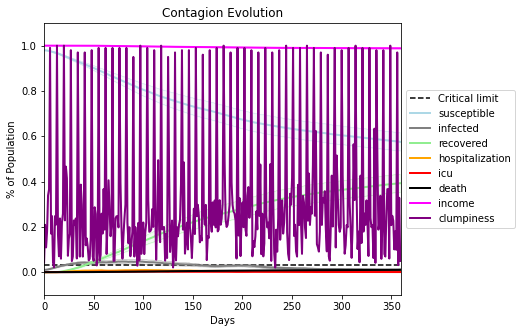

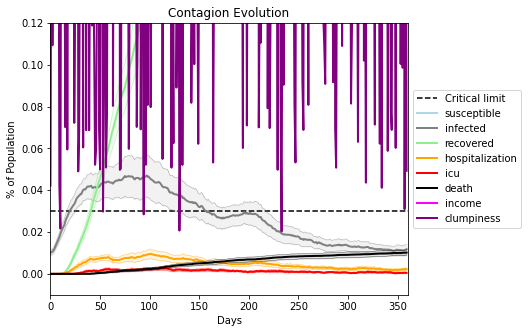

In [9]:
import logging
def setLevel(level):
    logger1 = logging.getLogger()
    logger1.setLevel(level)
params.params['temperature'] = -0.9
params.params['num_communities'] = 12
seeds = [9675]
setLevel(logging.CRITICAL)
multiple_runs(params,population_size,simulation_cycles,num_runs = 30,fname = "duong10000-1", 
              do_print = True, 
              home_grid_height = 5, home_grid_width = 5, school_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0)],
               [(0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2)],
               [(1,4),(2,4),(3,4),(4,4)],
               [(3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],work_home_list = 
              [[(0,0),(0,1),(1,1),(2,1),(2,0),(1,0),
               (0,2),(0,3),(0,4),(1,3),(2,3),(2,2),(1,2),
               (1,4),(2,4),(3,4),(4,4),
               (3,3),(4,3),(4,2),(3,2),(3,1),(4,1),(4,0),(3,0)]],
              listeners = listeners)